# Neurips, s4d9, CLR normalized proteins

- CLR normalized data
- Used T cell markers recieved from Mustjoki group (collected from this paper);

Reference 1: 
Zhang, L., Yu, X., Zheng, L., Zhang, Y., Li, Y., Fang, Q., Gao, R., Kang, B., Zhang, Q., Huang, J. Y., Konno, H., Guo, X., Ye, Y., Gao, S., Wang, S., Hu, X., Ren, X., Shen, Z., Ouyang, W., & Zhang, Z. (2018). Lineage tracking reveals dynamic relationships of T cells in colorectal cancer. Nature, 564(7735), 268–272. https://doi.org/10.1038/s41586-018-0694-x

CD8+ markers:
- CD8+ Naive (cd8_tn)= CCR7 (CD197), SELL(CD62L), CD27, CD28, S1PR1(CD363)
- CD8+ Central memory (cd8_cm)= CCR7(CD197), SELL(CD62L), IL7R(CD127), CD27, CD28,S1PR1 (CD363)
- CD8+ Effector memory (cd8_em)= CXCR4(CD184), CXCR3(CD183), "CD44
- CD8+ Effector memory recently activated (cd8_emra)= FCGR3A(CD16), "S1PR1(CD363)
- CD8+ tissue-resident memory (cd8_rm)= CD6, CD69, ITGAE(CD103)
- CD8+ Intraepithelial lymphocytes (cd8_IEL)= CD160, KIR2DL4(CD158D), TMIGD2(CD28H), KLRC2(CD159c), ENTPD1(CD39), "CD69", ITGAE(CD103)
- CD8+ Dysfunctional/exhausted  (cd8_tex)= HAVCR2(CD366), PDCD1(CD279), TNFRSF9(CD137), ITGAE(CD103)
- CD8+ Mucosal-associated invariant (cd8_mait)= KLRB1(CD161),NCR3(CD337)

CD4+ markers:
- CD4+ Naive (cd4_tn)= CCR7 (CD197), SELL(CD62L), CD27, CD28, S1PR1(CD363)]
- CD4+ Central memory (cd4_tcm_n)= CCR7(CD197), SELL(CD62L), ICAM2(CD102), S1PR1(CD363), CD69
- CD4+ Effector memory recently activated (cd4_emra)= S1PR1(CD363)
- CD4+ Tissue-resident memory (cd4_trm)= CD69, KLRB1(CD161), IL7R(CD127), CXCR6(CD186)
- CD4+ Follicular helper (cd4_tfh)= CXCR5(CD185), IL6ST(CD130), BTLA(CD272), PDCD1(CD279), CD200
- CD4+ Helper type 1 (cd4_th1)= CD44
- CD4+ Helper type 17 (cd4_th17)= CCR6(CD196), KLRB1(CD161), ITGAE(CD103)
- CD4+ Helper type 1 like (cd4_th1_like)= PDCD1(CD279), HAVCR2(CD366), ITGAE(CD103)
- CD4+ Blood regulatory (cd4_treg_blood)= IL2RA(CD25), IL10RA(CD210/CD210a), CDC25B
- CD4+ Follicular regulatory (cd4_tfr)= IL2RA(CD25), CXCR5(CD185), PDCD1(CD279), CCR4(CD194), "CD69
- CD4+ Tumor-infiltrating regulatory (cd4_treg_tum)= TNFRSF18(CD357), TNFRSF9(CD137), CTLA4(CD152), IL21R(CD360)

Reference 2: 

Mousset, C. M., Hobo, W., Woestenenk, R., Preijers, F., Dolstra, H., & van der Waart, A. B. (2019). Comprehensive Phenotyping of T Cells Using Flow Cytometry. https://doi.org/10.1002/cyto.a.23724 (table)

- Early T cell development: CD2, CD5, CD7, CD3 (migrate from BM to thymus)
- CD4, CD8
- CD11a, CD27, CD28, CD38, CD45RA, CD45RO, CD57, CD58, CD62L, CD69, CD95, CD122, CD127, CD130, CD134, CD183, CD184, CD195, CD197, CD218a, CD244, CD278, HLA-DR


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot
from matplotlib.pyplot import rc_context

import warnings

warnings.filterwarnings('ignore')

In [28]:
#Zhang et al. 
#CD8+ markers:
cd8_tn=["CD197", "CD62L", "CD27", "CD28", "CD363"]
cd8_cm=["CD197", "CD62L", "CD127", "CD27", "CD28","CD363"]
cd8_em=["CD184", "CD183", "CD44"]
cd8_emra=["CD16", "CD363"]
cd8_rm=["CD6","CD69", "CD103"]
cd8_IEL=["CD160", "CD158D", "CD28H", "CD159c","CD39", "CD69", "CD103"]
cd8_tex=["CD366", "CD279", "CD137", "CD103"]
cd8_mait=["CD161","CD337"]

#CD4+ markers:
cd4_tn= ["CD197", "CD62L","CD27", "CD28", "CD363"]
cd4_tcm_n=["CD197", "CD62L", "CD102", "CD363", "CD69"]
cd4_emra=["CD363"]
cd4_trm=["CD69", "CD161", "CD127", "CD186"]
cd4_tfh=["CD185", "CD130", "CD272","CD279", "CD200"]
cd4_th1=["CD44"]
cd4_th17=["CD196", "CD161","CD103)"]
cd4_th1_like=["CD279", "CD366","CD103"]
cd4_treg_blood=["CD25", "CD210/CD210a", "CDC25B"]
cd4_tfr=["CD25", "CD185", "CD279","CD194", "CD69"]
cd4_treg_tum=["CD357","CD137","CD152","CD360"]

#Guo et al. 

naive_markers = ["CD62L", "CD197"]
cytotoxic_markers= ["CD56"]
inhibitory_markers= ["CD223", "CD279", "CD366", "CD152"]
costimulatory_markers=[ "CD28", "CD270"]
treg_markers= ["CD25", "CD223"]
memory_markers= ["CD27","CD25"]


#Mousset et al. 

early_t= ['CD2', 'CD5', 'CD7', 'CD3']
tcell = ['CD4', 'CD8']
subpopulations = ['CD11a', 'CD27', 'CD28', 'CD38', 'CD45RA', 'CD45RO', 'CD57', 'CD58', 'CD62L', 'CD69', 
'CD95', 'CD122', 'CD127', 'CD130', 'CD134', 'CD183', 'CD184', 'CD195', 'CD197', 'CD218a', 'CD244', 'CD278', 
'HLA-DR']

markers_all=[cd8_tn, cd8_cm, cd8_em,cd8_emra,cd8_rm, cd8_IEL, cd8_tex, cd8_mait, cd4_tn,
            cd4_tcm_n,cd4_emra, cd4_trm, cd4_tfh,cd4_th1, cd4_th17, cd4_th1_like,cd4_treg_blood, 
            cd4_tfr, cd4_treg_tum, naive_markers, cytotoxic_markers, inhibitory_markers, 
             costimulatory_markers,treg_markers,memory_markers,  early_t, tcell, subpopulations]

In [29]:
markers_all = list(np.concatenate(markers_all).flat)

In [30]:
markers_all

['CD197',
 'CD62L',
 'CD27',
 'CD28',
 'CD363',
 'CD197',
 'CD62L',
 'CD127',
 'CD27',
 'CD28',
 'CD363',
 'CD184',
 'CD183',
 'CD44',
 'CD16',
 'CD363',
 'CD6',
 'CD69',
 'CD103',
 'CD160',
 'CD158D',
 'CD28H',
 'CD159c',
 'CD39',
 'CD69',
 'CD103',
 'CD366',
 'CD279',
 'CD137',
 'CD103',
 'CD161',
 'CD337',
 'CD197',
 'CD62L',
 'CD27',
 'CD28',
 'CD363',
 'CD197',
 'CD62L',
 'CD102',
 'CD363',
 'CD69',
 'CD363',
 'CD69',
 'CD161',
 'CD127',
 'CD186',
 'CD185',
 'CD130',
 'CD272',
 'CD279',
 'CD200',
 'CD44',
 'CD196',
 'CD161',
 'CD103)',
 'CD279',
 'CD366',
 'CD103',
 'CD25',
 'CD210/CD210a',
 'CDC25B',
 'CD25',
 'CD185',
 'CD279',
 'CD194',
 'CD69',
 'CD357',
 'CD137',
 'CD152',
 'CD360',
 'CD62L',
 'CD197',
 'CD56',
 'CD223',
 'CD279',
 'CD366',
 'CD152',
 'CD28',
 'CD270',
 'CD25',
 'CD223',
 'CD27',
 'CD25',
 'CD2',
 'CD5',
 'CD7',
 'CD3',
 'CD4',
 'CD8',
 'CD11a',
 'CD27',
 'CD28',
 'CD38',
 'CD45RA',
 'CD45RO',
 'CD57',
 'CD58',
 'CD62L',
 'CD69',
 'CD95',
 'CD122',
 'CD127',


In [31]:
#all neurips data

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_neurips_norm.h5ad')


In [32]:
adata_neurips = adata

In [33]:
#samples
adata_neurips.obs['POOL'].unique().tolist()

['s4d1',
 's3d6',
 's1d2',
 's2d1',
 's3d7',
 's2d4',
 's1d1',
 's4d9',
 's4d8',
 's2d5',
 's3d1',
 's1d3']

In [34]:
#Cell type annotations
adata_neurips.obs['cell_type'].unique().tolist()

['NK',
 'CD8+ T CD69+ CD45RA+',
 'NK CD158e1+',
 'HSC',
 'CD14+ Mono',
 'B1 B IGKC+',
 'CD4+ T activated',
 'CD8+ T CD69+ CD45RO+',
 'G/M prog',
 'Naive CD20+ B IGKC-',
 'CD8+ T CD49f+',
 'Naive CD20+ B IGKC+',
 'CD4+ T naive',
 'CD8+ T naive',
 'CD4+ T activated integrinB7+',
 'cDC2',
 'gdT TCRVD2+',
 'CD8+ T TIGIT+ CD45RO+',
 'CD16+ Mono',
 'Erythroblast',
 'MAIT',
 'T reg',
 'gdT CD158b+',
 'Transitional B',
 'Proerythroblast',
 'CD8+ T CD57+ CD45RO+',
 'Plasmablast IGKC+',
 'ILC1',
 'Lymph prog',
 'ILC',
 'MK/E prog',
 'Normoblast',
 'CD8+ T CD57+ CD45RA+',
 'pDC',
 'B1 B IGKC-',
 'Plasma cell IGKC-',
 'Plasmablast IGKC-',
 'Plasma cell IGKC+',
 'CD8+ T TIGIT+ CD45RA+',
 'CD8+ T naive CD127+ CD26- CD101-',
 'CD4+ T CD314+ CD45RA+',
 'cDC1',
 'T prog cycling',
 'dnT']

In [35]:
#select sample from Neurips dataset

adata_sample=adata_neurips[adata_neurips.obs['POOL'] == 's4d9']

In [36]:
adata_sample.copy()

AnnData object with n_obs × n_vars = 6565 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    obsp: 'connectivities', 'distances'

In [37]:
#Select only T-cells (based on new_cell_type annotations)

adata_t=adata_sample[adata_sample.obs['new_cell_type'] == 'T' ]

In [38]:
adata_t.copy()

AnnData object with n_obs × n_vars = 3064 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    obsp: 'connectivities', 'distances'

In [39]:
#Different types of T cells annotated by Neurips (all included in new_cell_type "NK" annotations)

adata_t.obs['cell_type']

CCTCTAGTCTCGTCAC-1-s4d9         gdT CD158b+
TTAGTCTAGGTCCCTG-1-s4d9    CD4+ T activated
GGGACTCGTTGGCCGT-1-s4d9         gdT CD158b+
TACGGGCTCAGTCACA-1-s4d9    CD4+ T activated
AAGCGTTGTCACTTAG-1-s4d9       CD8+ T CD49f+
                                 ...       
ATTCCTAGTCCAAGAG-1-s4d9         gdT CD158b+
GCTGGGTGTACGGATG-1-s4d9        CD8+ T naive
TCGAAGTGTGACAGGT-1-s4d9               T reg
GCAGGCTGTTGCATAC-1-s4d9        CD4+ T naive
ACGTAACAGGTCTACT-1-s4d9        CD8+ T naive
Name: cell_type, Length: 3064, dtype: category
Categories (15, object): ['CD4+ T activated', 'CD4+ T activated integrinB7+', 'CD4+ T naive', 'CD8+ T CD49f+', ..., 'ILC1', 'MAIT', 'T reg', 'gdT CD158b+']

In [40]:
#surface protein expression of all cell types

prot=adata_sample.obsm['protein_expression_clr_neurips']

In [41]:
prot.shape

(6565, 141)

In [42]:
#surface protein expression of NK-cells
t_prot=adata_t.obsm['protein_expression_clr_neurips']

In [43]:
#NK cells in the sample
t_prot.shape

(3064, 141)

In [44]:
prot_col= t_prot.columns.unique().tolist()

In [45]:
prot_col

['CD86',
 'CD274',
 'CD270',
 'CD155',
 'CD112',
 'CD47',
 'CD48',
 'CD40',
 'CD154',
 'CD52',
 'CD3',
 'CD8',
 'CD56',
 'CD19',
 'CD33',
 'CD11c',
 'HLA-A-B-C',
 'CD45RA',
 'CD123',
 'CD7',
 'CD105',
 'CD49f',
 'CD194',
 'CD4',
 'CD44',
 'CD14',
 'CD16',
 'CD25',
 'CD45RO',
 'CD279',
 'TIGIT',
 'CD20',
 'CD335',
 'CD31',
 'Podoplanin',
 'CD146',
 'IgM',
 'CD5',
 'CD195',
 'CD32',
 'CD196',
 'CD185',
 'CD103',
 'CD69',
 'CD62L',
 'CD161',
 'CD152',
 'CD223',
 'KLRG1',
 'CD27',
 'CD107a',
 'CD95',
 'CD134',
 'HLA-DR',
 'CD1c',
 'CD11b',
 'CD64',
 'CD141',
 'CD1d',
 'CD314',
 'CD35',
 'CD57',
 'CD272',
 'CD278',
 'CD58',
 'CD39',
 'CX3CR1',
 'CD24',
 'CD21',
 'CD11a',
 'CD79b',
 'CD244',
 'CD169',
 'integrinB7',
 'CD268',
 'CD42b',
 'CD54',
 'CD62P',
 'CD119',
 'TCR',
 'CD192',
 'CD122',
 'FceRIa',
 'CD41',
 'CD137',
 'CD163',
 'CD83',
 'CD124',
 'CD13',
 'CD2',
 'CD226',
 'CD29',
 'CD303',
 'CD49b',
 'CD81',
 'IgD',
 'CD18',
 'CD28',
 'CD38',
 'CD127',
 'CD45',
 'CD22',
 'CD71',
 'CD26'

In [46]:
#Check which markers are used in Neurips

listOfmarkers=prot_col

markers=[]

for x in listOfmarkers:
    if x in markers_all:
        markers.append(x)

print(markers)

['CD270', 'CD3', 'CD8', 'CD56', 'CD45RA', 'CD7', 'CD194', 'CD4', 'CD44', 'CD16', 'CD25', 'CD45RO', 'CD279', 'CD5', 'CD195', 'CD196', 'CD185', 'CD103', 'CD69', 'CD62L', 'CD161', 'CD152', 'CD223', 'CD27', 'CD95', 'CD134', 'HLA-DR', 'CD57', 'CD272', 'CD278', 'CD58', 'CD39', 'CD11a', 'CD244', 'CD122', 'CD137', 'CD2', 'CD28', 'CD38', 'CD127', 'CD197']


In [15]:
#sorting by mean, all cell types

index_sort = prot.mean().sort_values().index
df_sorted_all = prot[index_sort]

In [16]:
#sorting by mean, NK cells

index_sort = nk_prot.mean().sort_values().index
df_sorted_nk = nk_prot[index_sort]

In total: 6565  cells in the sample


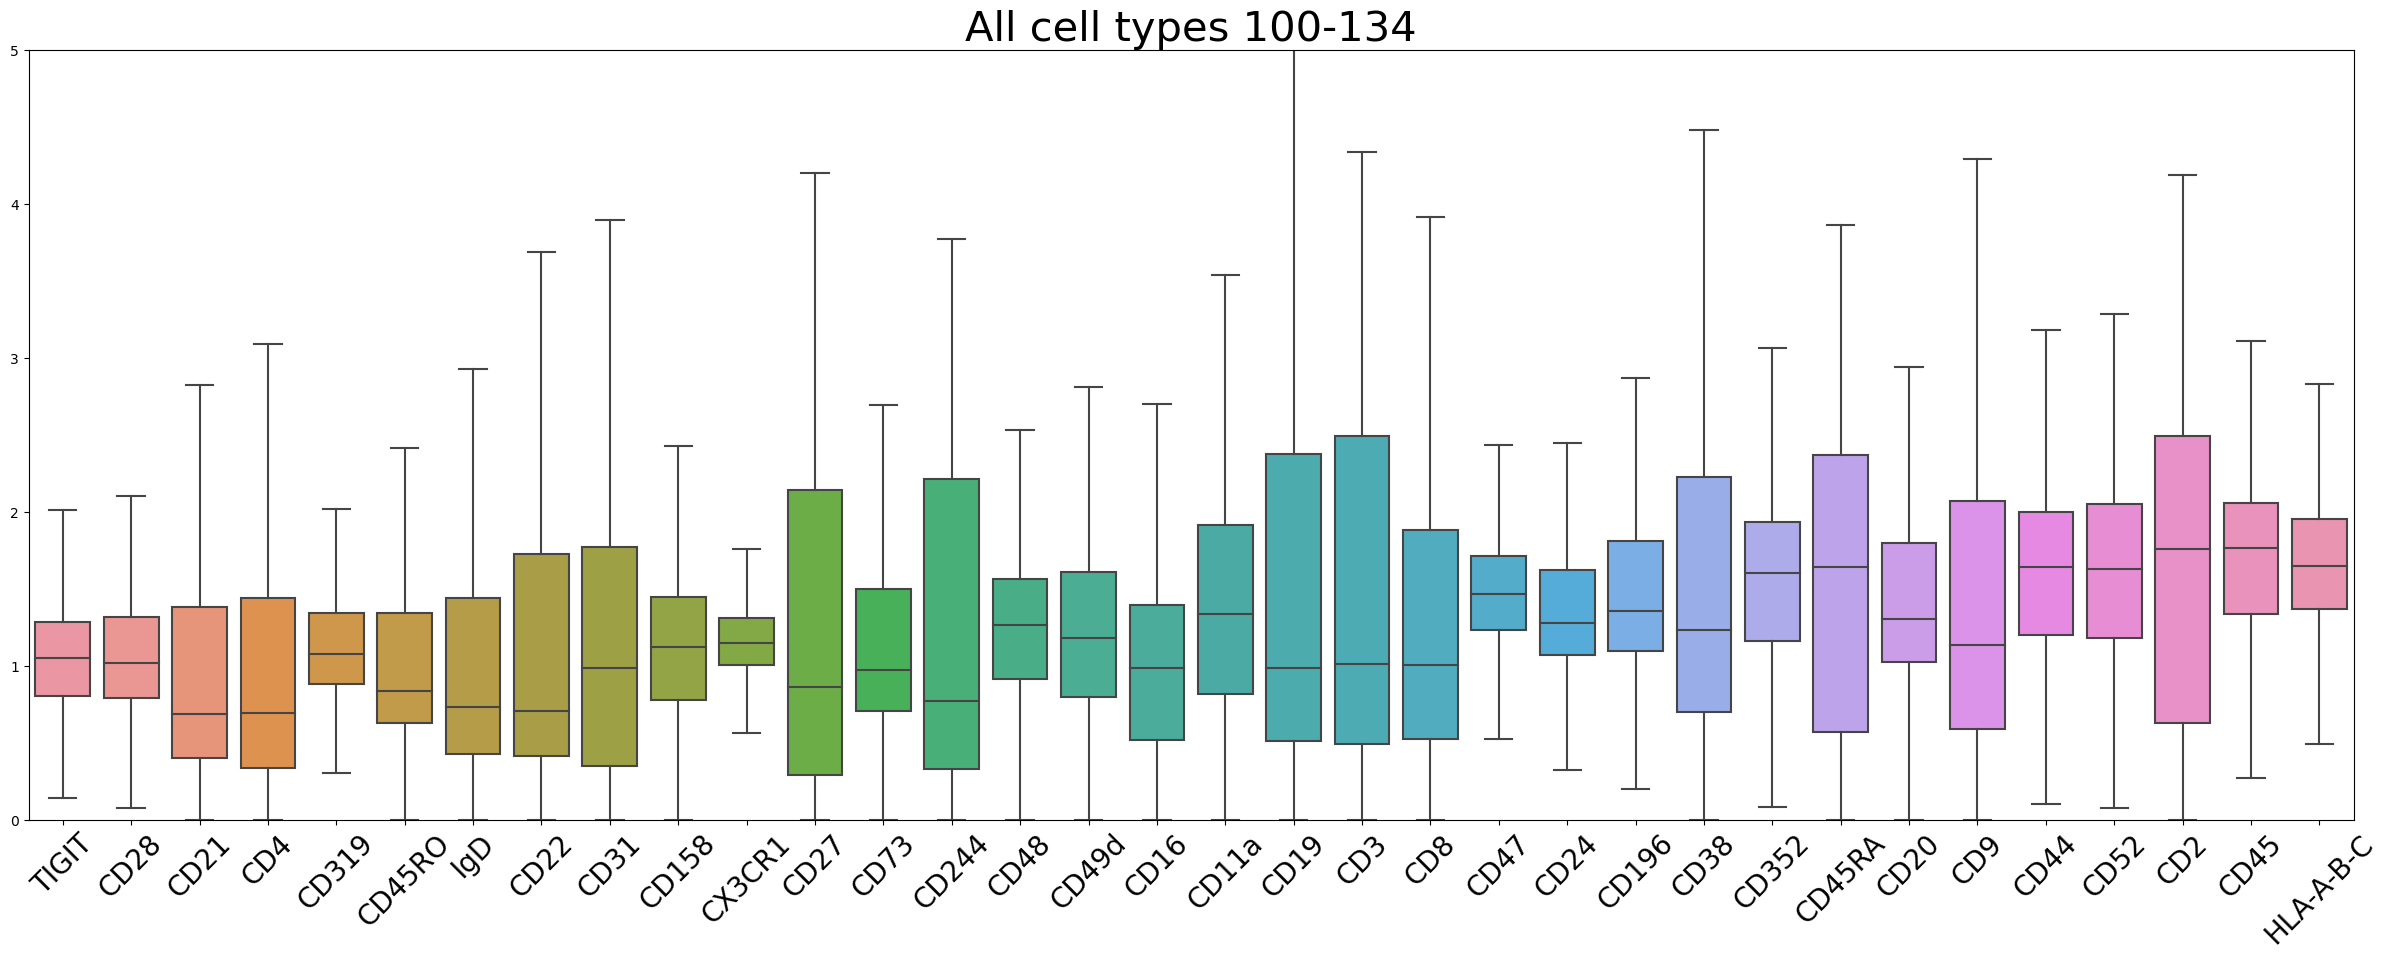

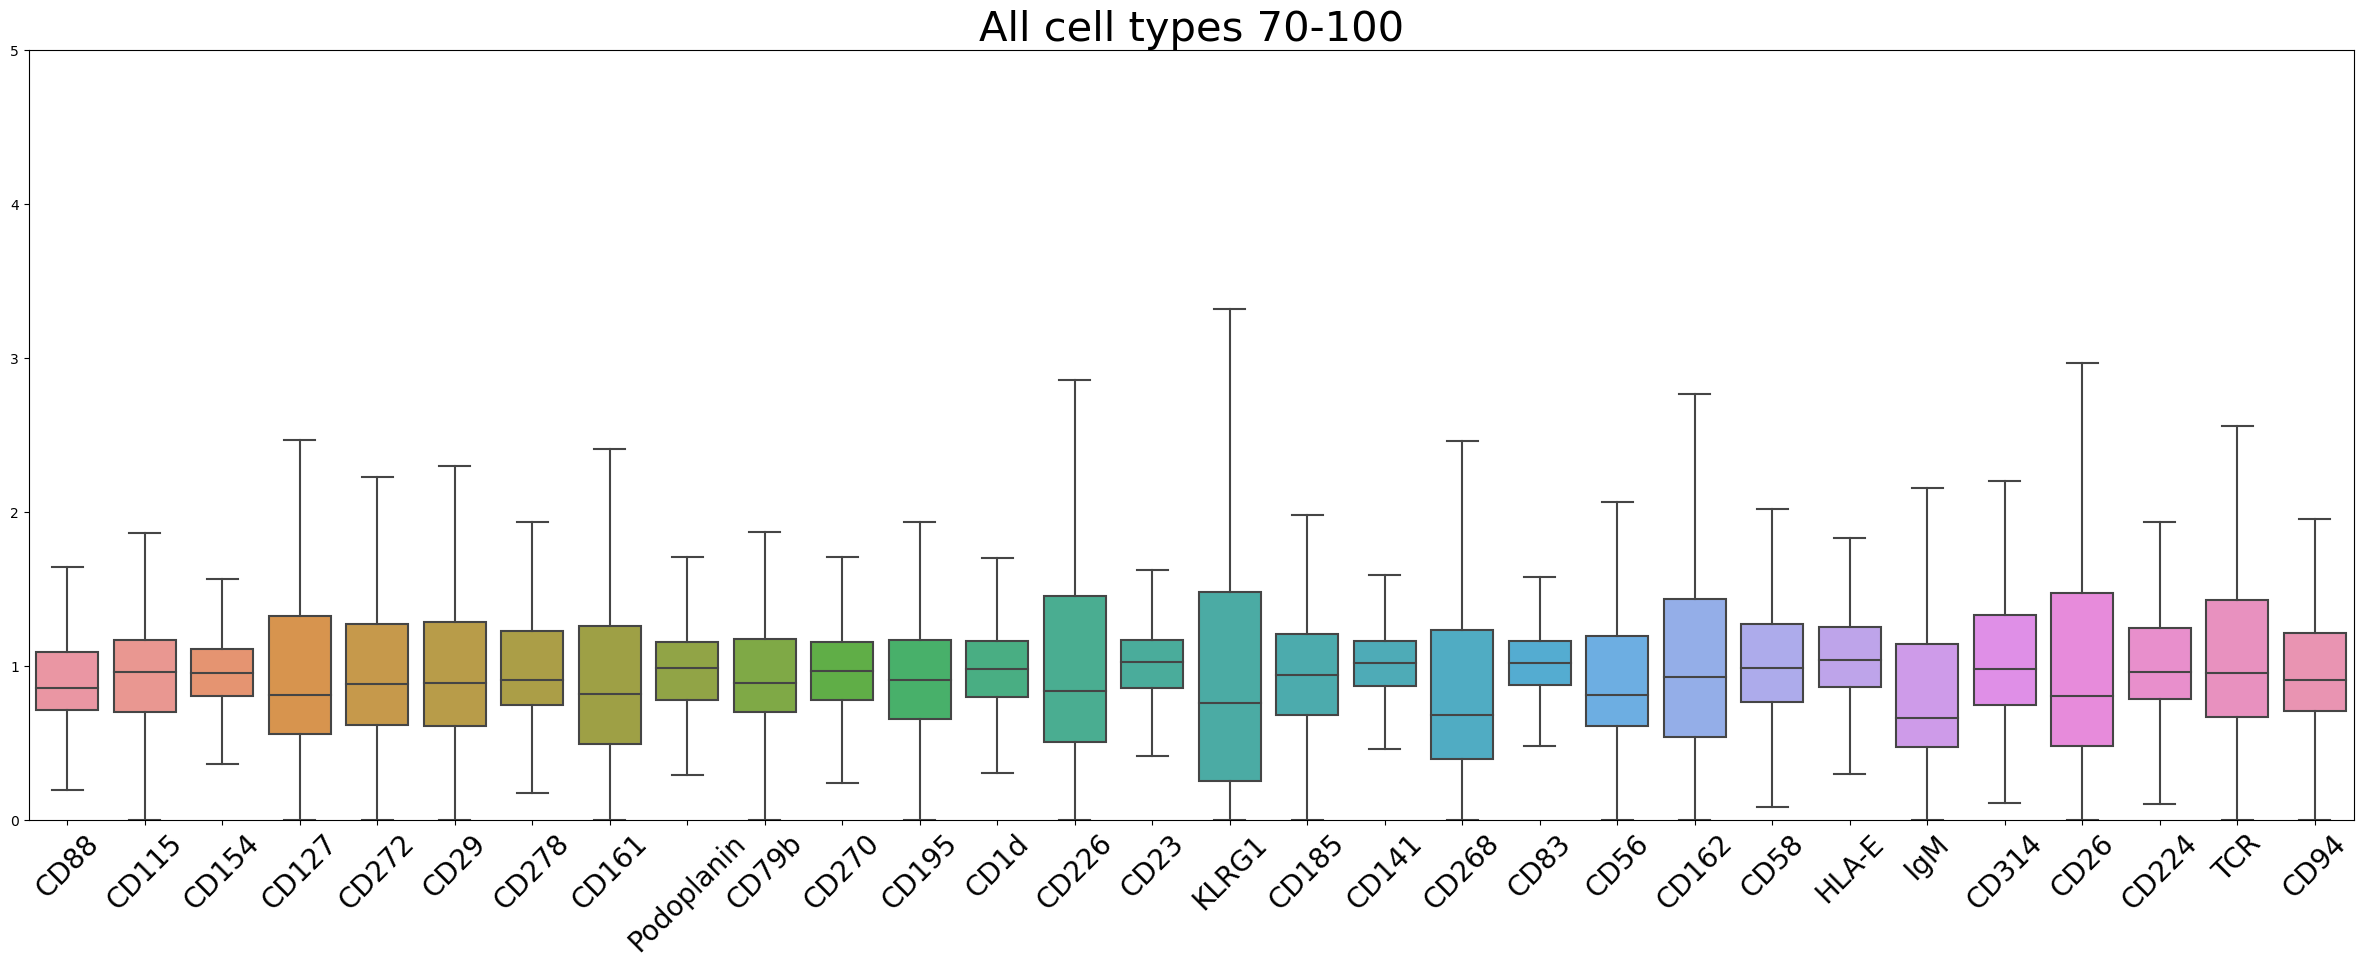

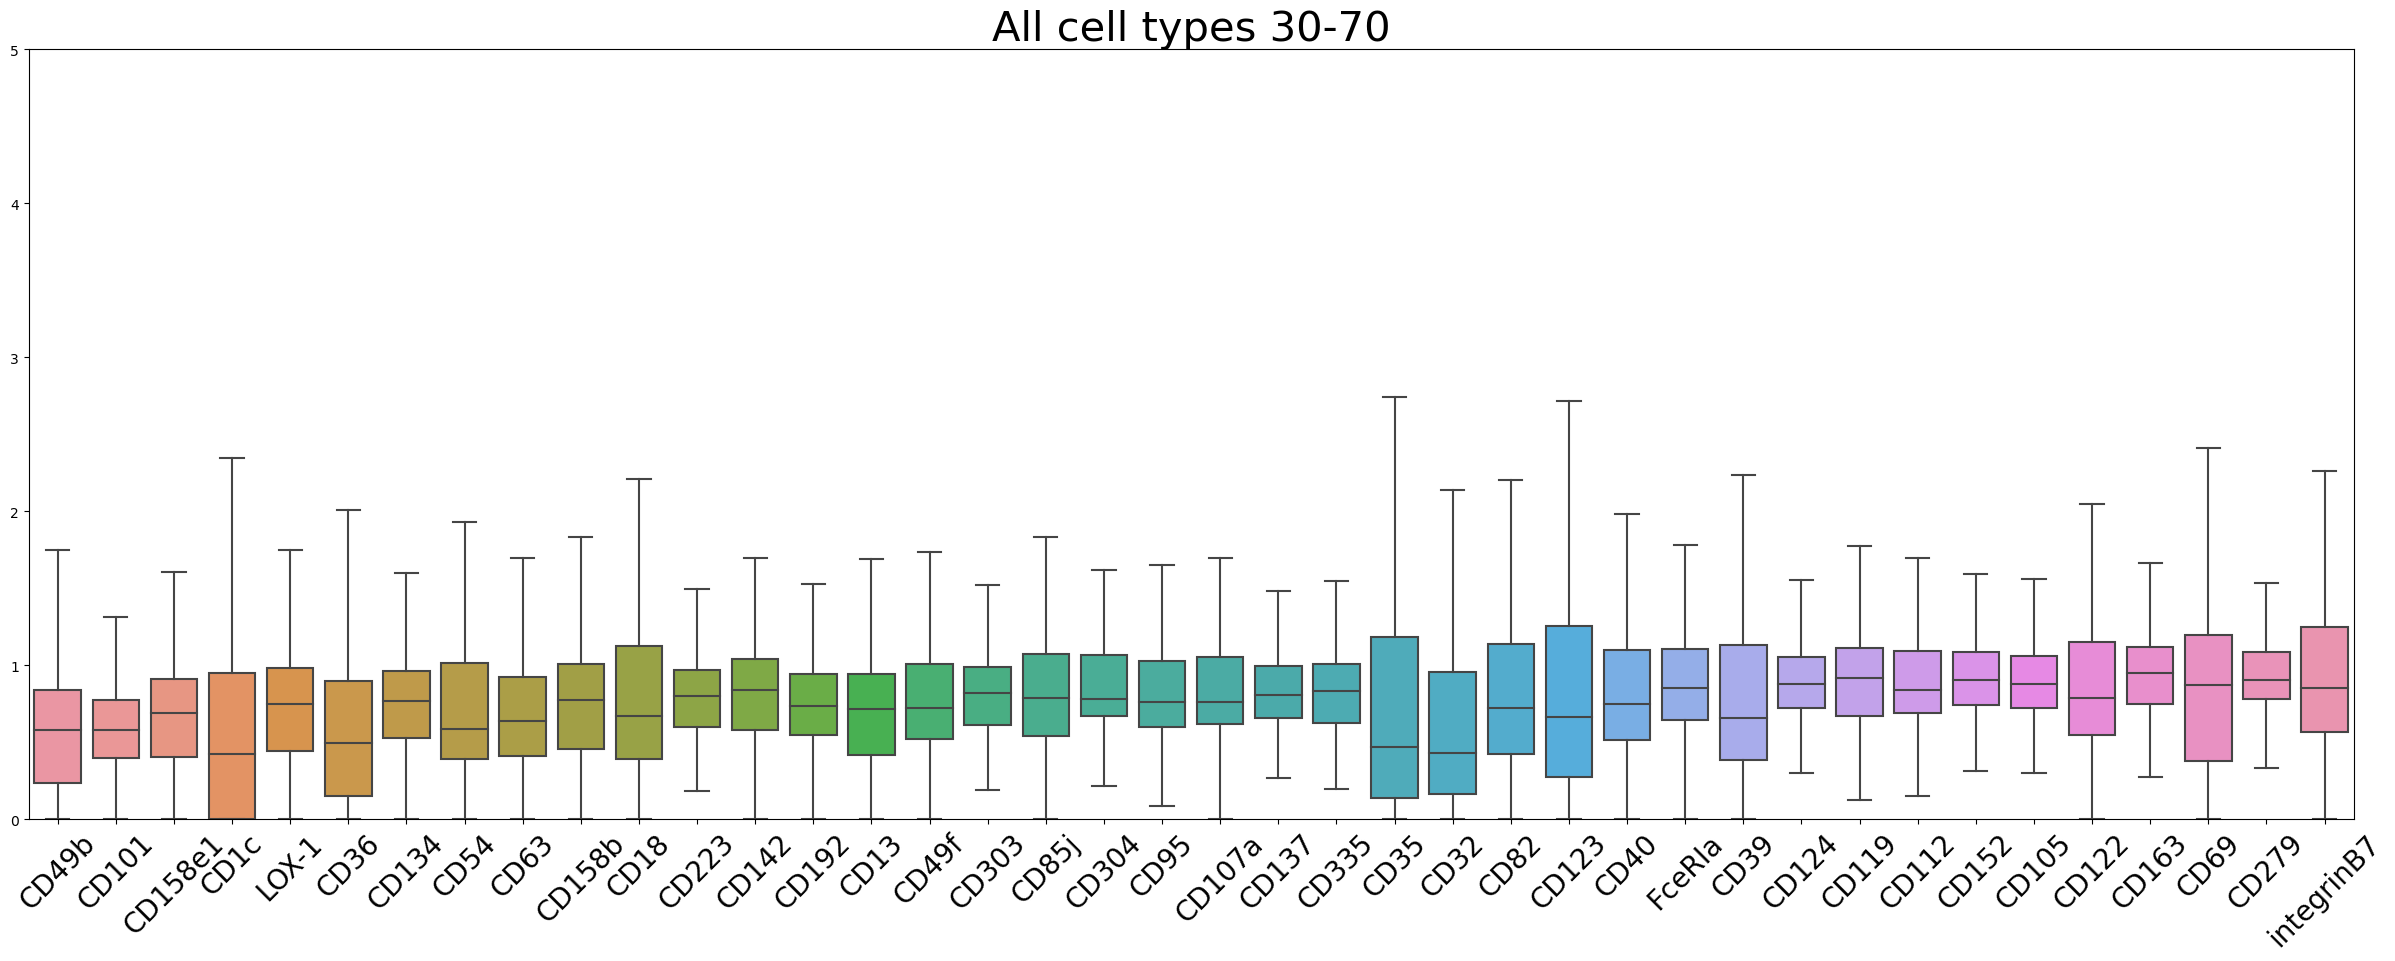

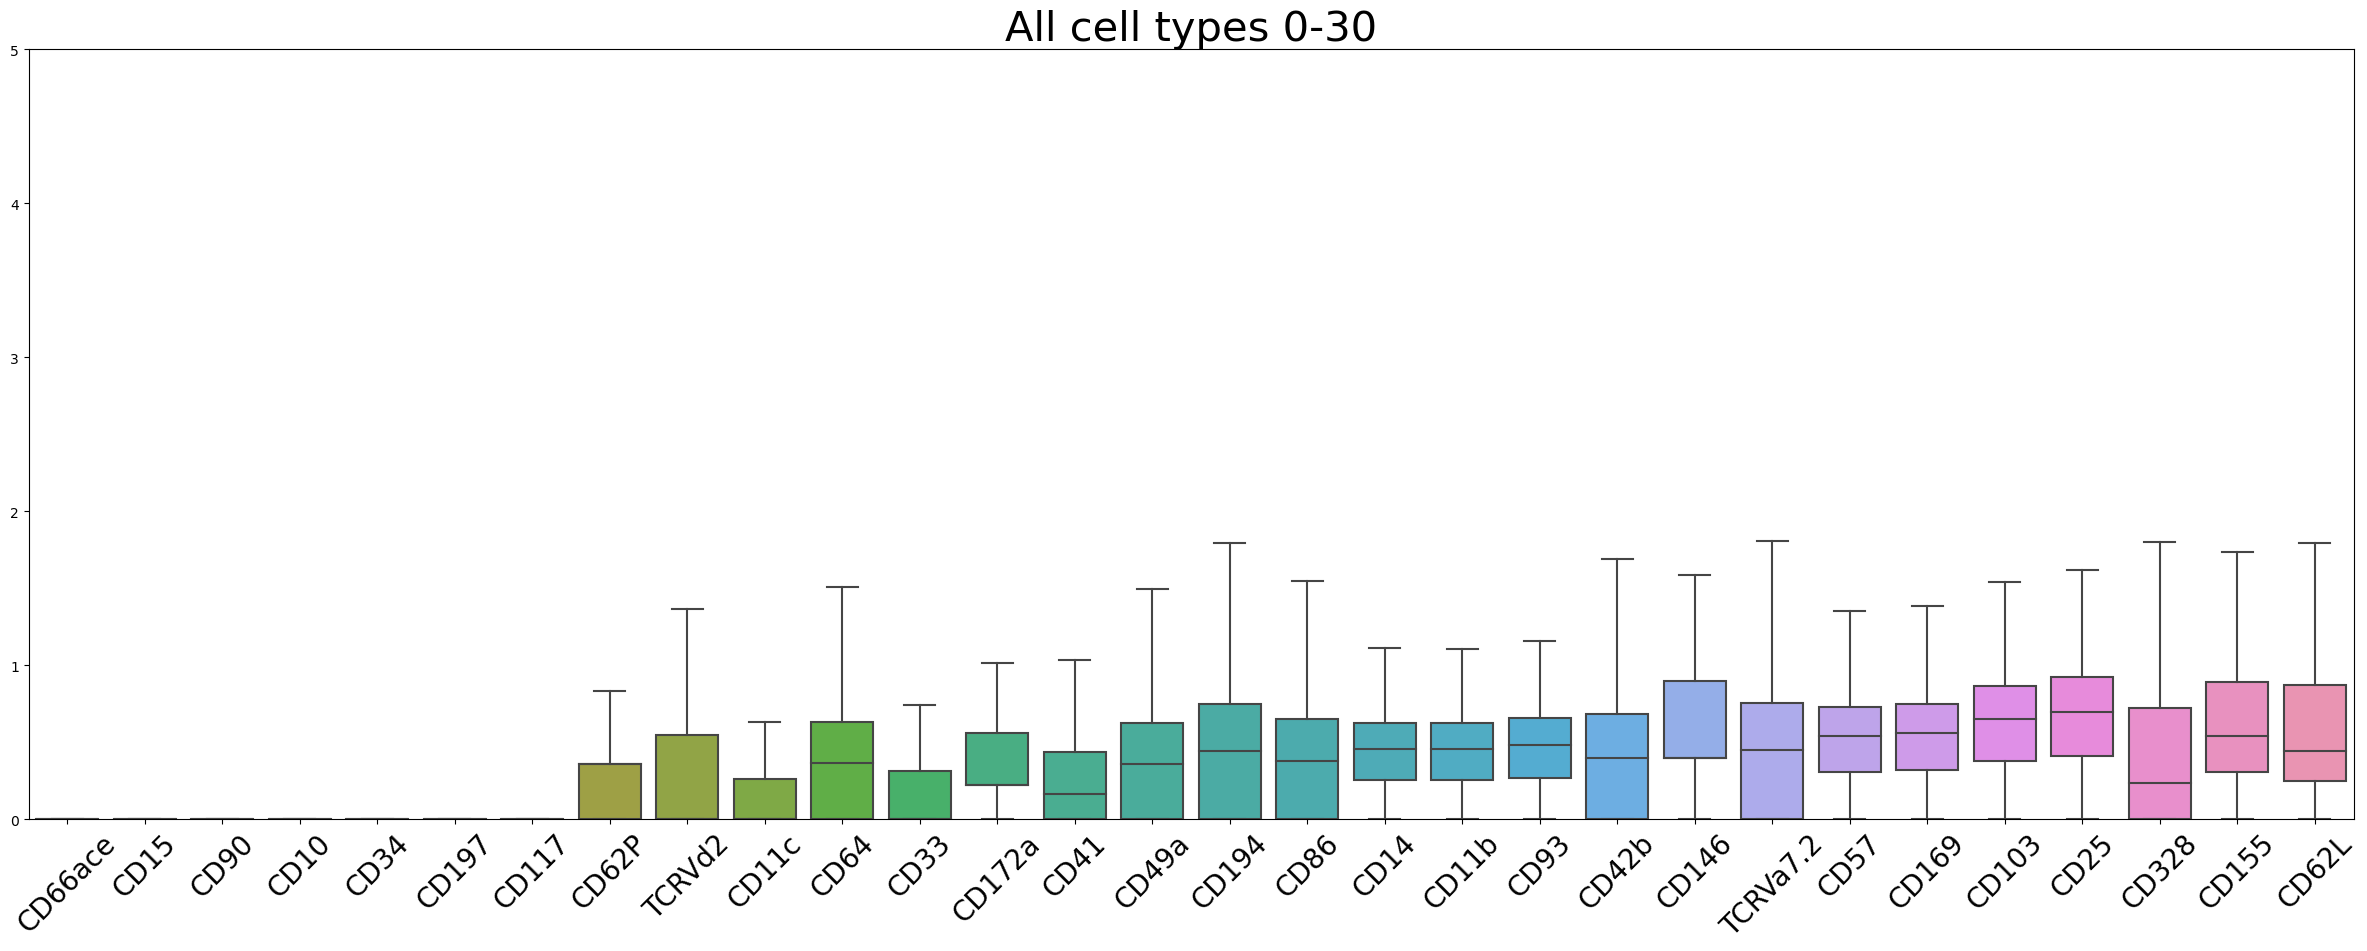

In [17]:
#All cell types

cells= len(prot)

print("In total:", cells, " cells in the sample" )

#From 100 to 134
plt.figure(figsize=(30,10))
plt.ylim(0, 5)
a=sns.boxplot(data=df_sorted_all.iloc[0:26775,100:134],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("All cell types 100-134", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

#From 70 to 100

plt.figure(figsize=(30,10))
plt.ylim(0, 5)
b=sns.boxplot(data=df_sorted_all.iloc[0:26775,70:100],  fliersize=0)

b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)
plt.title("All cell types 70-100", fontsize=30)

b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)

#From 30 to 70
plt.figure(figsize=(30,10))
plt.ylim(0, 5)
c=sns.boxplot(data=df_sorted_all.iloc[0:26775,30:70],  fliersize=0)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)
plt.title("All cell types 30-70", fontsize=30)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)

#From 0 to 30
plt.figure(figsize=(30,10))
plt.ylim(0, 5)
d=sns.boxplot(data=df_sorted_all.iloc[0:26775,0:30],  fliersize=0)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)
plt.title("All cell types 0-30", fontsize=30)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)



In total: 730 NK-cells in the sample


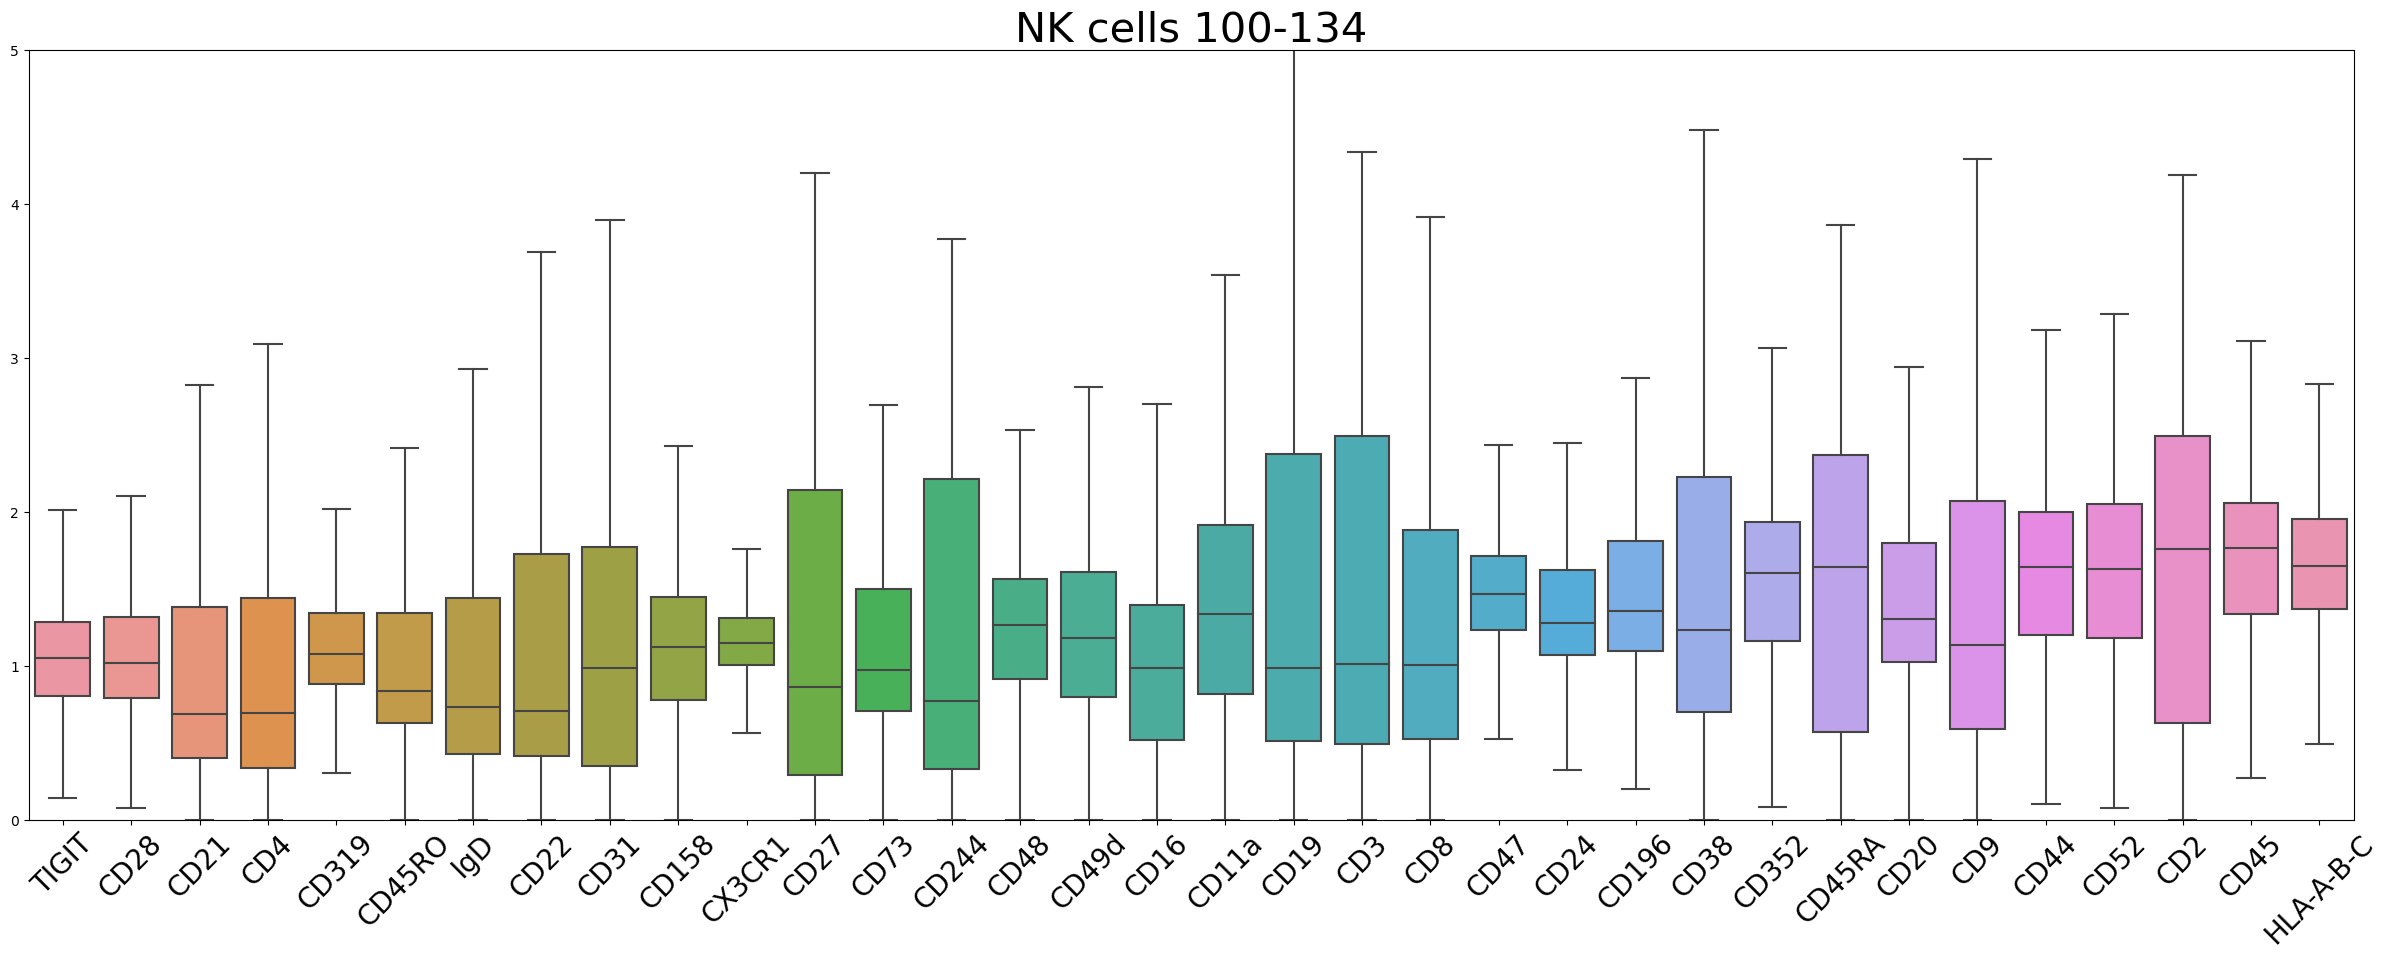

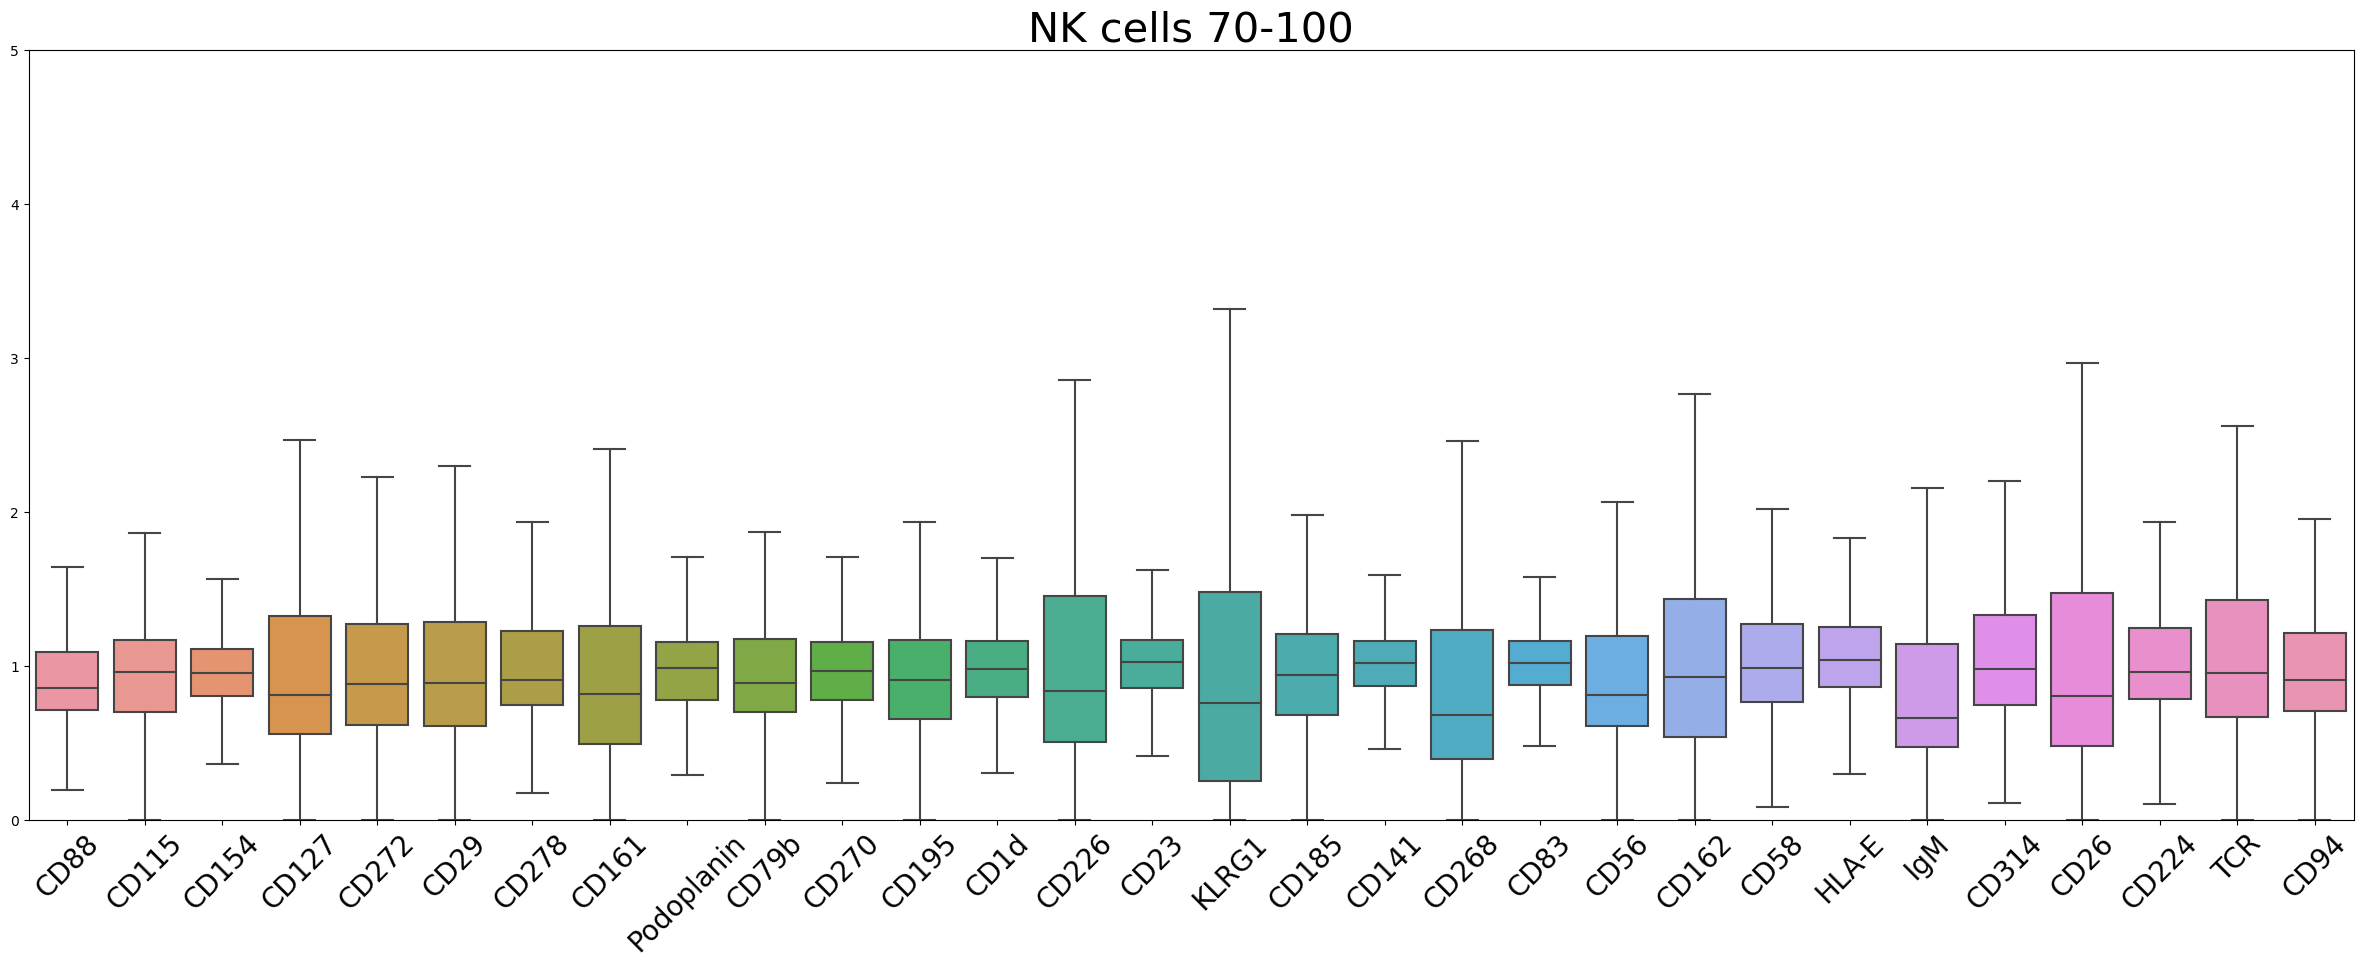

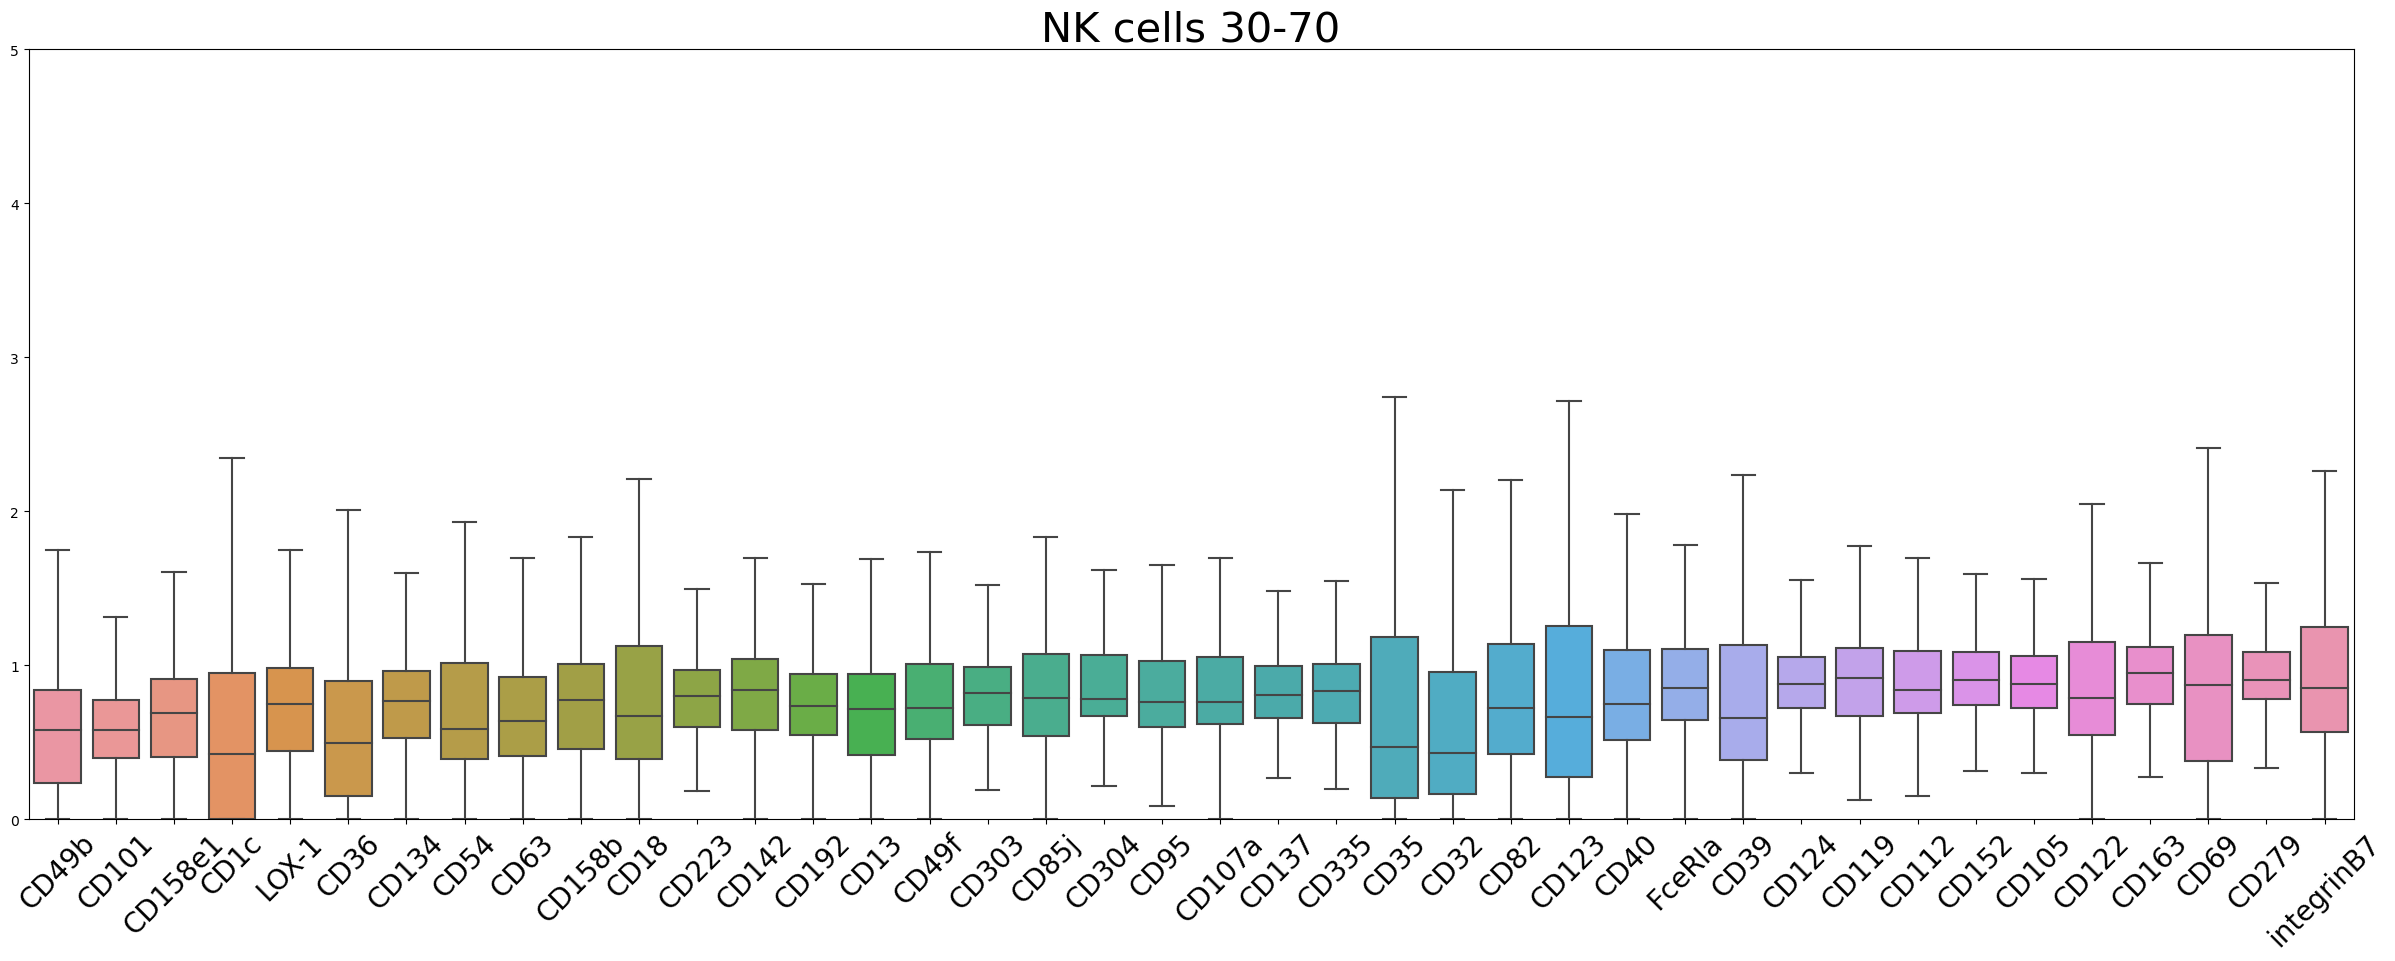

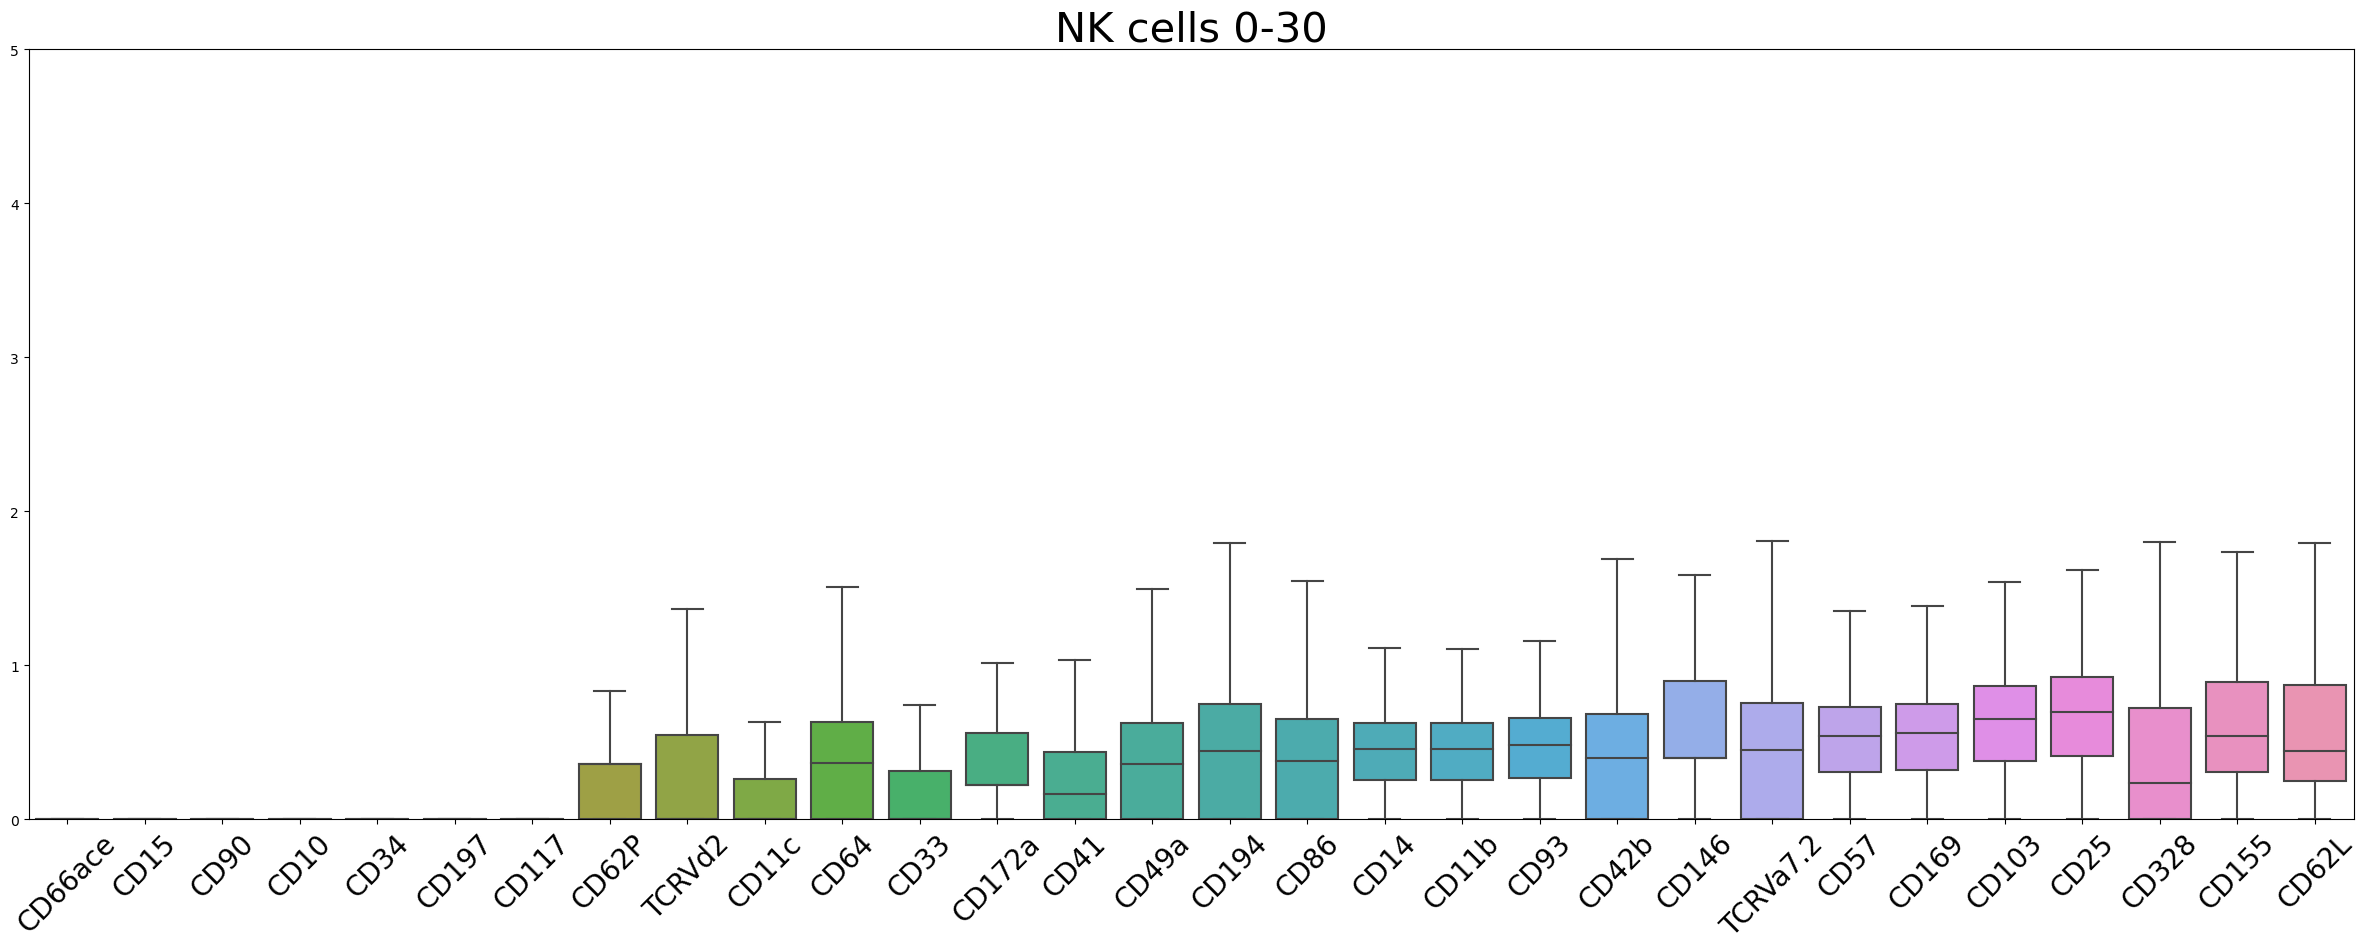

In [18]:
#NK cells

cells= len(nk_prot)

print("In total:", cells, "NK-cells in the sample" )

#From 100 to 134
plt.figure(figsize=(30,10))
plt.ylim(0, 5)
a=sns.boxplot(data=df_sorted_all.iloc[0:26775,100:134],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK cells 100-134", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

#From 70 to 100

plt.figure(figsize=(30,10))
plt.ylim(0, 5)
b=sns.boxplot(data=df_sorted_all.iloc[0:26775,70:100],  fliersize=0)

b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)
plt.title("NK cells 70-100", fontsize=30)

b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)

#From 30 to 70
plt.figure(figsize=(30,10))
plt.ylim(0, 5)
c=sns.boxplot(data=df_sorted_all.iloc[0:26775,30:70],  fliersize=0)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)
plt.title("NK cells 30-70", fontsize=30)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)

#From 0 to 30
plt.figure(figsize=(30,10))
plt.ylim(0, 5)
d=sns.boxplot(data=df_sorted_all.iloc[0:26775,0:30],  fliersize=0)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)
plt.title("NK cells 0-30", fontsize=30)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)


In total: 730 NK-cells in the sample


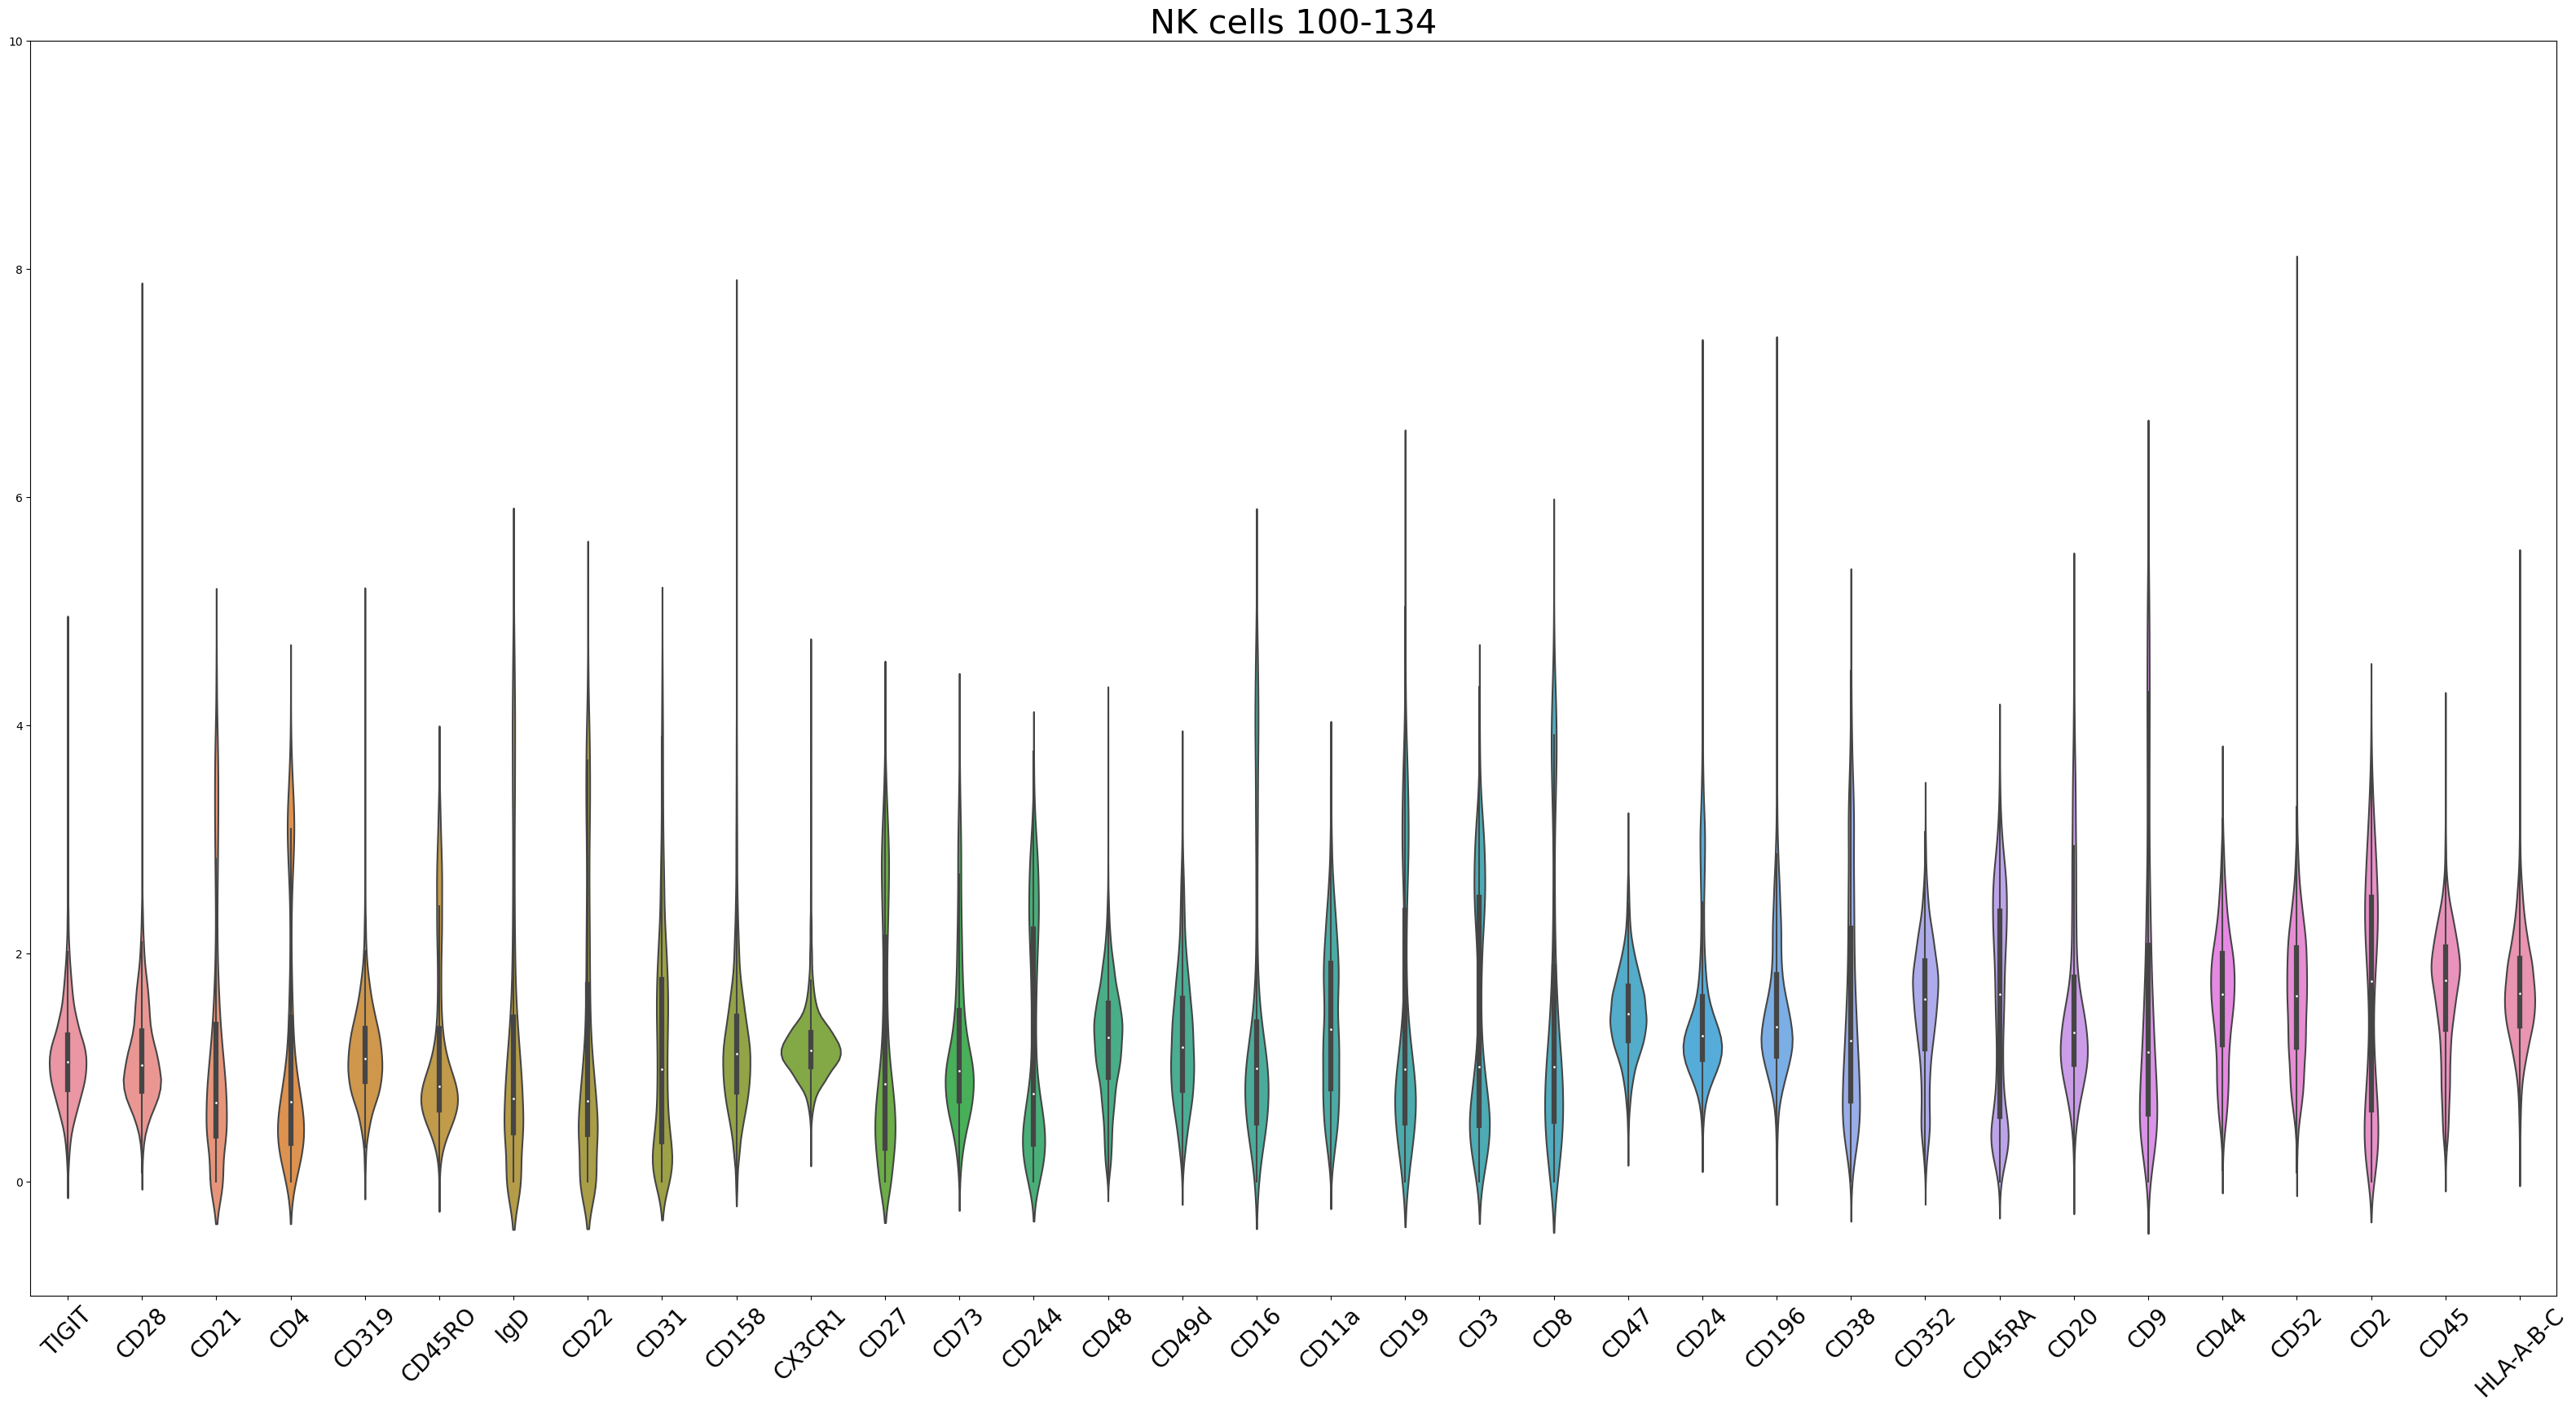

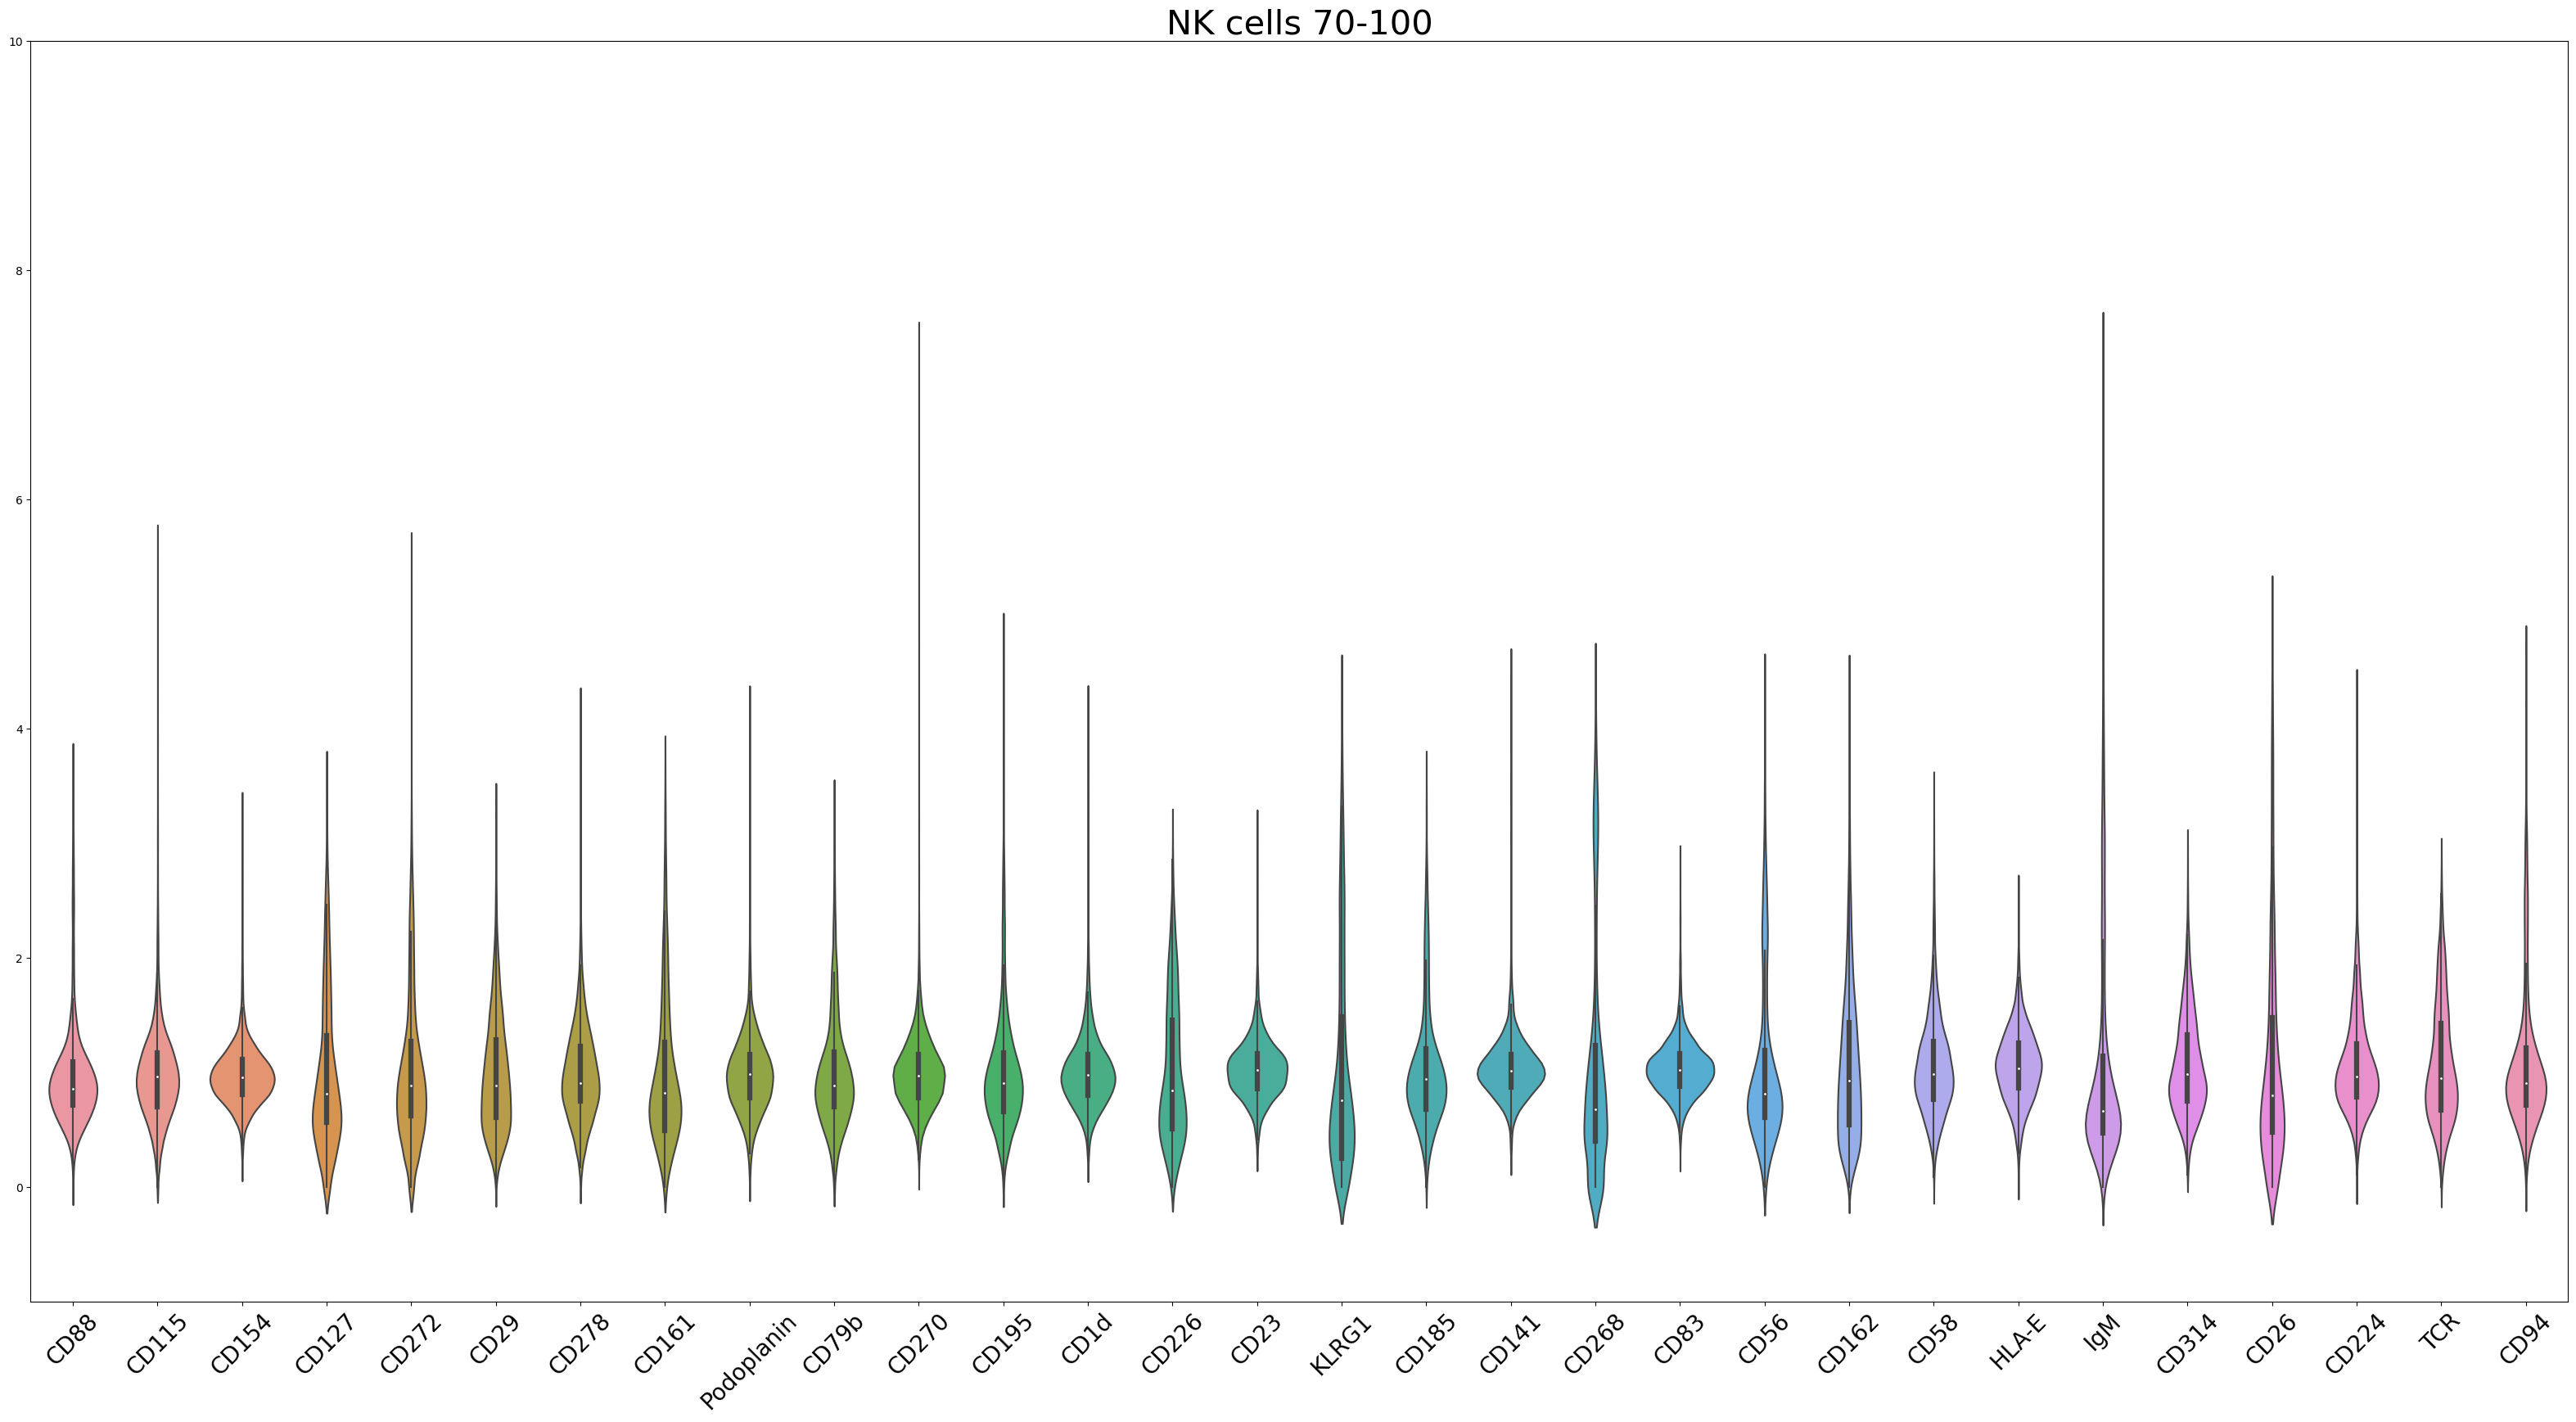

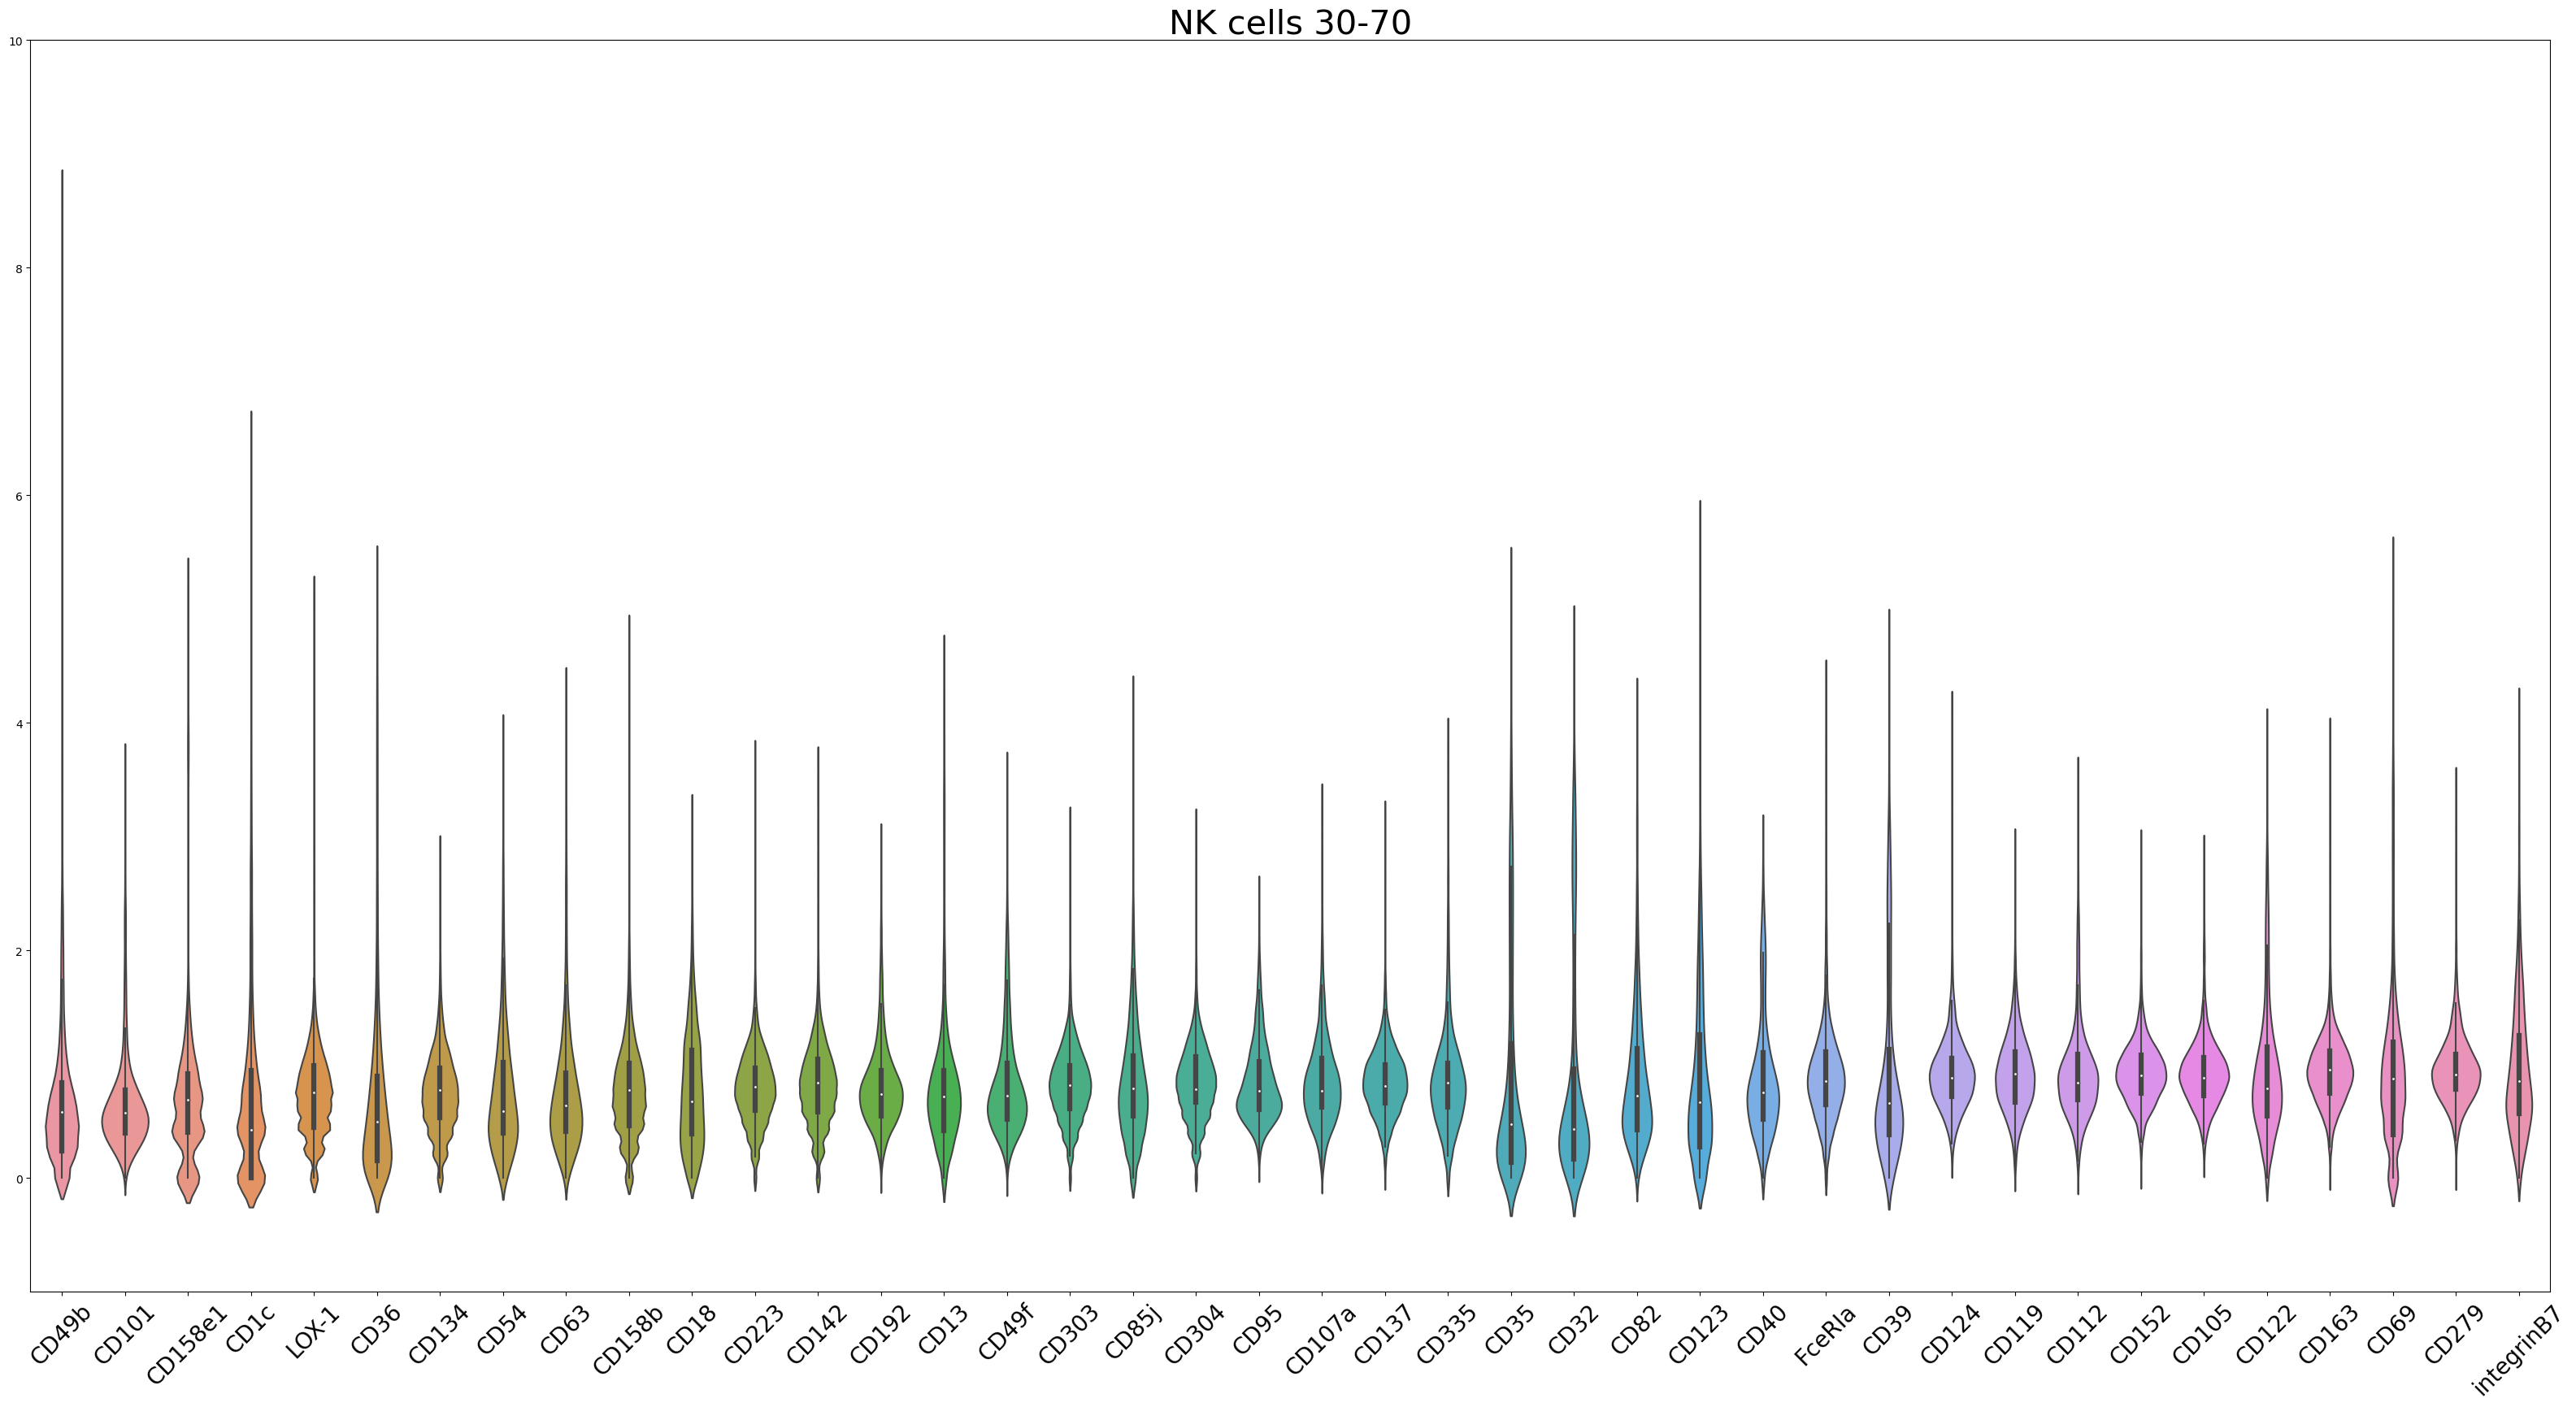

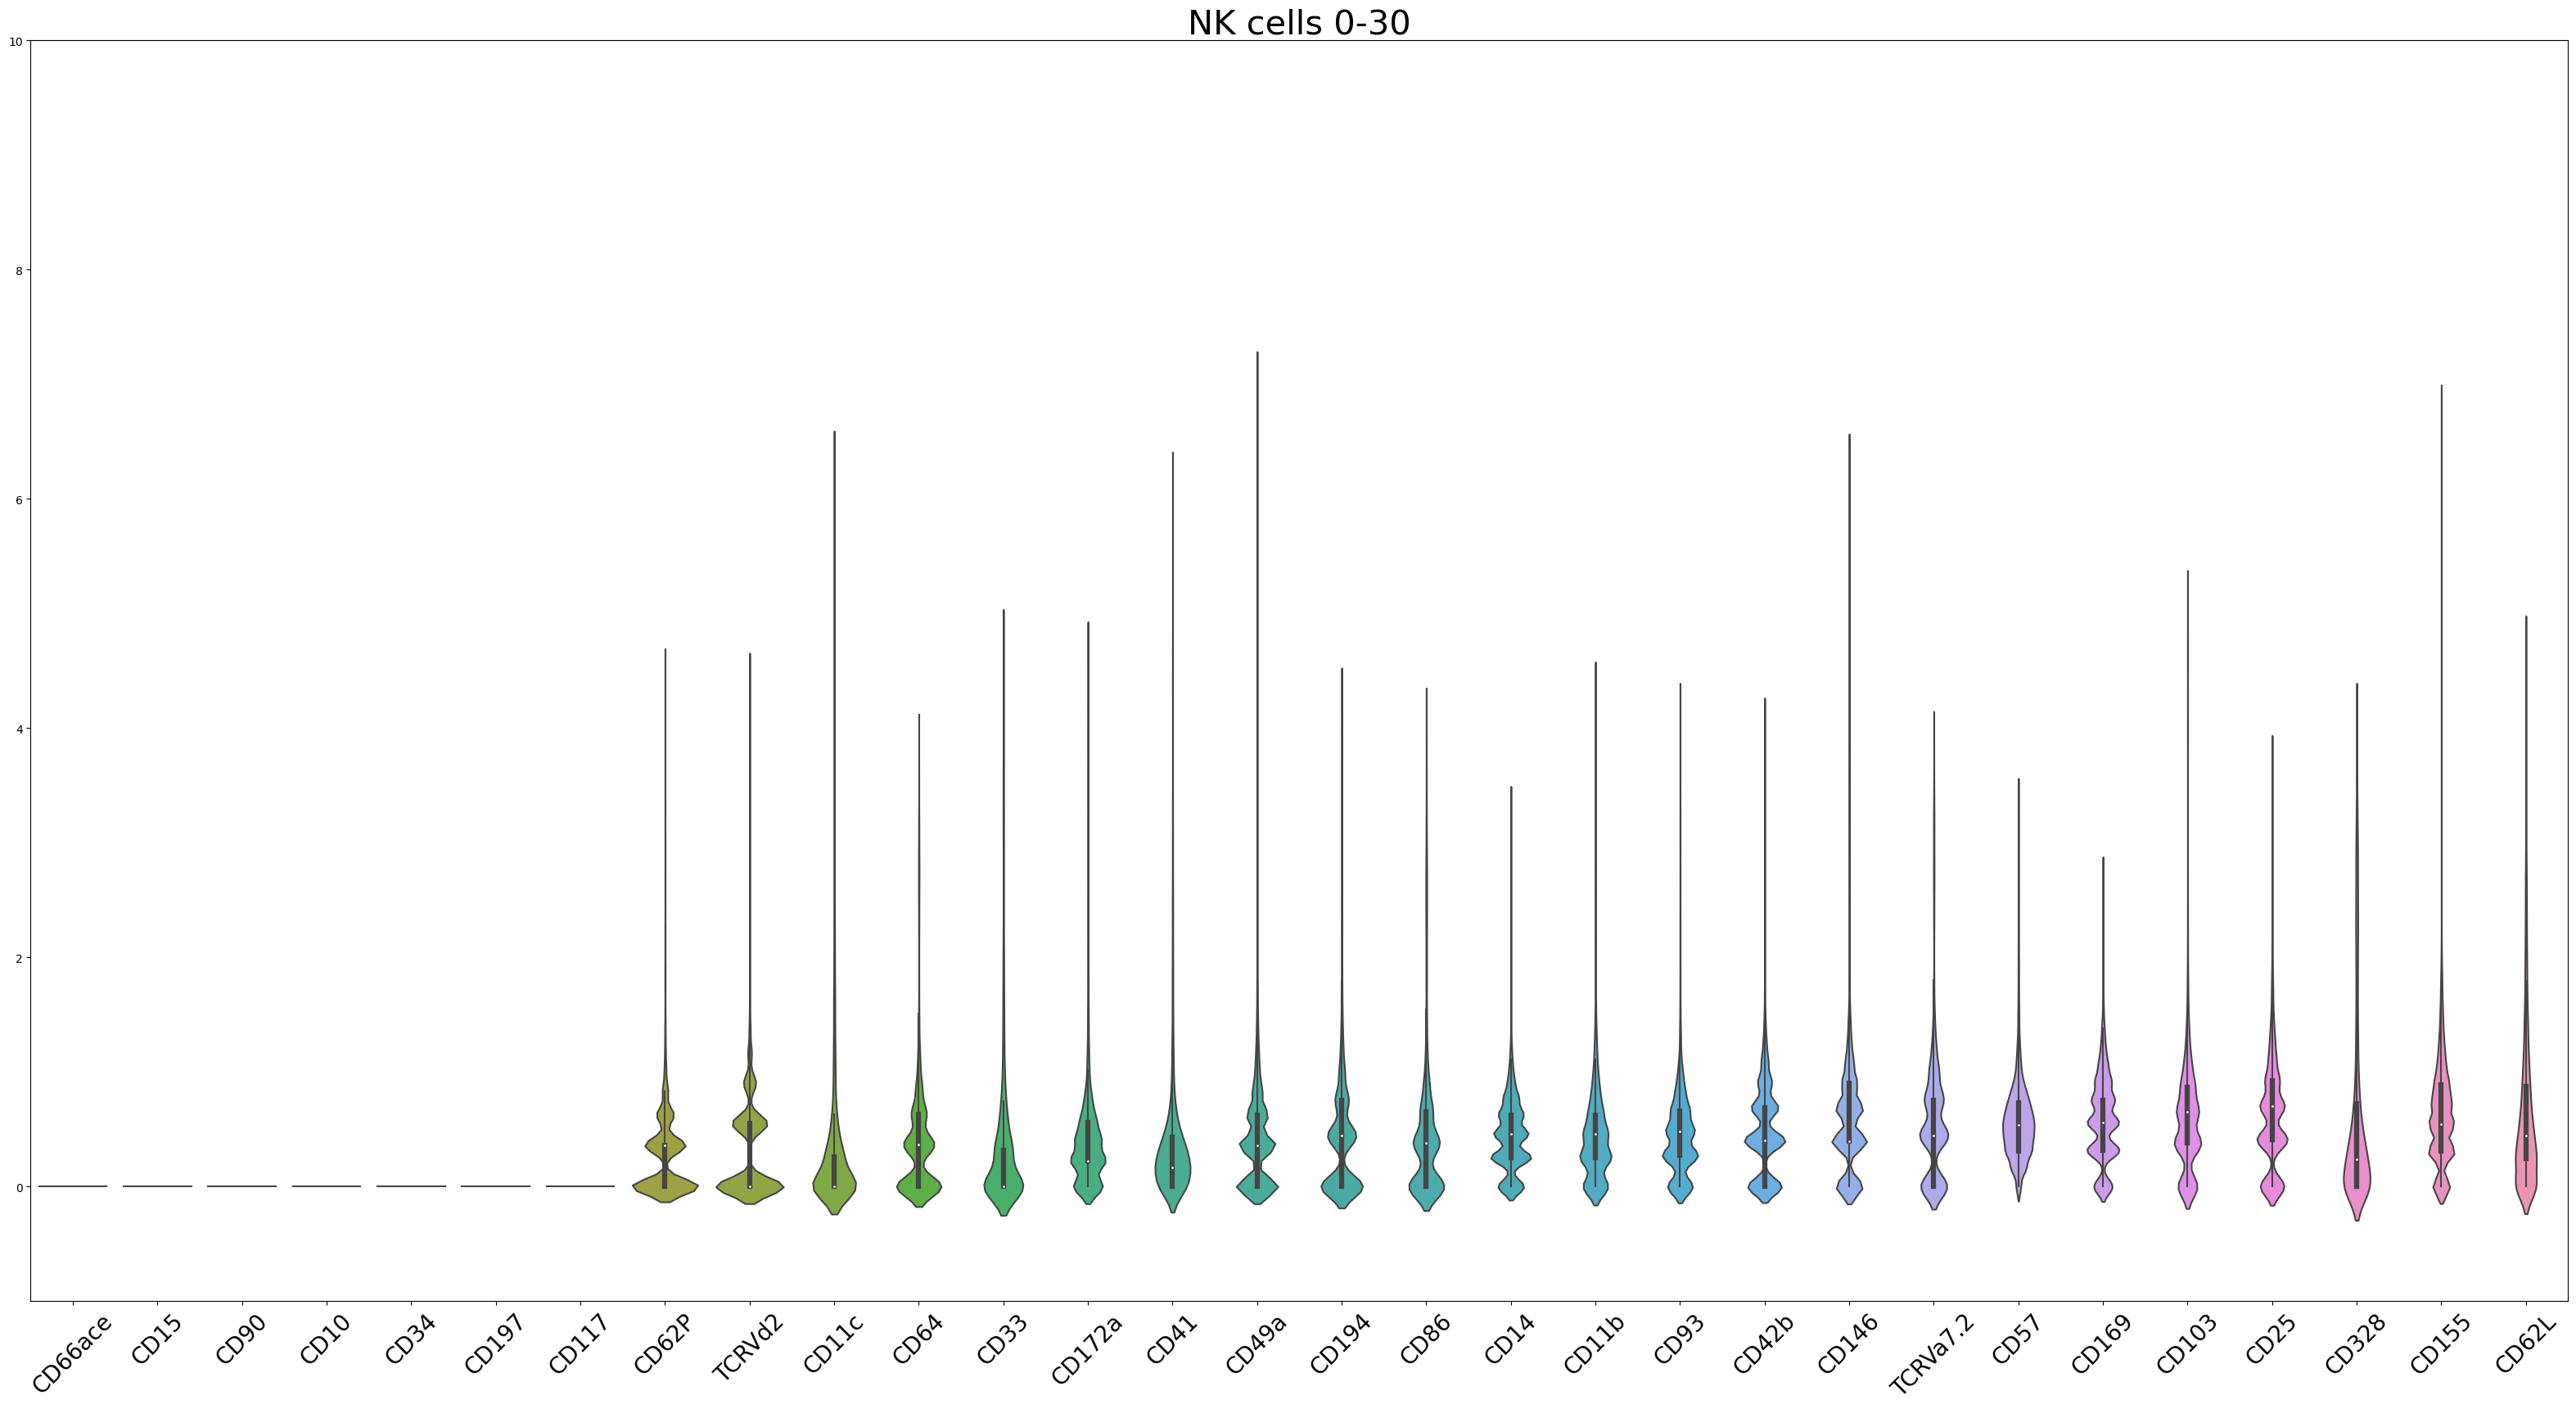

In [19]:
#NK cells

cells= len(nk_prot)

print("In total:", cells, "NK-cells in the sample" )

#From 100 to 134
plt.figure(figsize=(40,20))
plt.ylim(-1, 10)
a=sns.violinplot(data=df_sorted_all.iloc[0:26775,100:134],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK cells 100-134", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

#From 70 to 100

plt.figure(figsize=(40,20))
plt.ylim(-1, 10)
b=sns.violinplot(data=df_sorted_all.iloc[0:26775,70:100],  fliersize=0)

b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)
plt.title("NK cells 70-100", fontsize=30)

b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)

#From 30 to 70
plt.figure(figsize=(40,20))
plt.ylim(-1, 10)
c=sns.violinplot(data=df_sorted_all.iloc[0:26775,30:70],  fliersize=0)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)
plt.title("NK cells 30-70", fontsize=30)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)

#From 0 to 30
plt.figure(figsize=(40,20))
plt.ylim(-1, 10)
d=sns.violinplot(data=df_sorted_all.iloc[0:26775,0:30],  fliersize=0)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)
plt.title("NK cells 0-30", fontsize=30)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)



In [20]:
#To exclude columns that contain only zeros, all cell types included

prot = pd.DataFrame(prot)
prot != 0
(prot != 0).any(axis=0)
prot.loc[:, (prot != 0).any(axis=0)]
prot = prot.loc[:, (prot != 0.0).any(axis=0)]


In [21]:
#To exclude columns that contain only zeros from NK-only file

nk_prot = pd.DataFrame(nk_prot)
nk_prot != 0.000
(nk_prot != 0.000).any(axis=0)
nk_prot.loc[:, (nk_prot != 0.000).any(axis=0)]
nk_prot = nk_prot.loc[:, (nk_prot != 0.000).any(axis=0)]


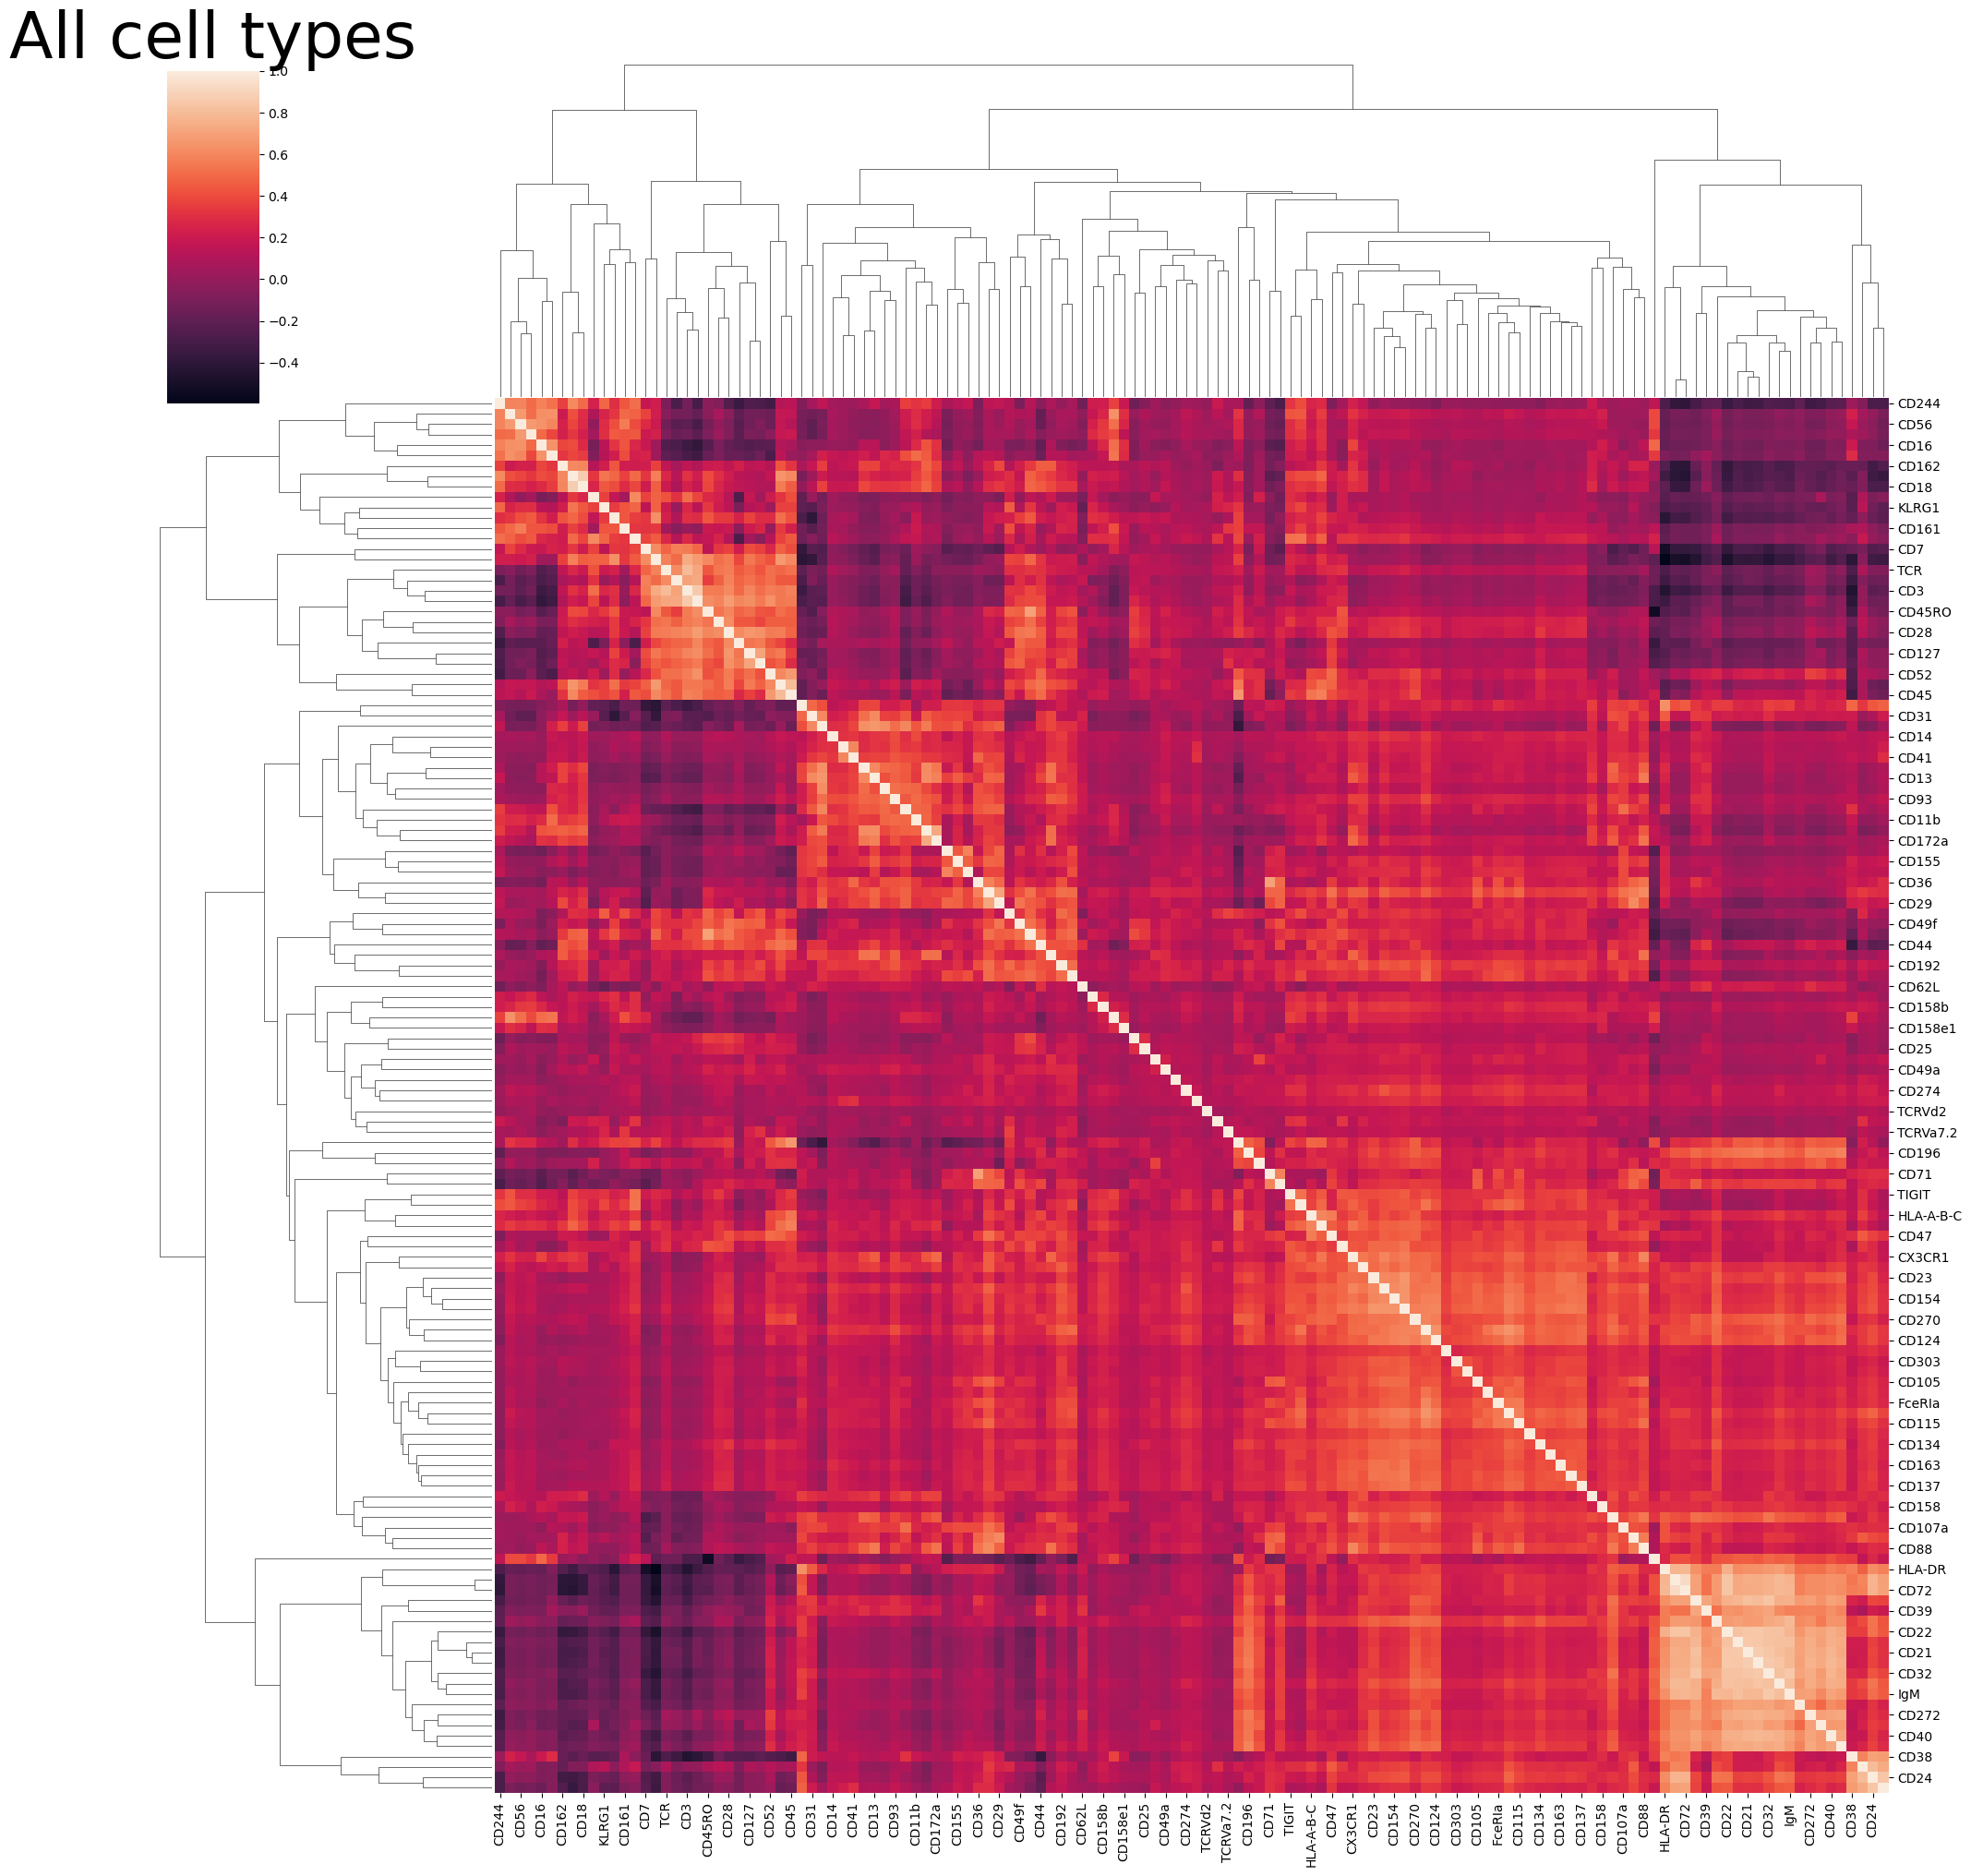

In [22]:
#All cells
matrix1=prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix1, figsize=(20,20))
plt.title('All cell types', fontsize = 50) ;



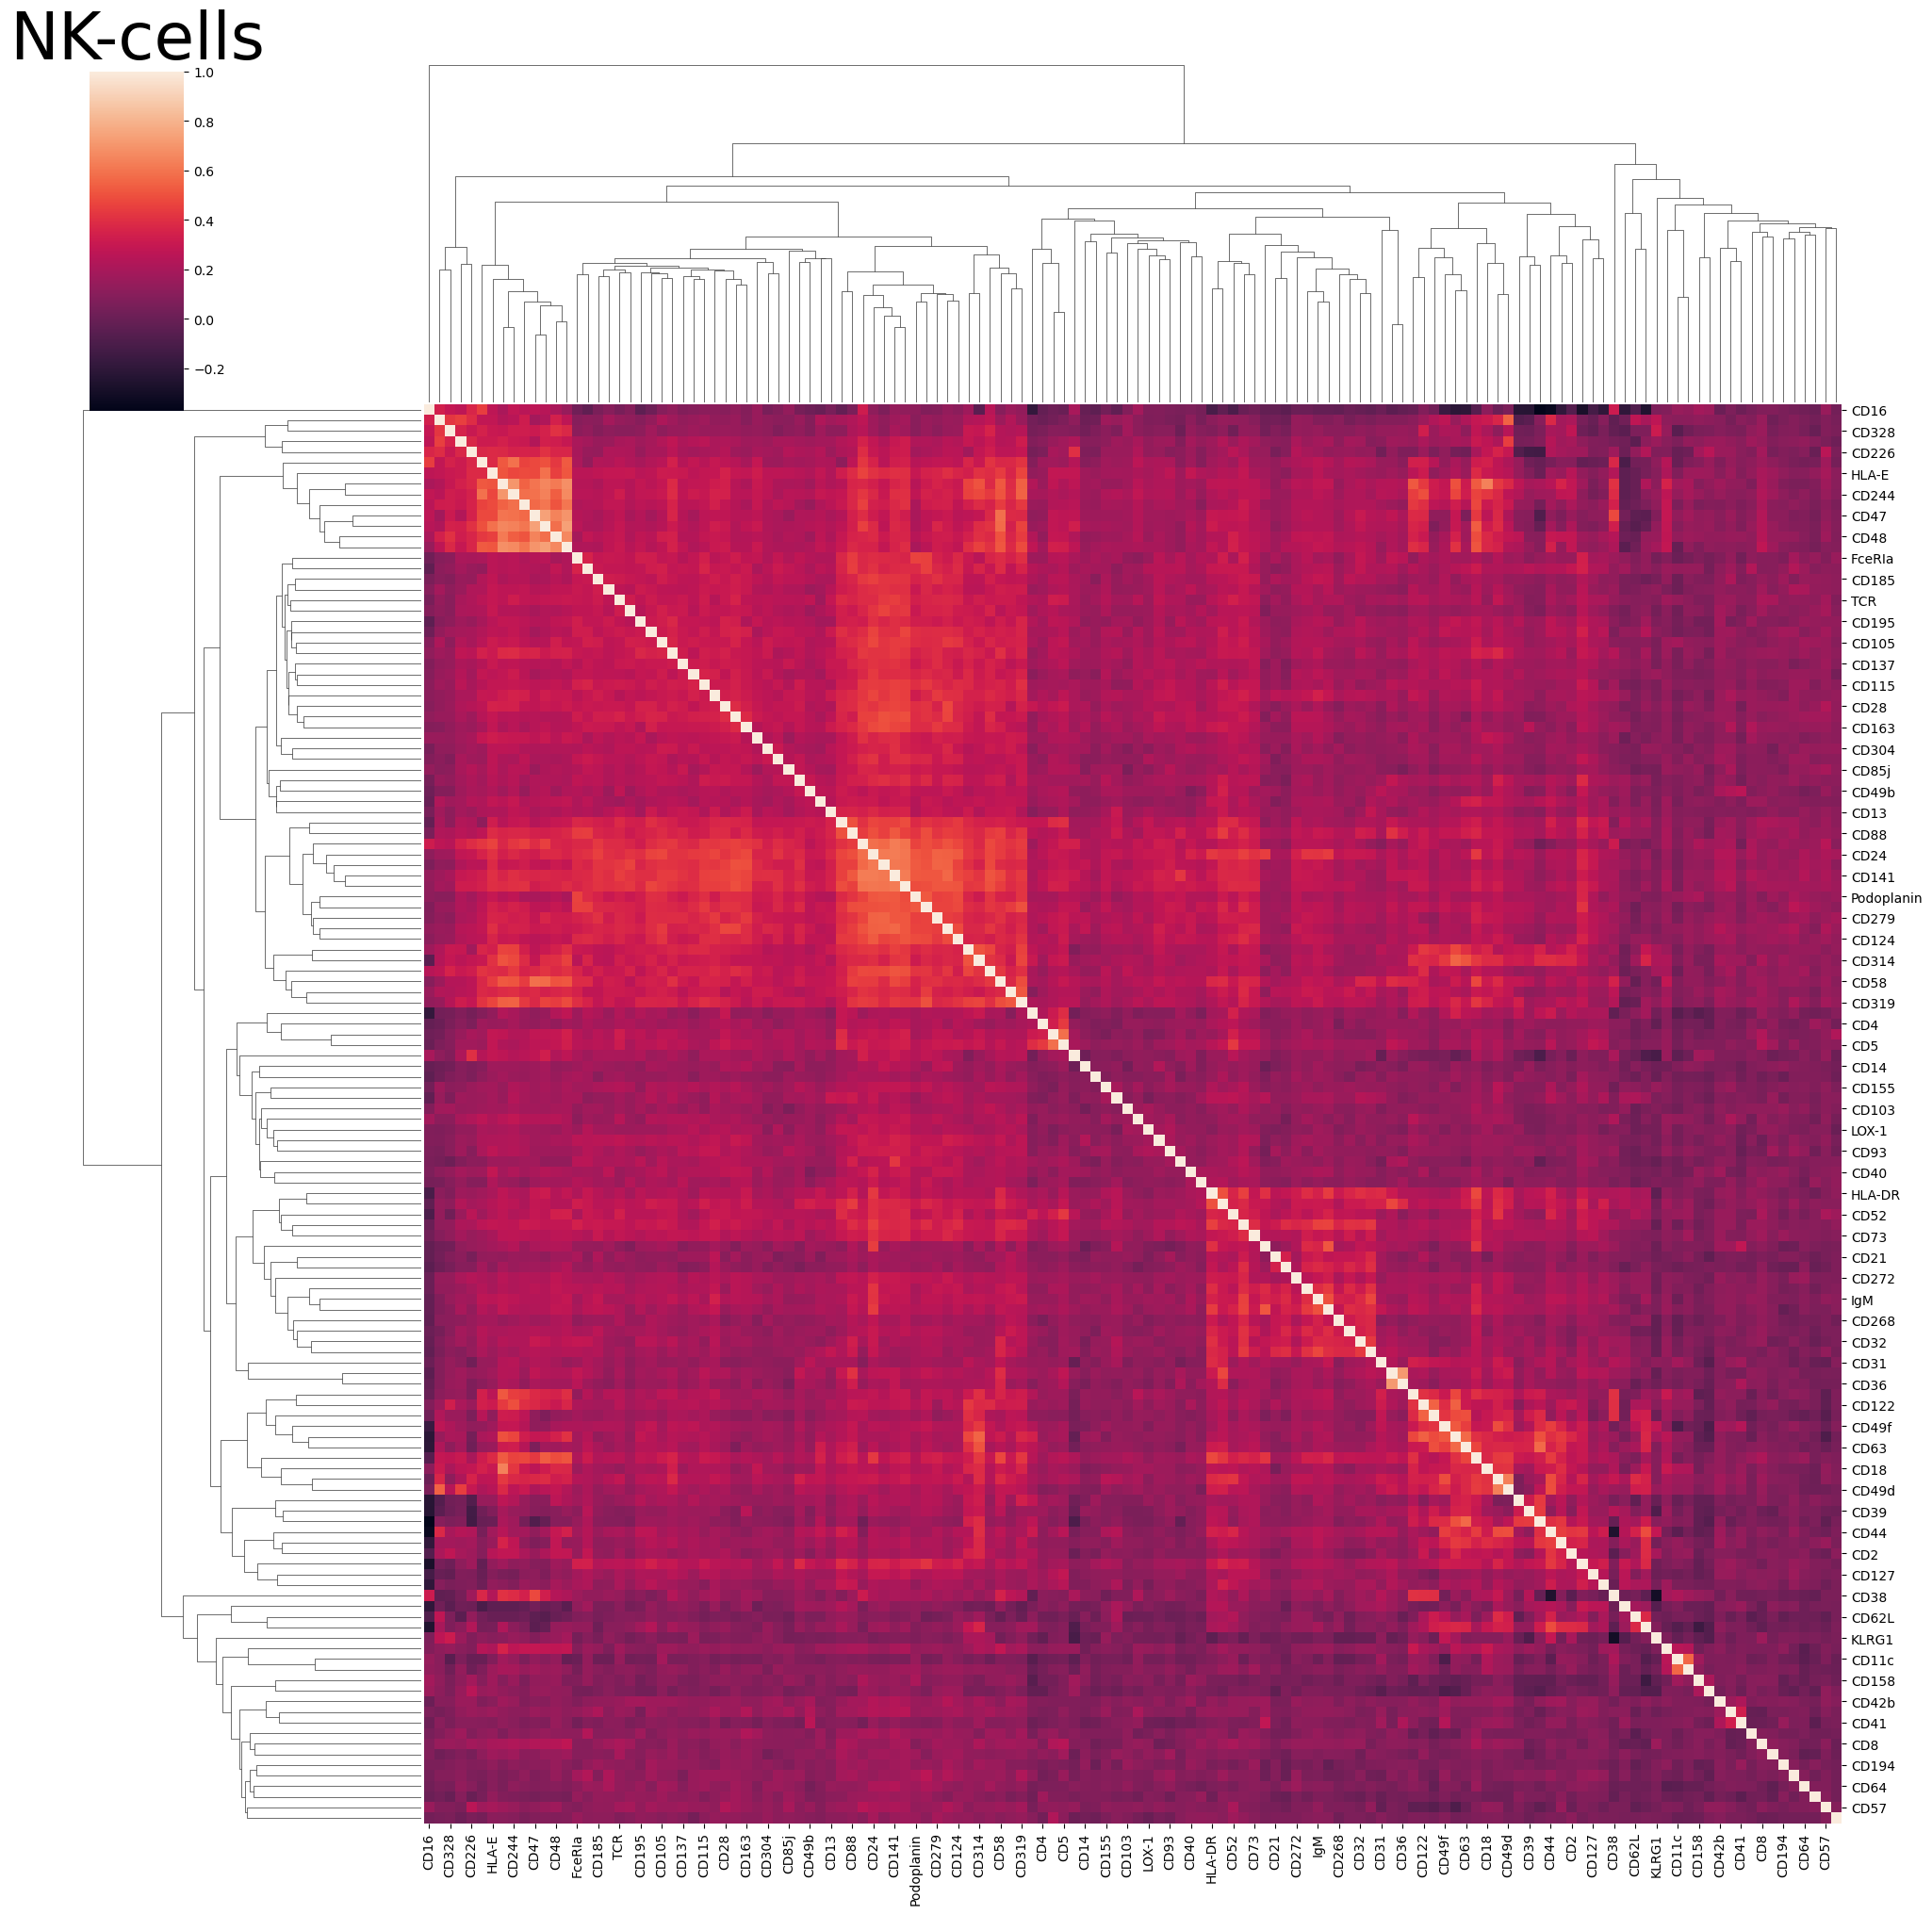

In [23]:
#NK cells
matrix3=nk_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix3, figsize=(20,20))
plt.title('NK-cells', fontsize = 50) ;


In [24]:
#Adding protein data to anndata file for UMAPs, all cell types

a = adata_sample.obs
b = prot

neurips_umap=pd.concat([a, b], axis=1)

adata_sample.obs=neurips_umap
adata_sample

AnnData object with n_obs × n_vars = 6565 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40', 'CD154', 'CD52', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'HLA-A-B-C', 'CD45RA', 'CD123', 'CD7', 'CD105', 'CD49f', 'CD194', 'CD4', 'CD44', 'CD14', 'CD16', 'CD25', 'CD45RO', 'CD279', 'TIGIT', 'CD20', 'CD335', 'CD31', 'Podoplanin', 'CD146', 'IgM', 'CD5', 'CD195', 'CD32', 'CD196', 'CD185', 'CD103', 'CD69', 'CD62L', 'CD161', 'CD152', 'CD223', 'KLRG1', 'CD27', 'CD107a', 'CD95', 'CD134', 'HLA-DR', 'CD1c', 'CD11b', 'CD64', 'CD141', 'CD1d', 'CD314', 'CD35', 'CD57', 'CD272', 'CD278', 'CD58', 'CD39', 'CX3CR1', 'CD24',

In [25]:
#Adding protein data to anndata file for UMAPs, all cell types

a = adata_nk.obs
b = nk_prot

adata_nk_umap=pd.concat([a, b], axis=1)

adata_nk.obs=adata_nk_umap

adata_nk

AnnData object with n_obs × n_vars = 730 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40', 'CD154', 'CD52', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'HLA-A-B-C', 'CD45RA', 'CD123', 'CD7', 'CD105', 'CD49f', 'CD194', 'CD4', 'CD44', 'CD14', 'CD16', 'CD25', 'CD45RO', 'CD279', 'TIGIT', 'CD20', 'CD335', 'CD31', 'Podoplanin', 'CD146', 'IgM', 'CD5', 'CD195', 'CD32', 'CD196', 'CD185', 'CD103', 'CD69', 'CD62L', 'CD161', 'CD152', 'CD223', 'KLRG1', 'CD27', 'CD107a', 'CD95', 'CD134', 'HLA-DR', 'CD1c', 'CD11b', 'CD64', 'CD141', 'CD1d', 'CD314', 'CD35', 'CD57', 'CD272', 'CD278', 'CD58', 'CD39', 'CX3CR1', 'CD24', 

In [26]:
#NK-cell markers

nk_immature = ['CD56']
nk_activating= ['CD335', 'CD314', 'CD2', 'CD226']
nk_maturation= ['CD57']
# nk_inhibitory= ['CD158A', 'CD158B2', 'CD158E1'] the markers not found in Neurips data



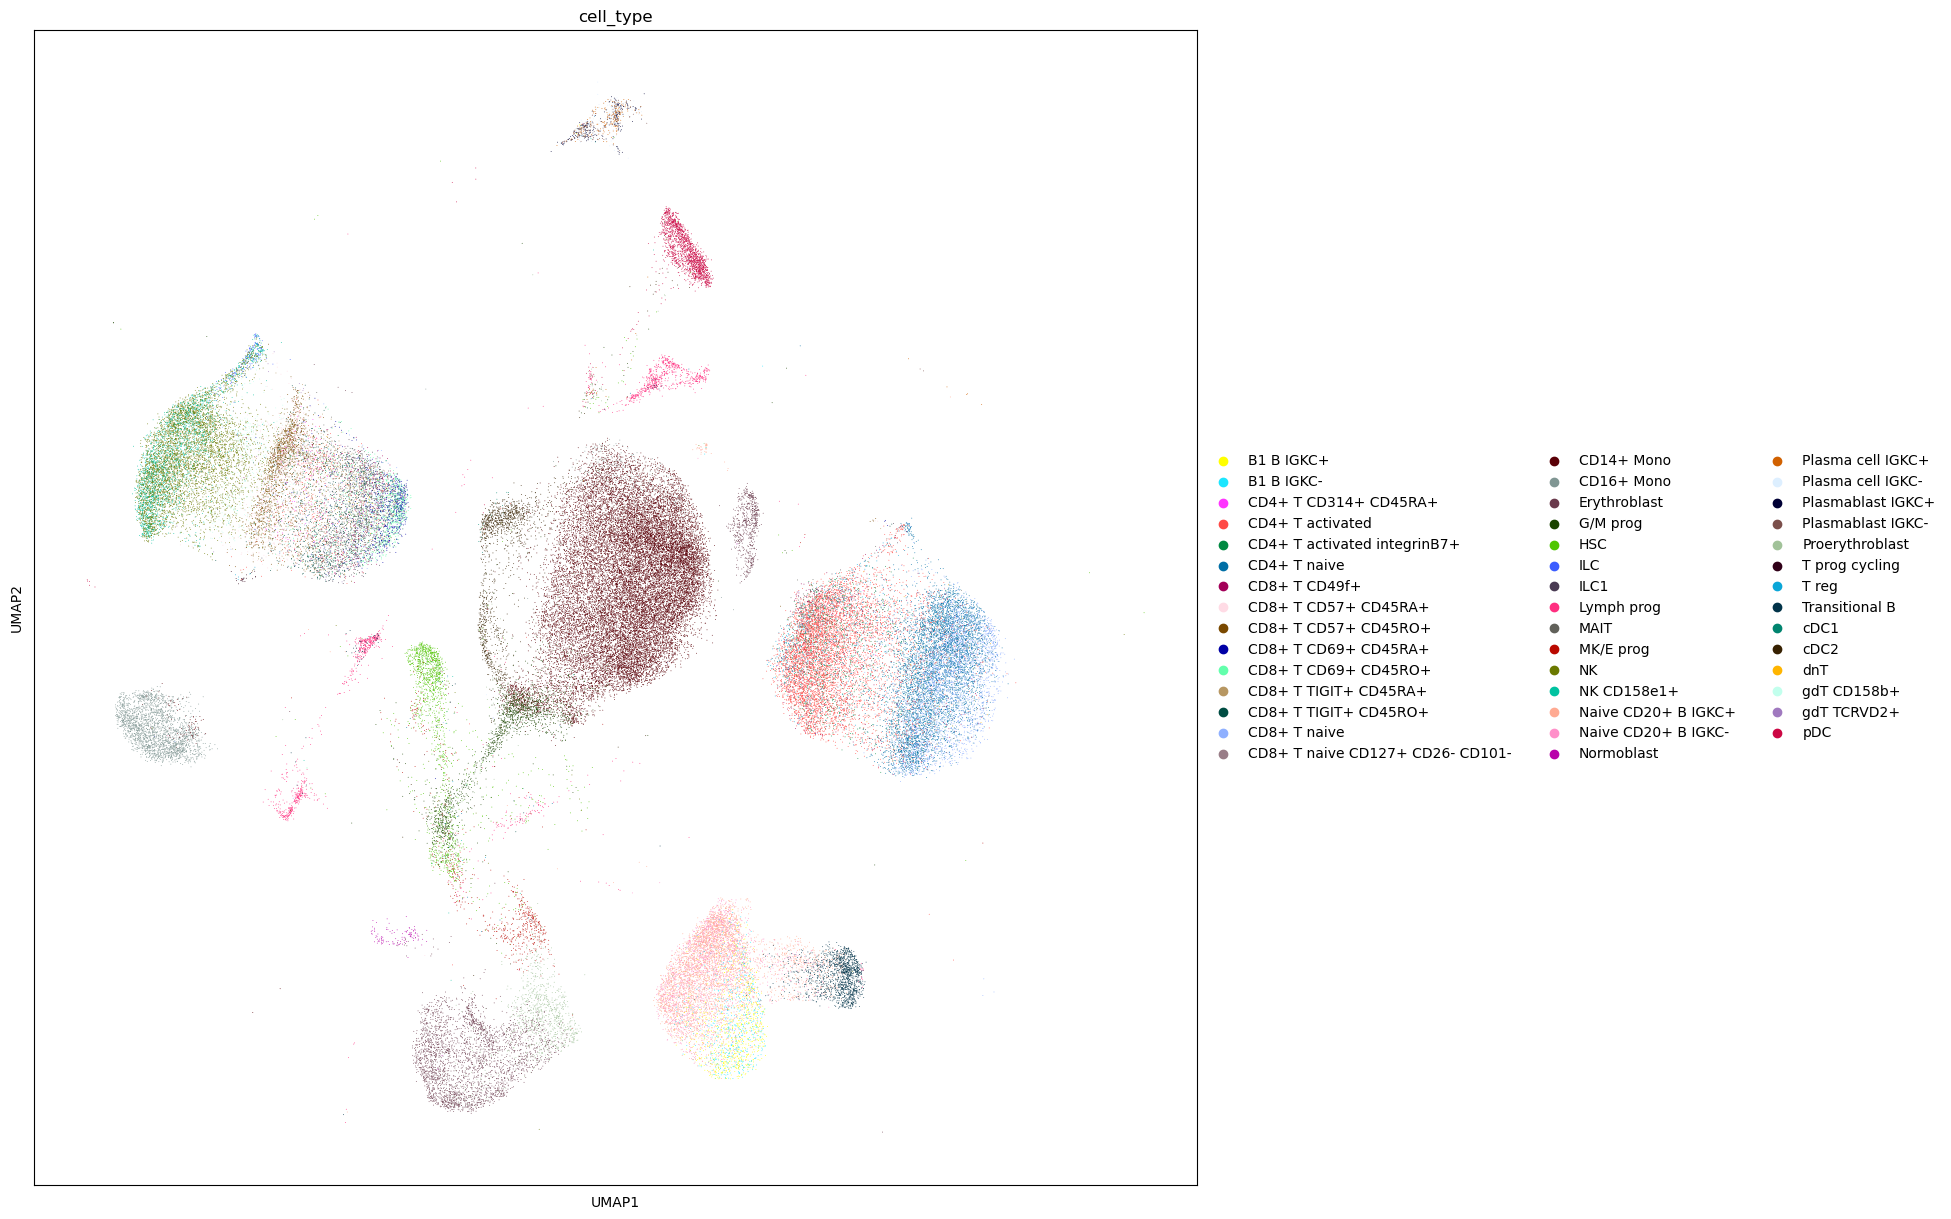

In [27]:
#whole neurips dataset
with rc_context({'figure.figsize': (15, 15)}):
    sc.pl.umap(adata_neurips, color= "cell_type",color_map= 'viridis')

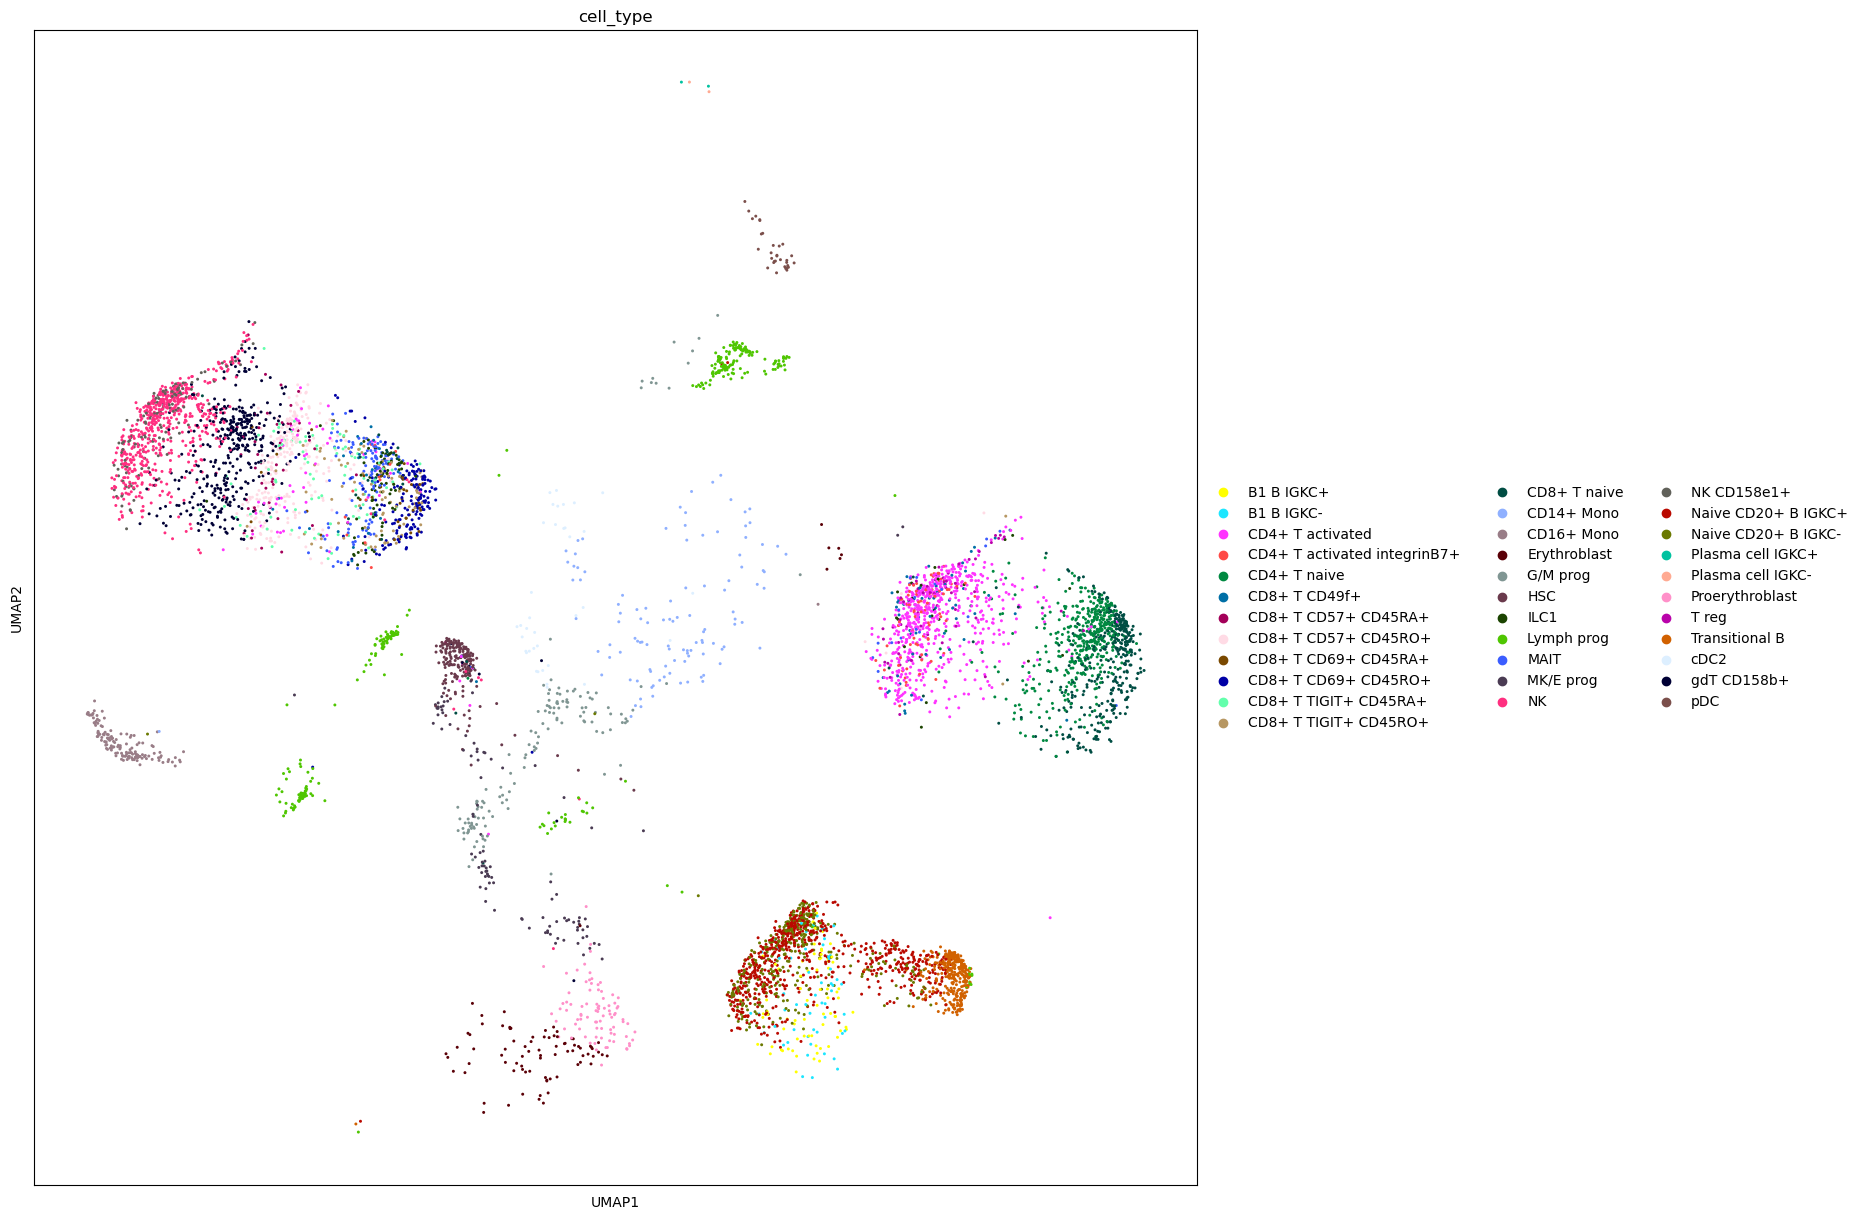

In [28]:
#All cell types
with rc_context({'figure.figsize': (15, 15)}):
    sc.pl.umap(adata_sample, color= "cell_type", color_map= 'viridis')

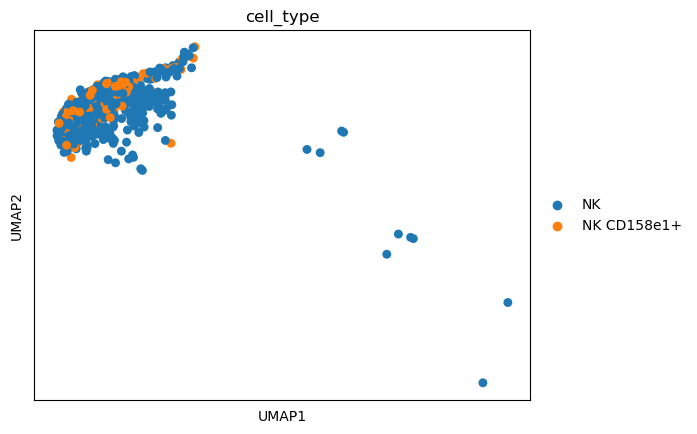

In [29]:
#NK-cells

sc.pl.umap(adata_nk, color = "cell_type", color_map = 'viridis')

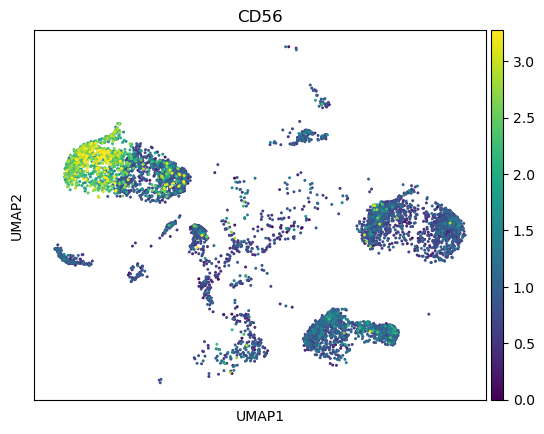

In [30]:
#All cell types

sc.pl.umap(adata_sample, color= nk_immature, vmax="p99", color_map= 'viridis')

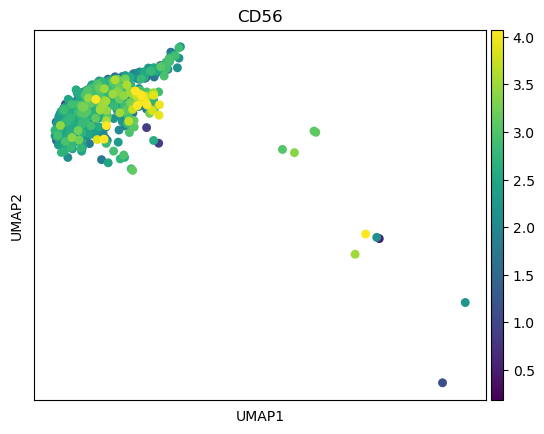

In [31]:
#NK-cells

sc.pl.umap(adata_nk, color = nk_immature, vmax="p99", color_map = 'viridis', ncols=1)

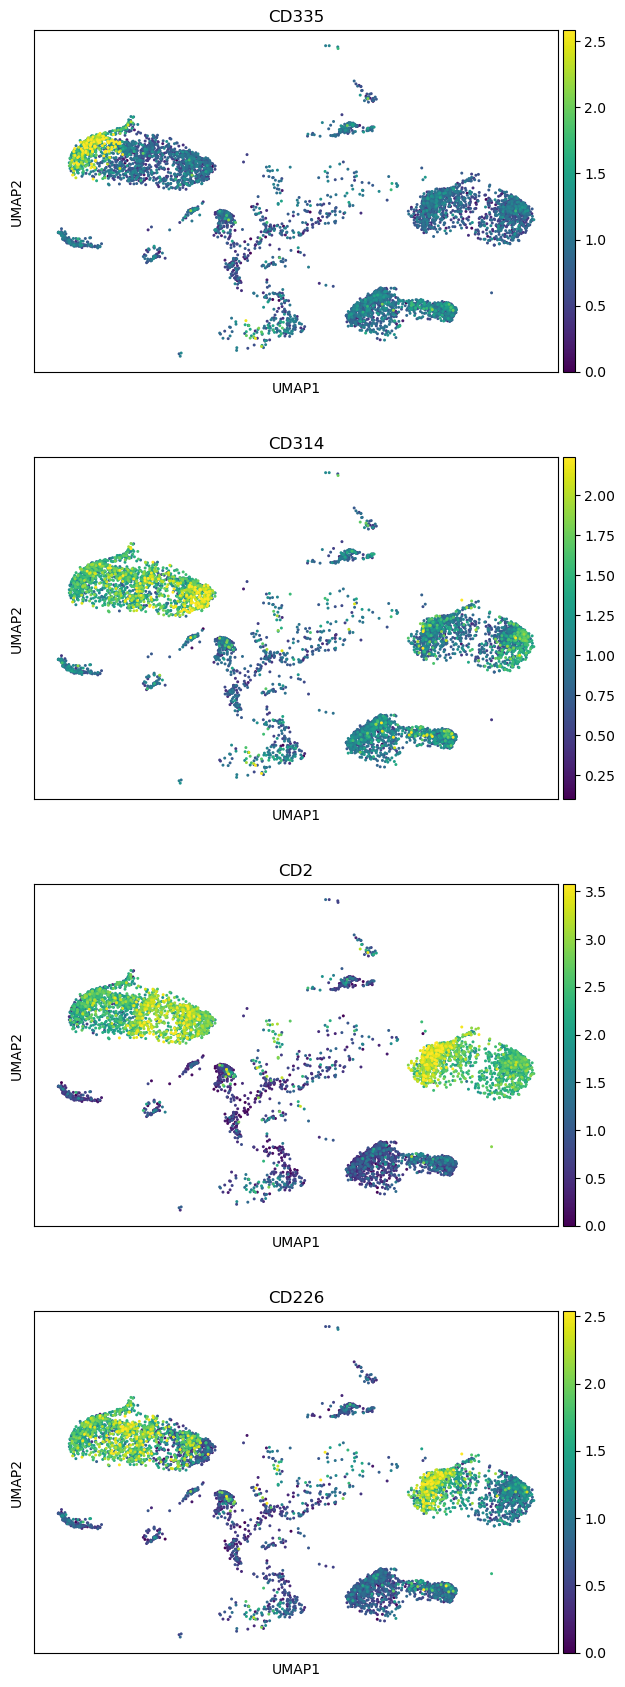

In [32]:
#All cell types

sc.pl.umap(adata_sample, color= nk_activating, vmax="p99", color_map= 'viridis', ncols=1)

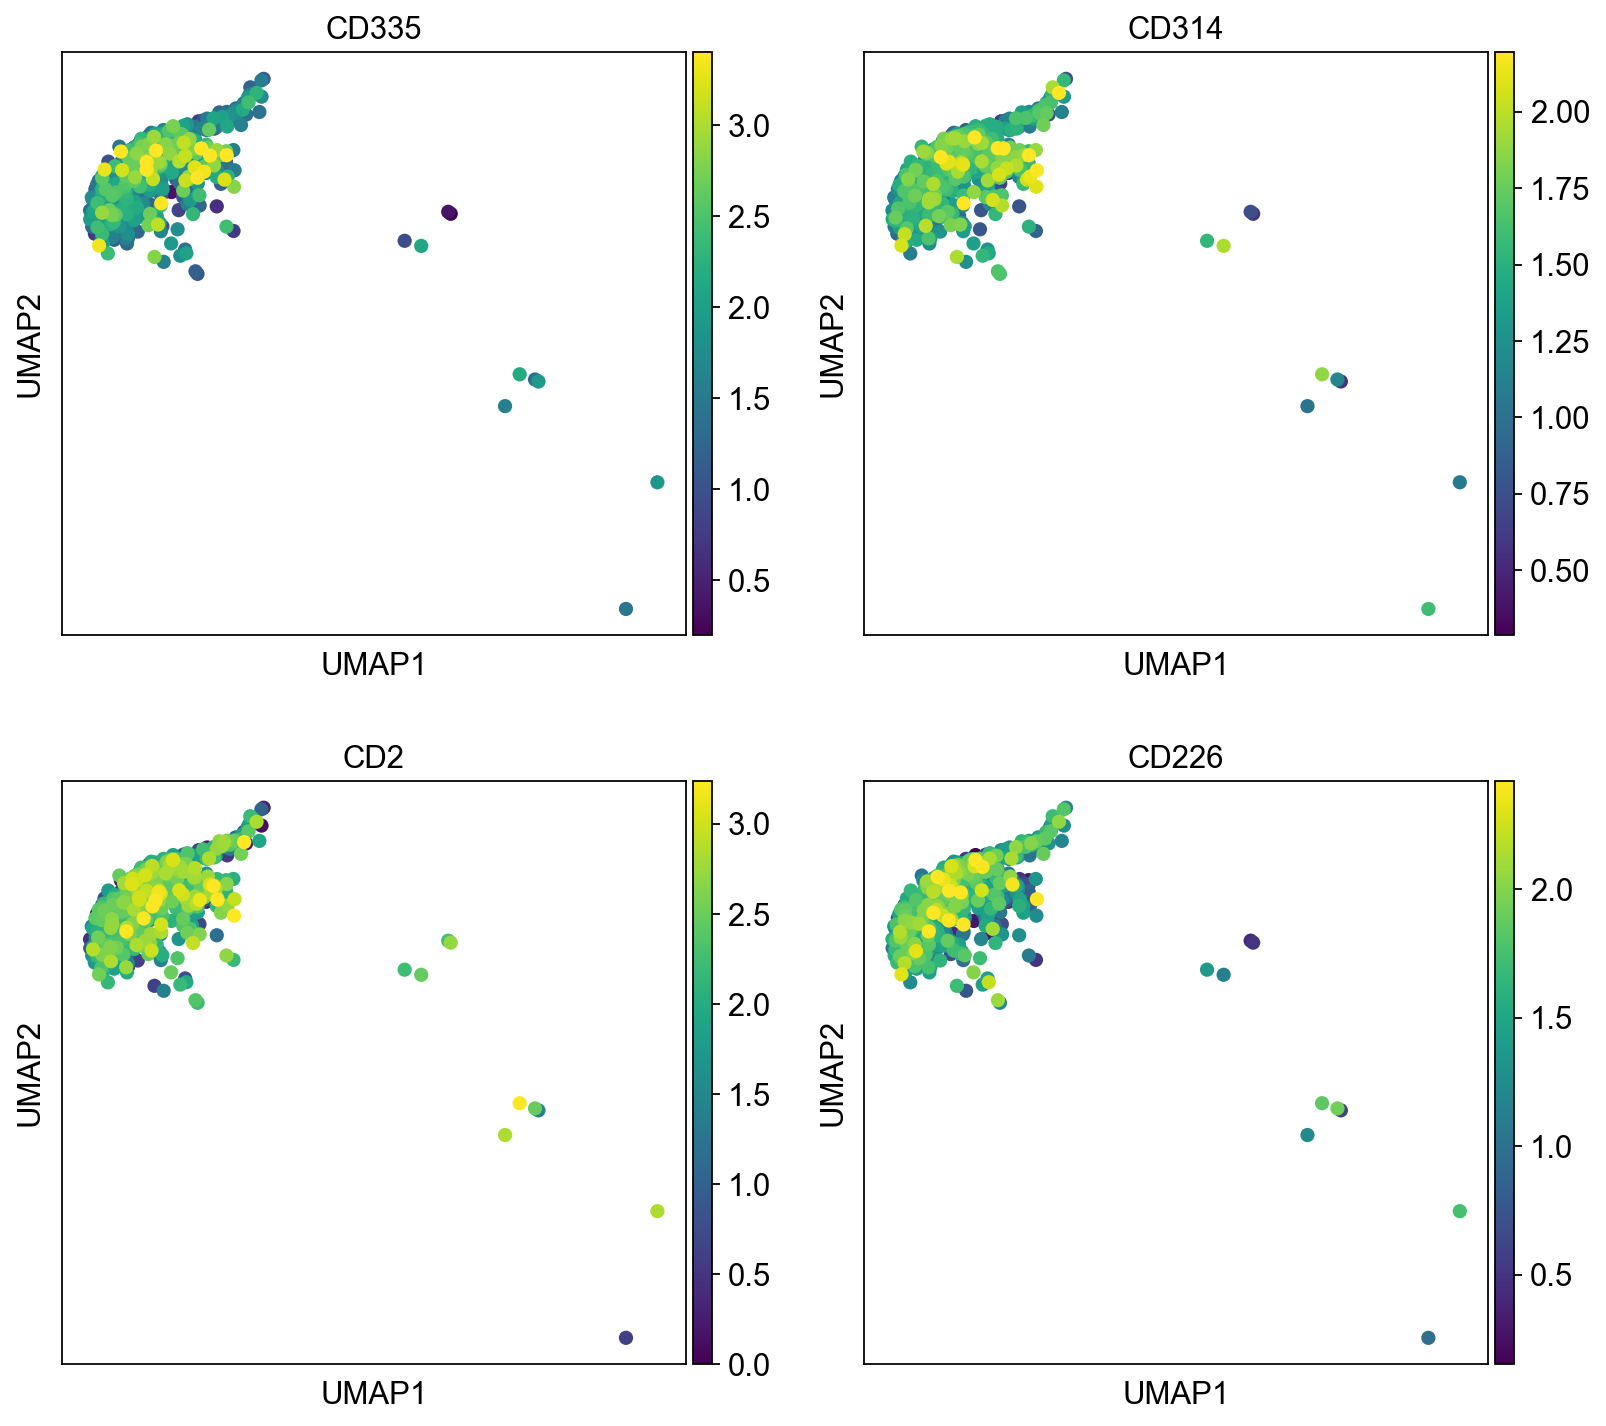

In [45]:
#NK-cells

sc.pl.umap(adata_nk, color = nk_activating, vmax="p99", color_map = 'viridis', ncols=2)

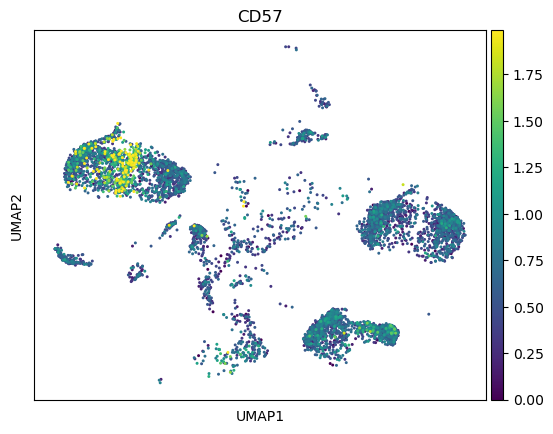

In [34]:
#All cell types

sc.pl.umap(adata_sample, color= nk_maturation, vmax="p99", color_map= 'viridis')

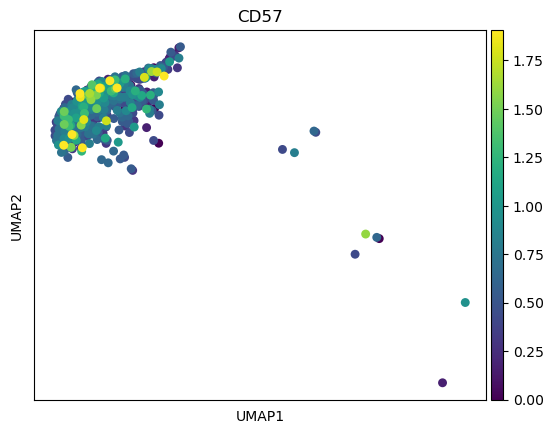

In [35]:
#NK-cells

sc.pl.umap(adata_nk, color = nk_maturation, vmax="p99", color_map = 'viridis', ncols=1)

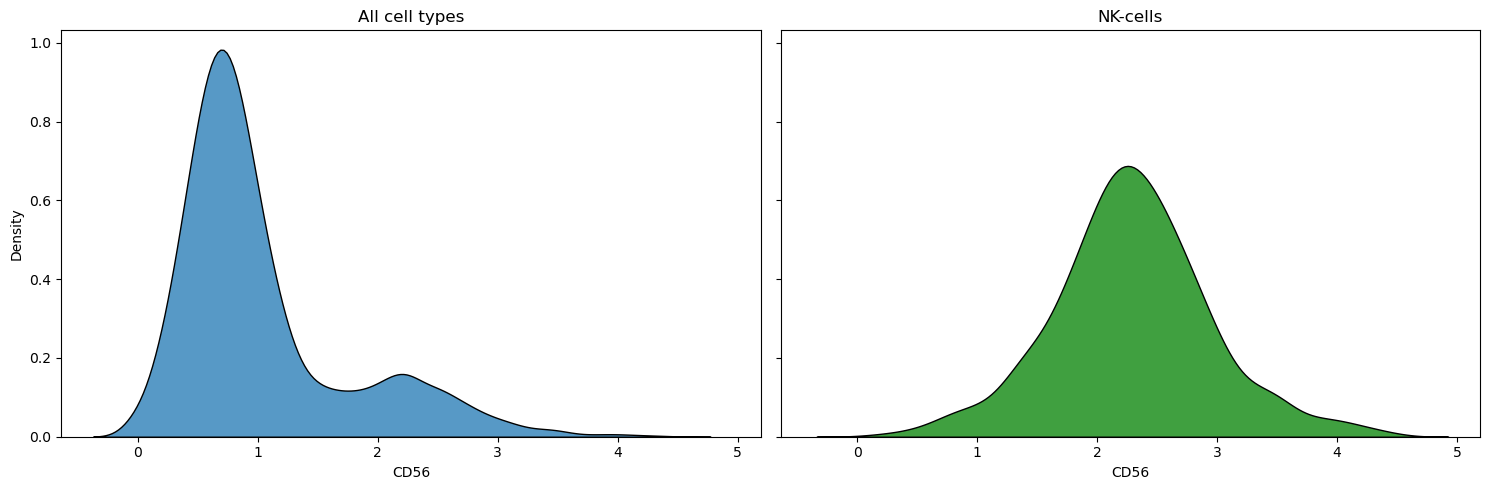

In [36]:
#NK-cells

for column_name in nk_immature:
    fig, ax =plt.subplots(1,2 ,tight_layout=True, figsize=(15, 5), sharex=True, sharey=True)
    fig.show()

    ax1 = sns.kdeplot(data=prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=nk_prot, x=column_name, color = "g", multiple="stack", ax=ax[1]) ;


    ax1.title.set_text('All cell types')    
    ax2.title.set_text('NK-cells')
    
    plt.show()

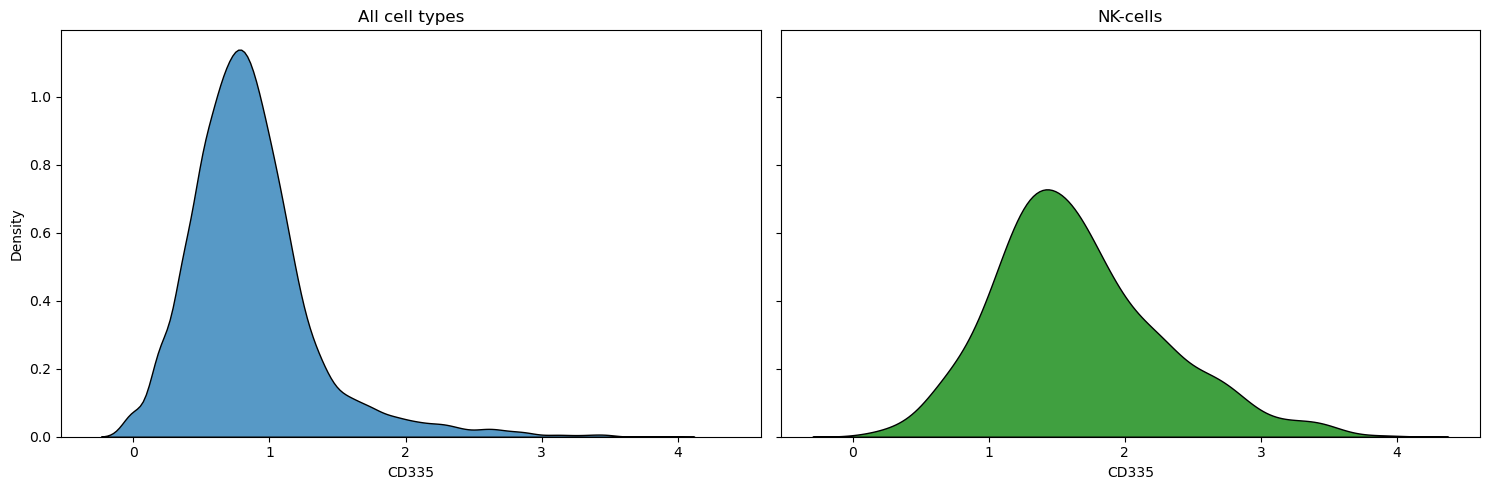

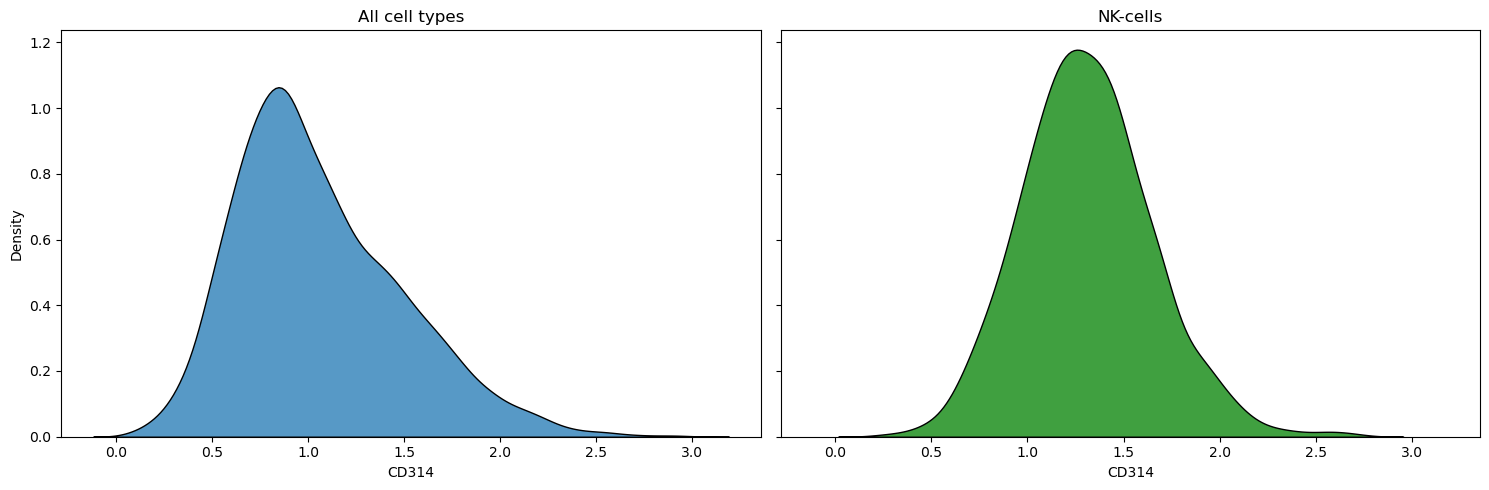

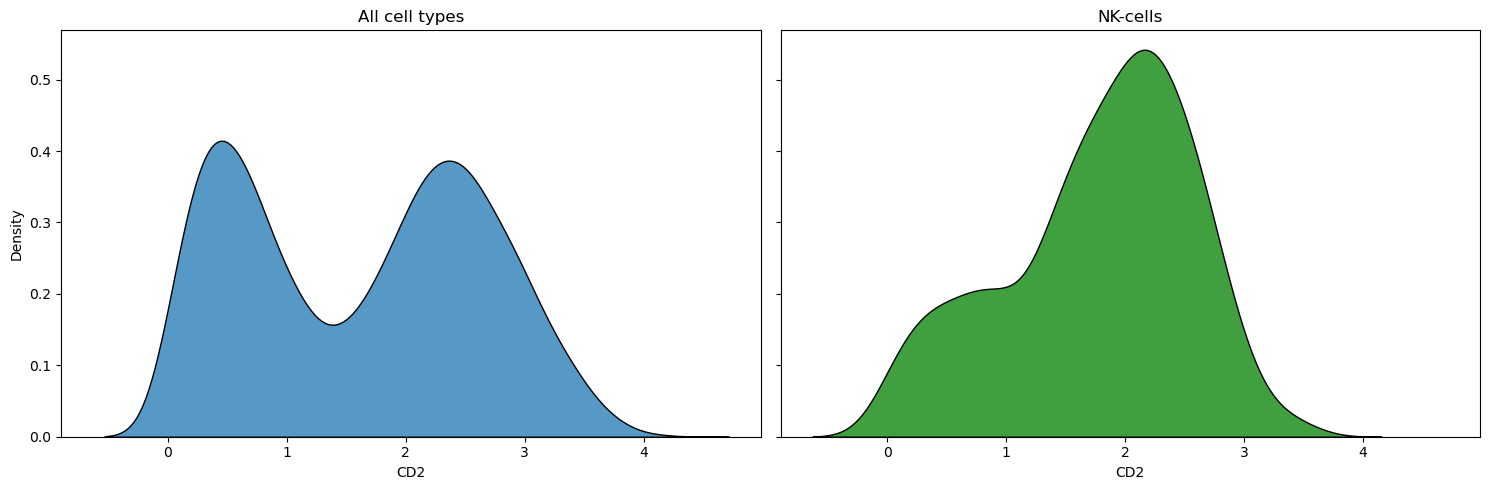

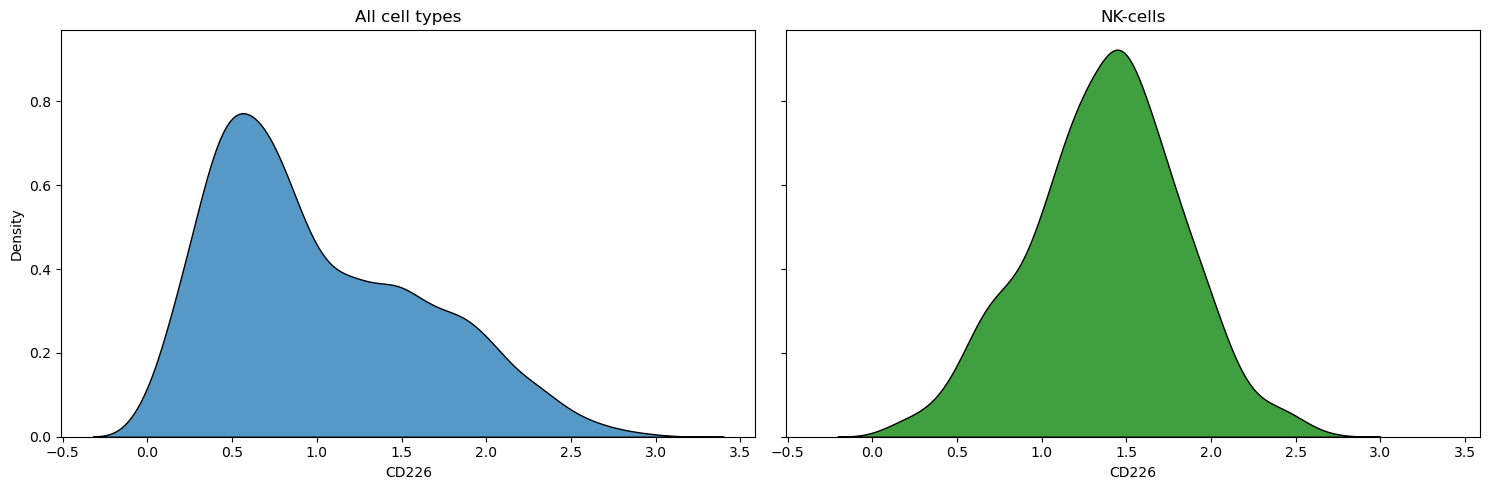

In [37]:
#NK-cells

for column_name in nk_activating:
    fig, ax =plt.subplots(1,2 ,tight_layout=True, figsize=(15, 5), sharex=True, sharey=True)
    fig.show()

    ax1 = sns.kdeplot(data=prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=nk_prot, x=column_name, color = "g", multiple="stack", ax=ax[1]) ;


    ax1.title.set_text('All cell types')    
    ax2.title.set_text('NK-cells')
    
    plt.show()

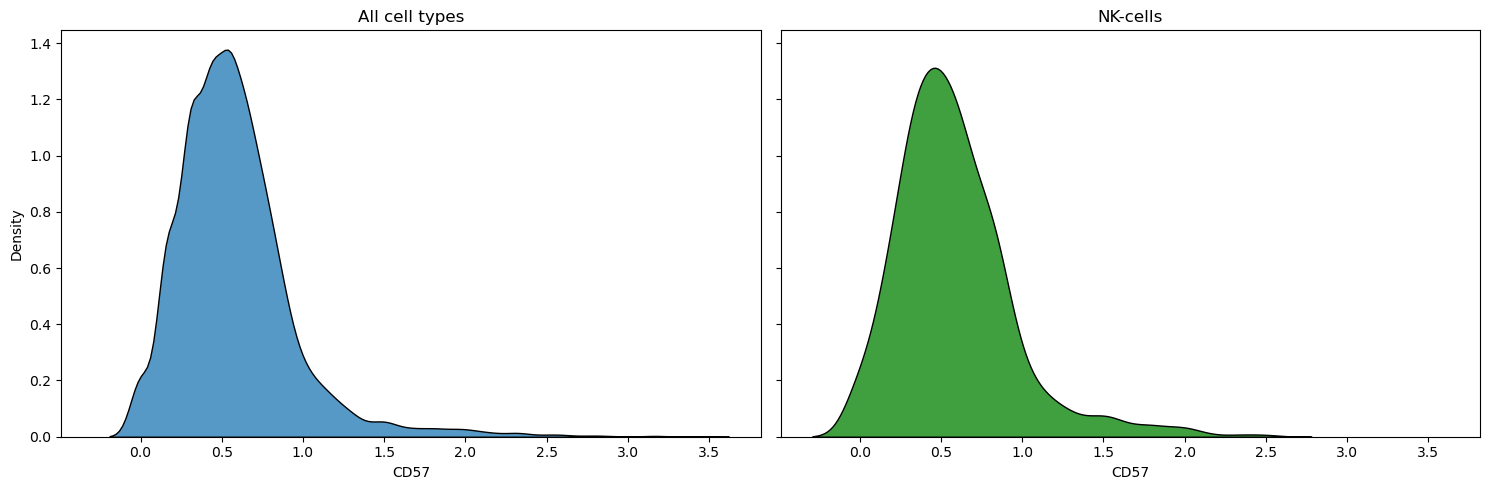

In [38]:
#NK-cells

for column_name in nk_maturation:
    fig, ax =plt.subplots(1,2 ,tight_layout=True, figsize=(15, 5), sharex=True, sharey=True)
    fig.show()

    ax1 = sns.kdeplot(data=prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=nk_prot, x=column_name, color = "g", multiple="stack", ax=ax[1]) ;


    ax1.title.set_text('All cell types')    
    ax2.title.set_text('NK-cells')
    
    plt.show()

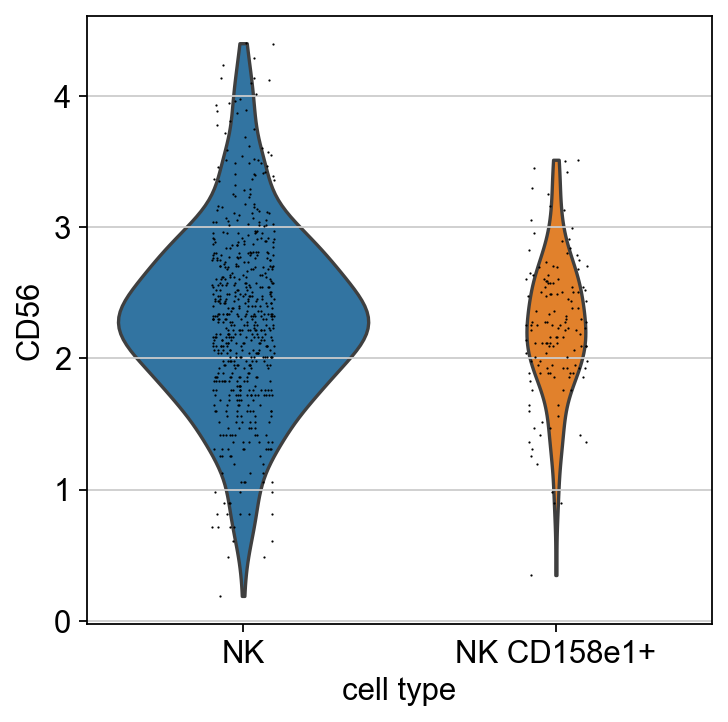

In [39]:
#Only NK, immature markers

sc.set_figure_params(figsize=(5, 5))

sc.pl.violin(adata_nk, keys= nk_immature, groupby= 'cell_type', scale = 'count')



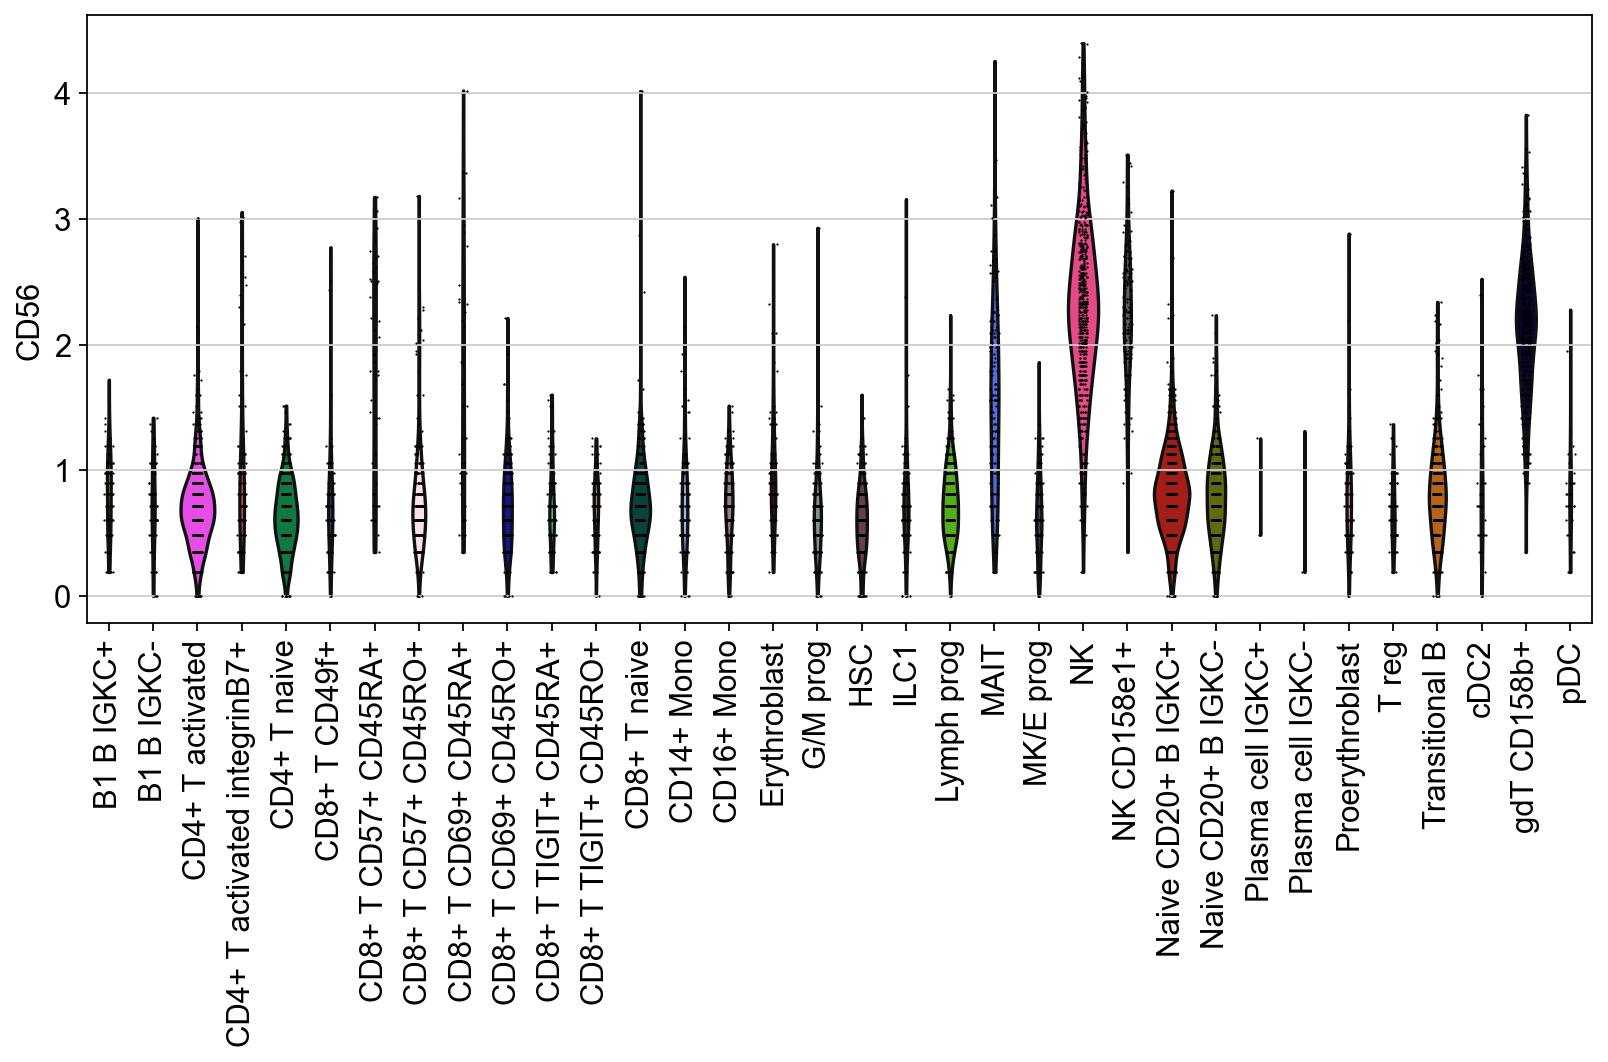

In [40]:
#all celltypes, immature markers

with rc_context({'figure.figsize': (10, 5)}):
    sc.pl.violin(adata_sample, keys= nk_immature, groupby= 'cell_type', scale = 'count', rotation=90)

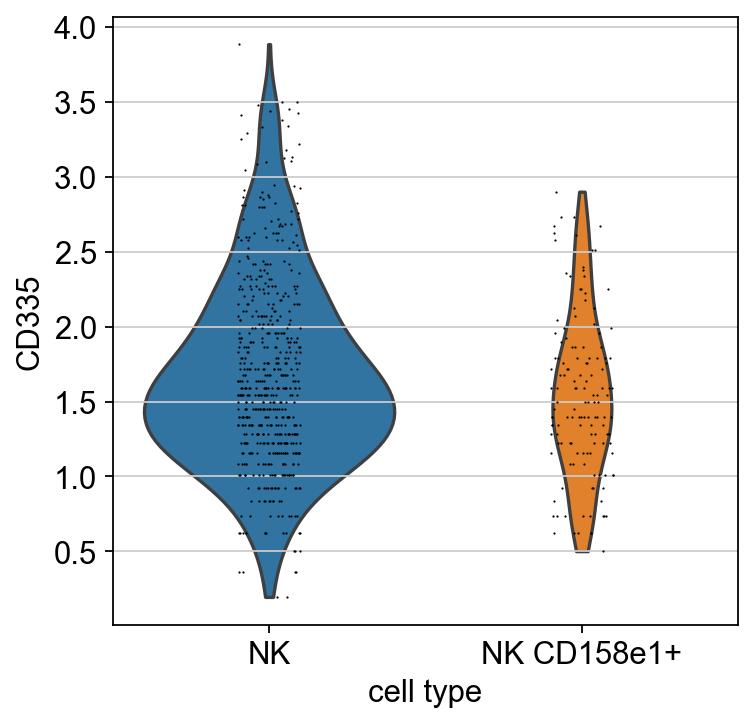

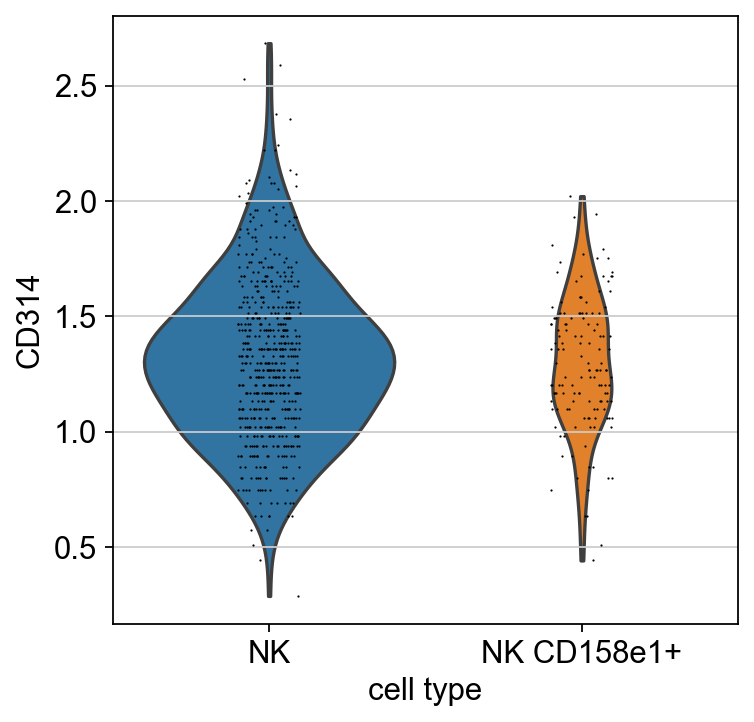

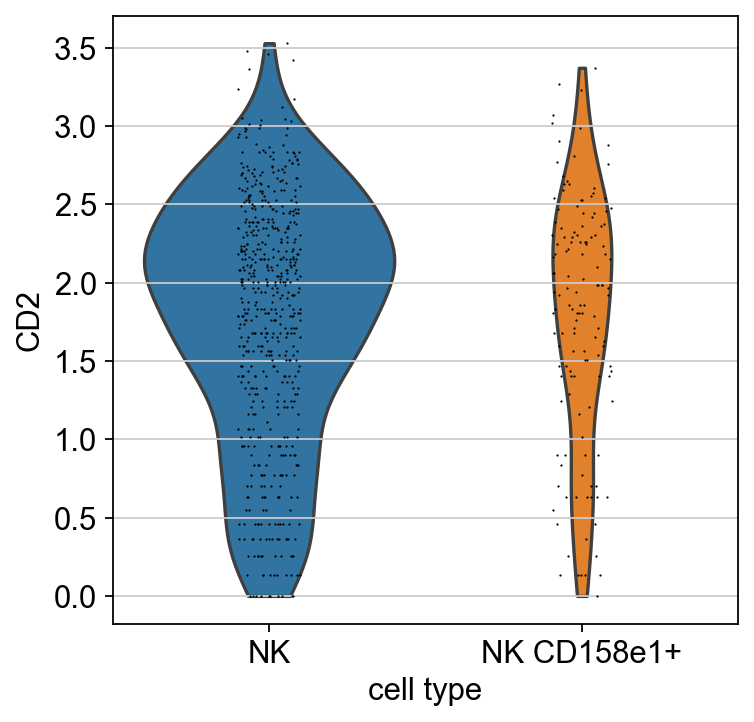

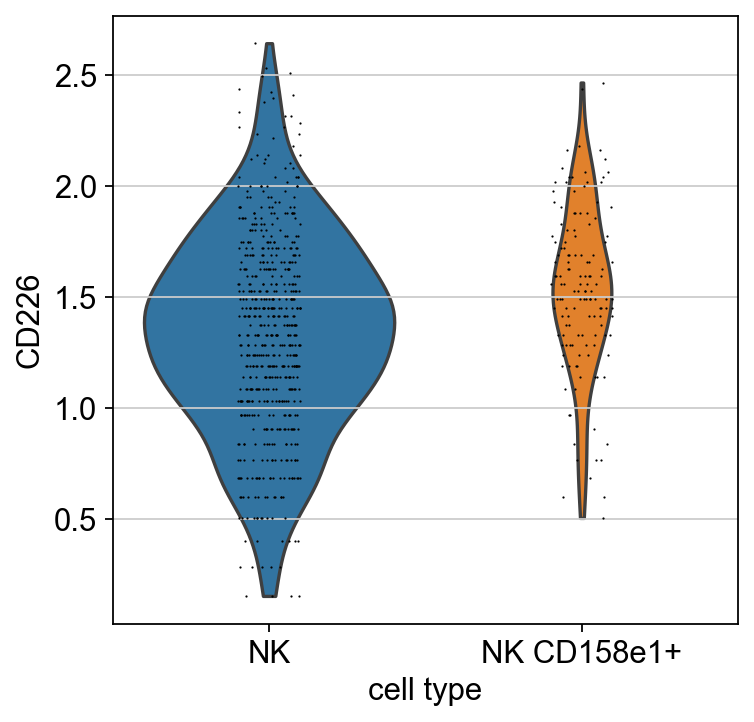

In [41]:
#Only NK, activating markers

for marker in nk_activating:
    sc.pl.violin(adata_nk, keys= marker, groupby= 'cell_type', scale = 'count')   
    

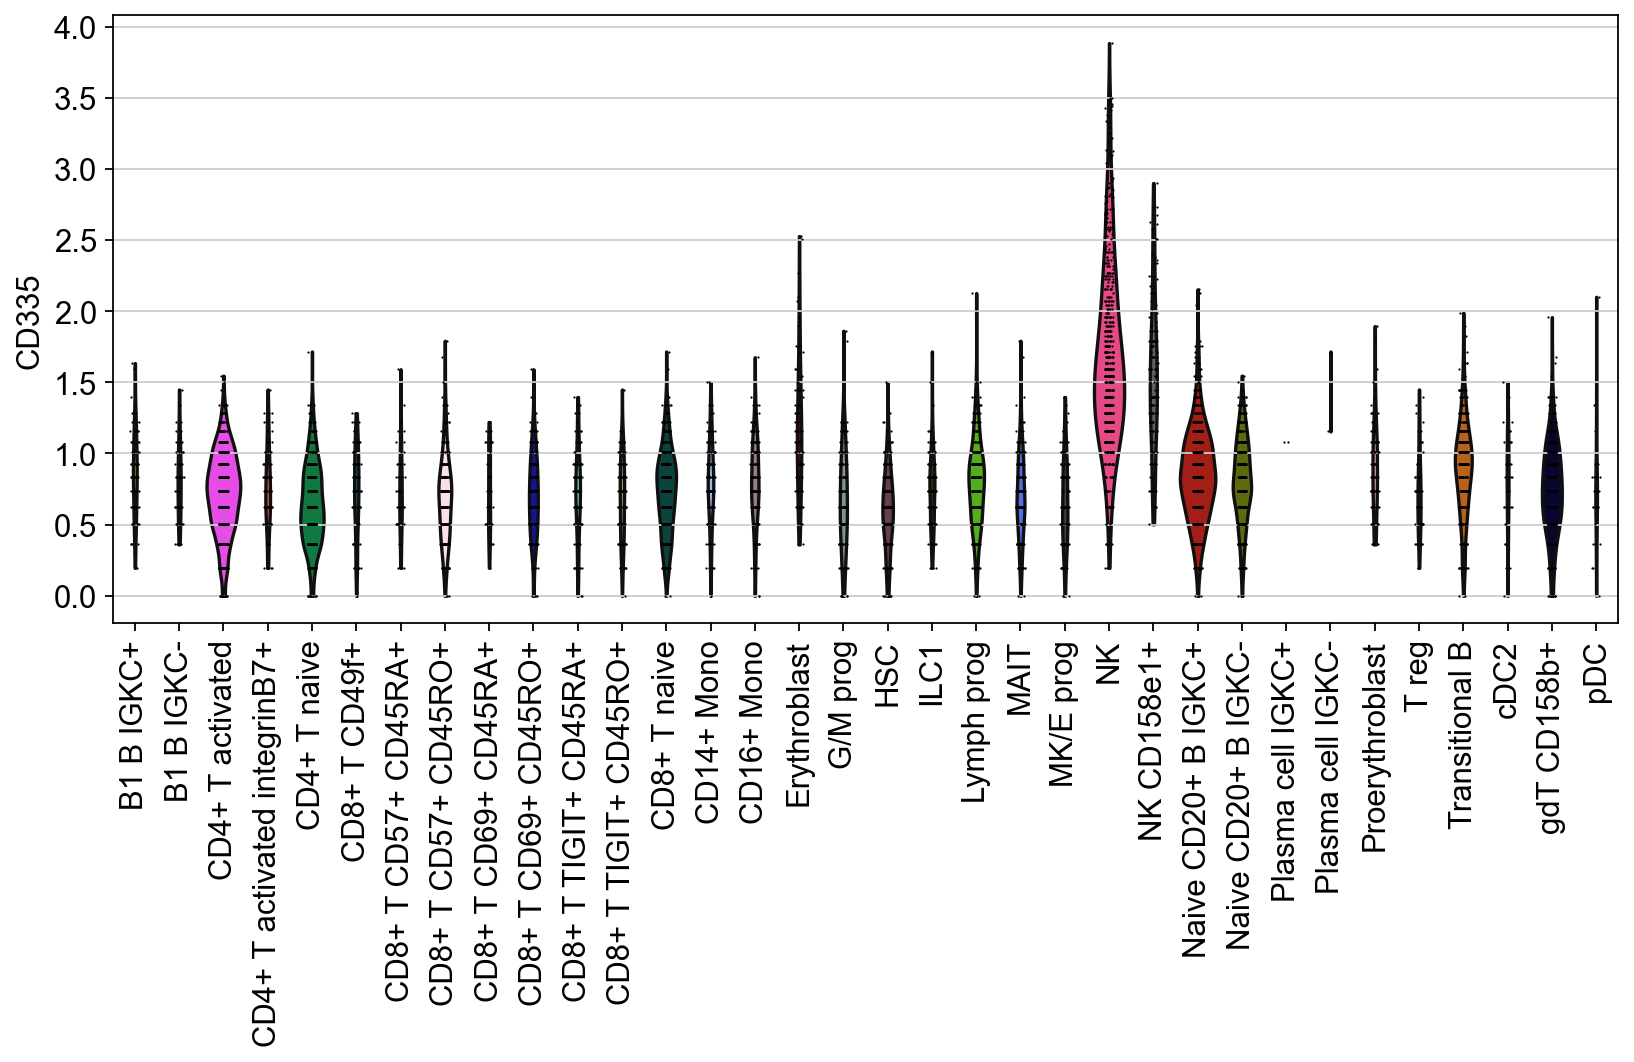

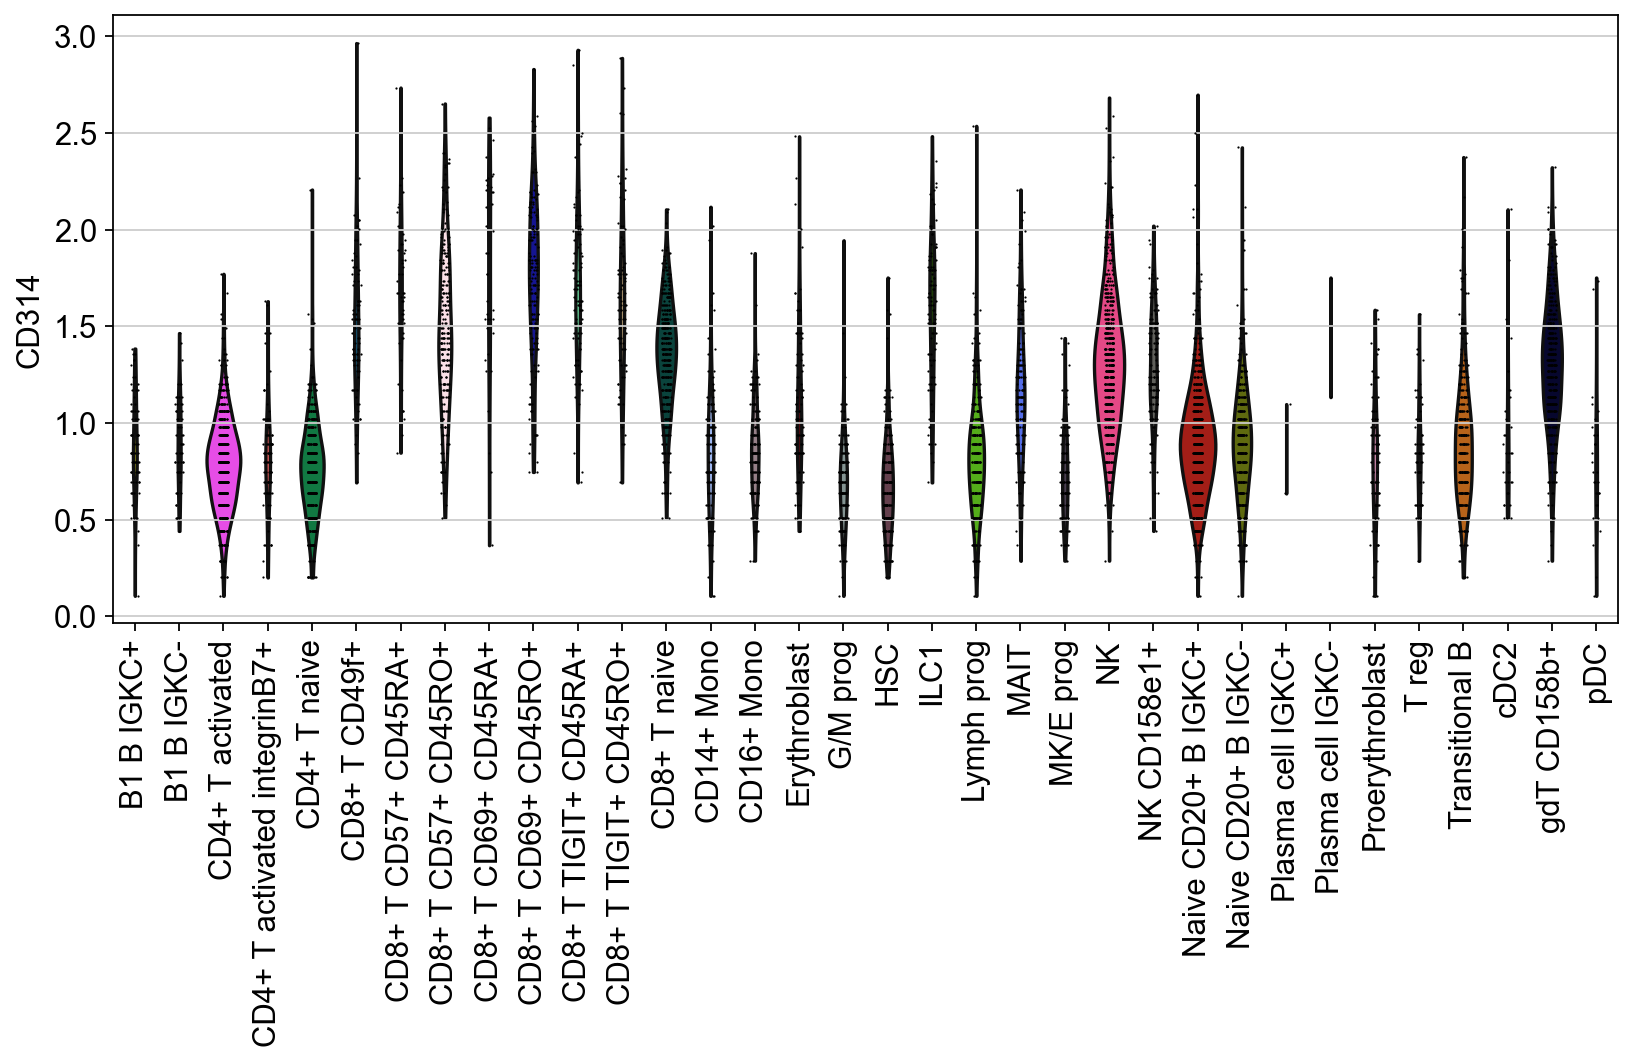

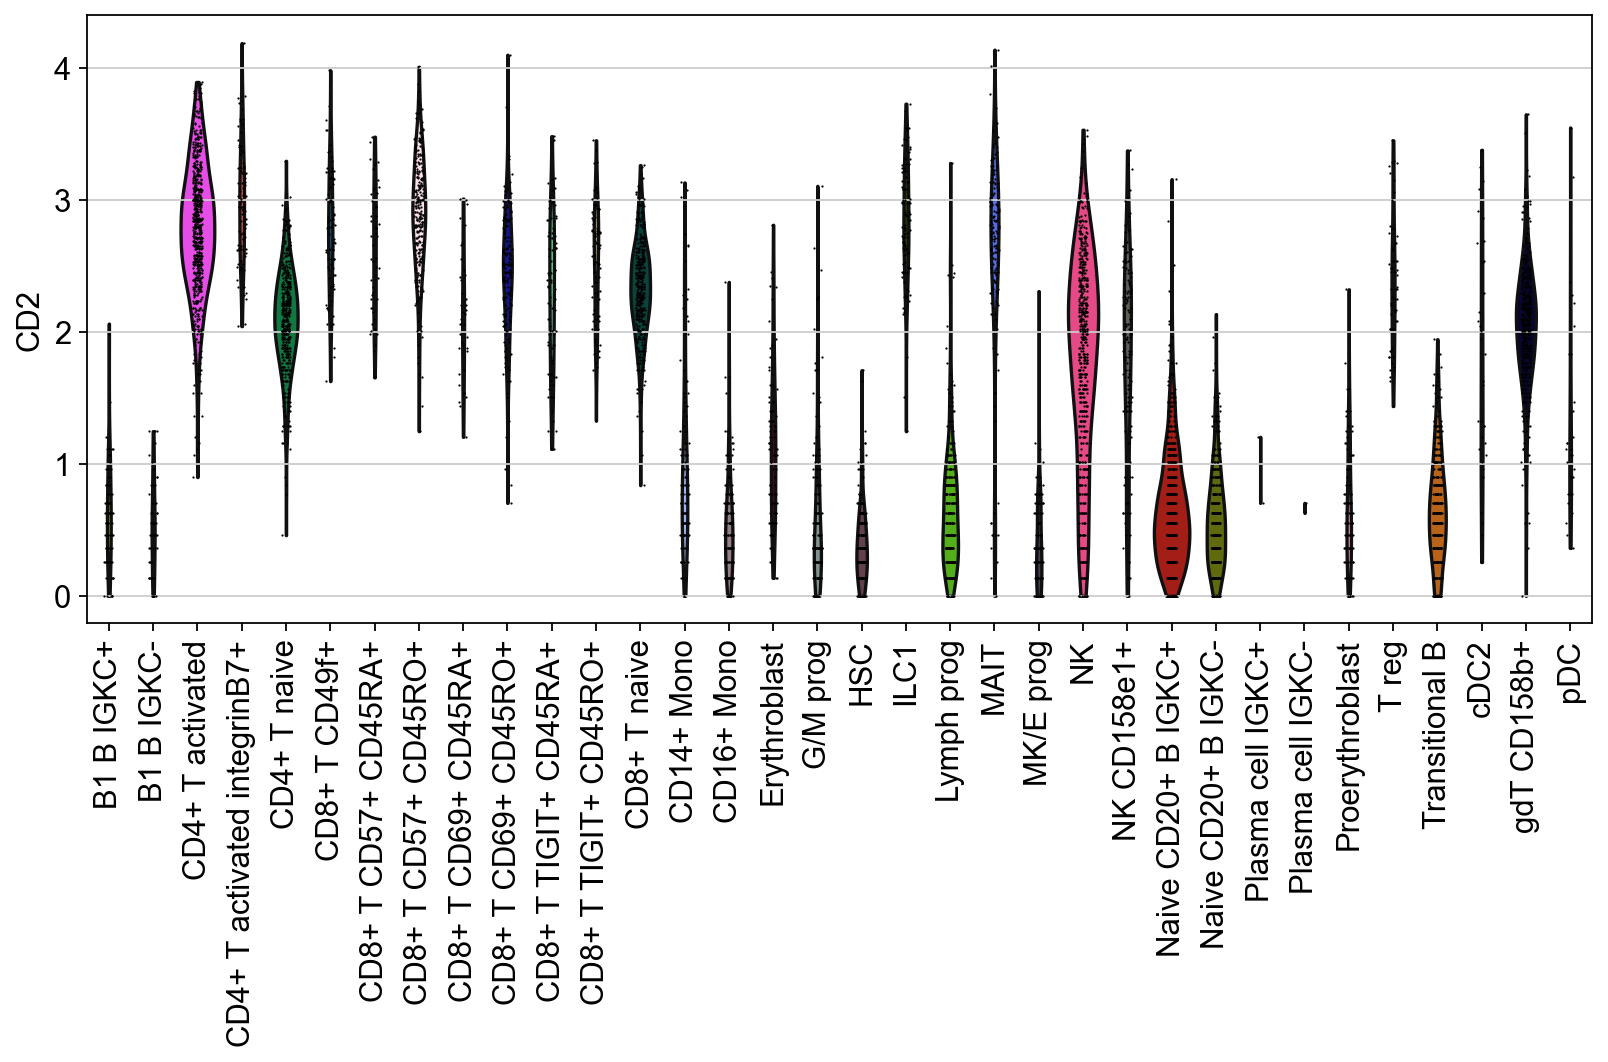

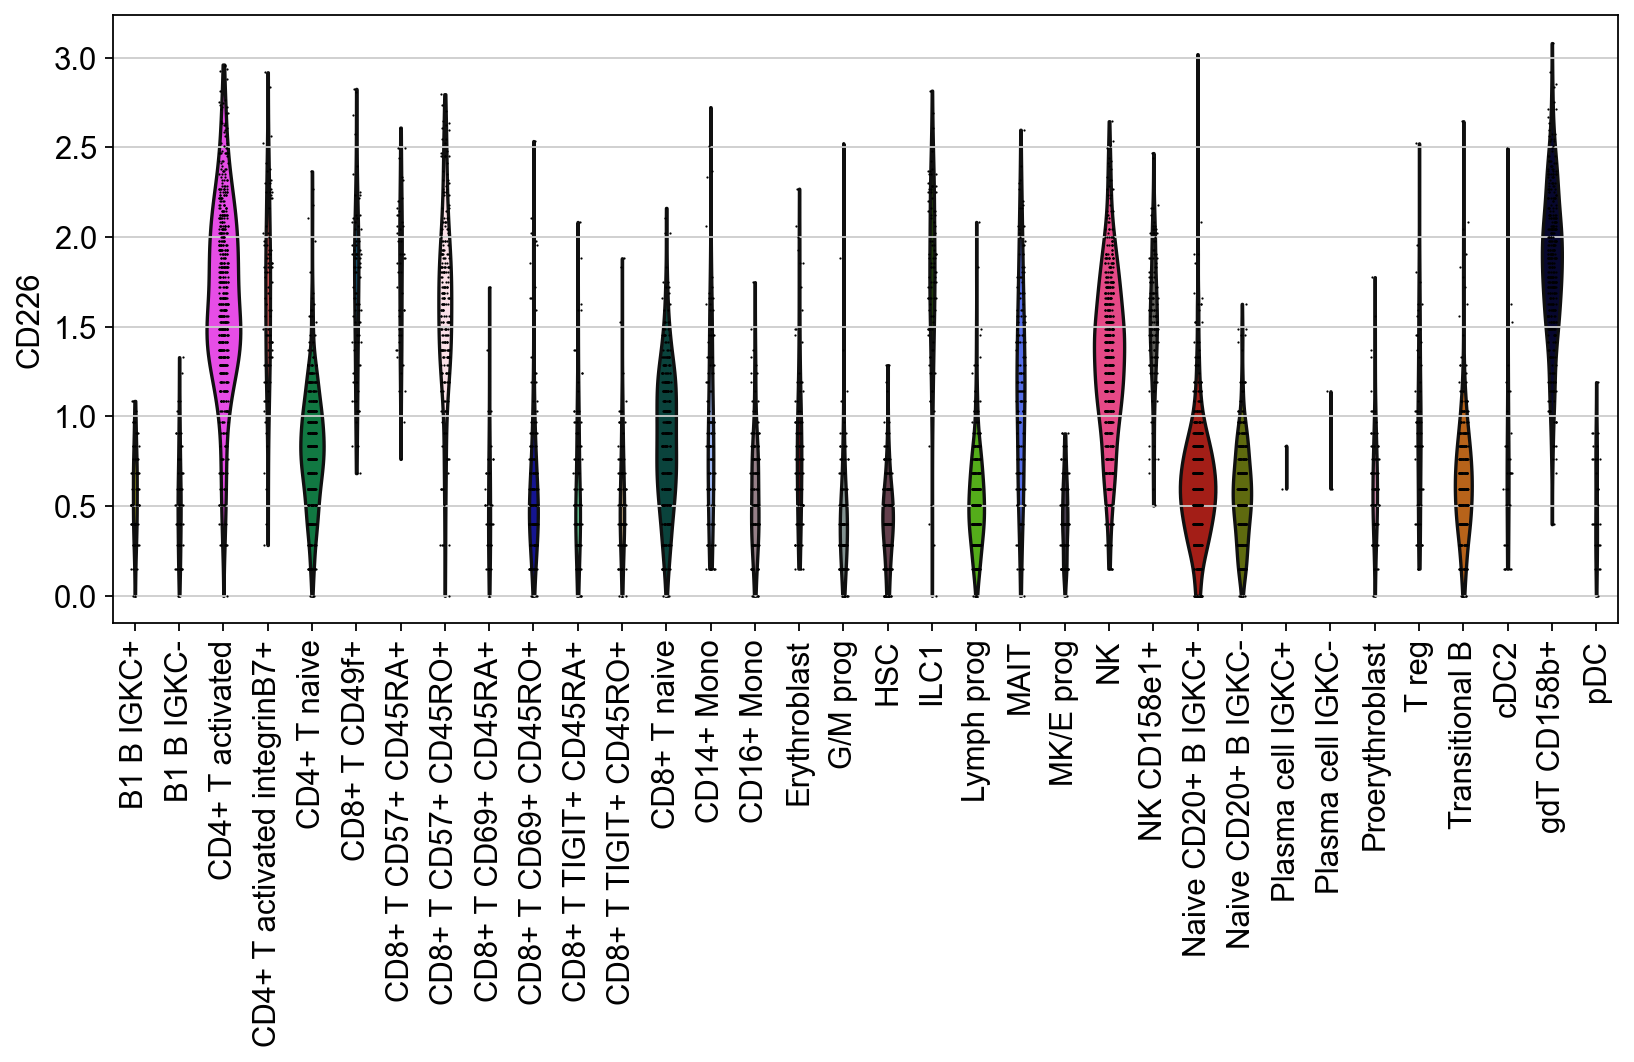

In [42]:
#All cell types, activating markers

for marker in nk_activating:
    with rc_context({'figure.figsize': (10, 5)}):
        sc.pl.violin(adata_sample, keys= marker, groupby= 'cell_type', scale = 'count', rotation=90)   
    

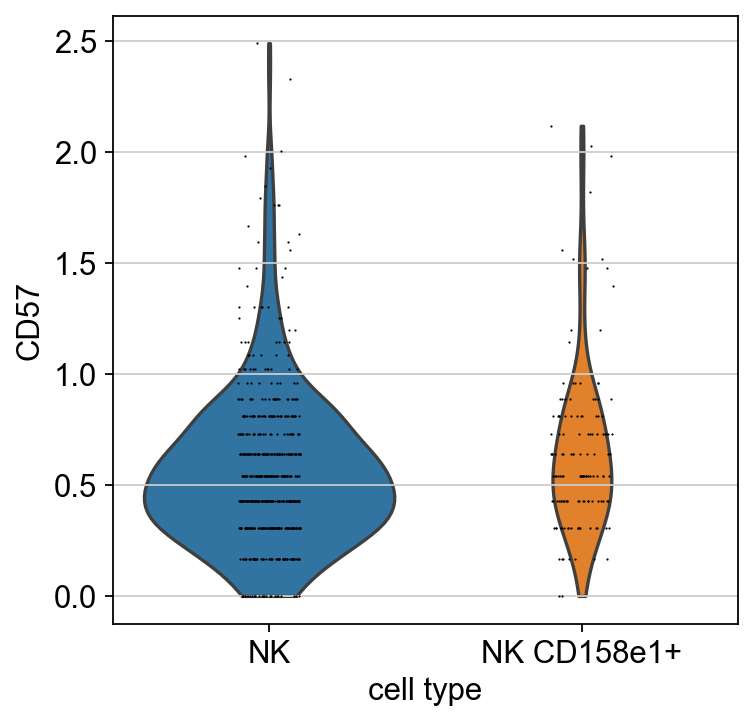

In [43]:
#NK cells, maturation markers

sc.set_figure_params(figsize=(5, 5))
sc.pl.violin(adata_nk, keys= nk_maturation, groupby= 'cell_type', scale = 'count')

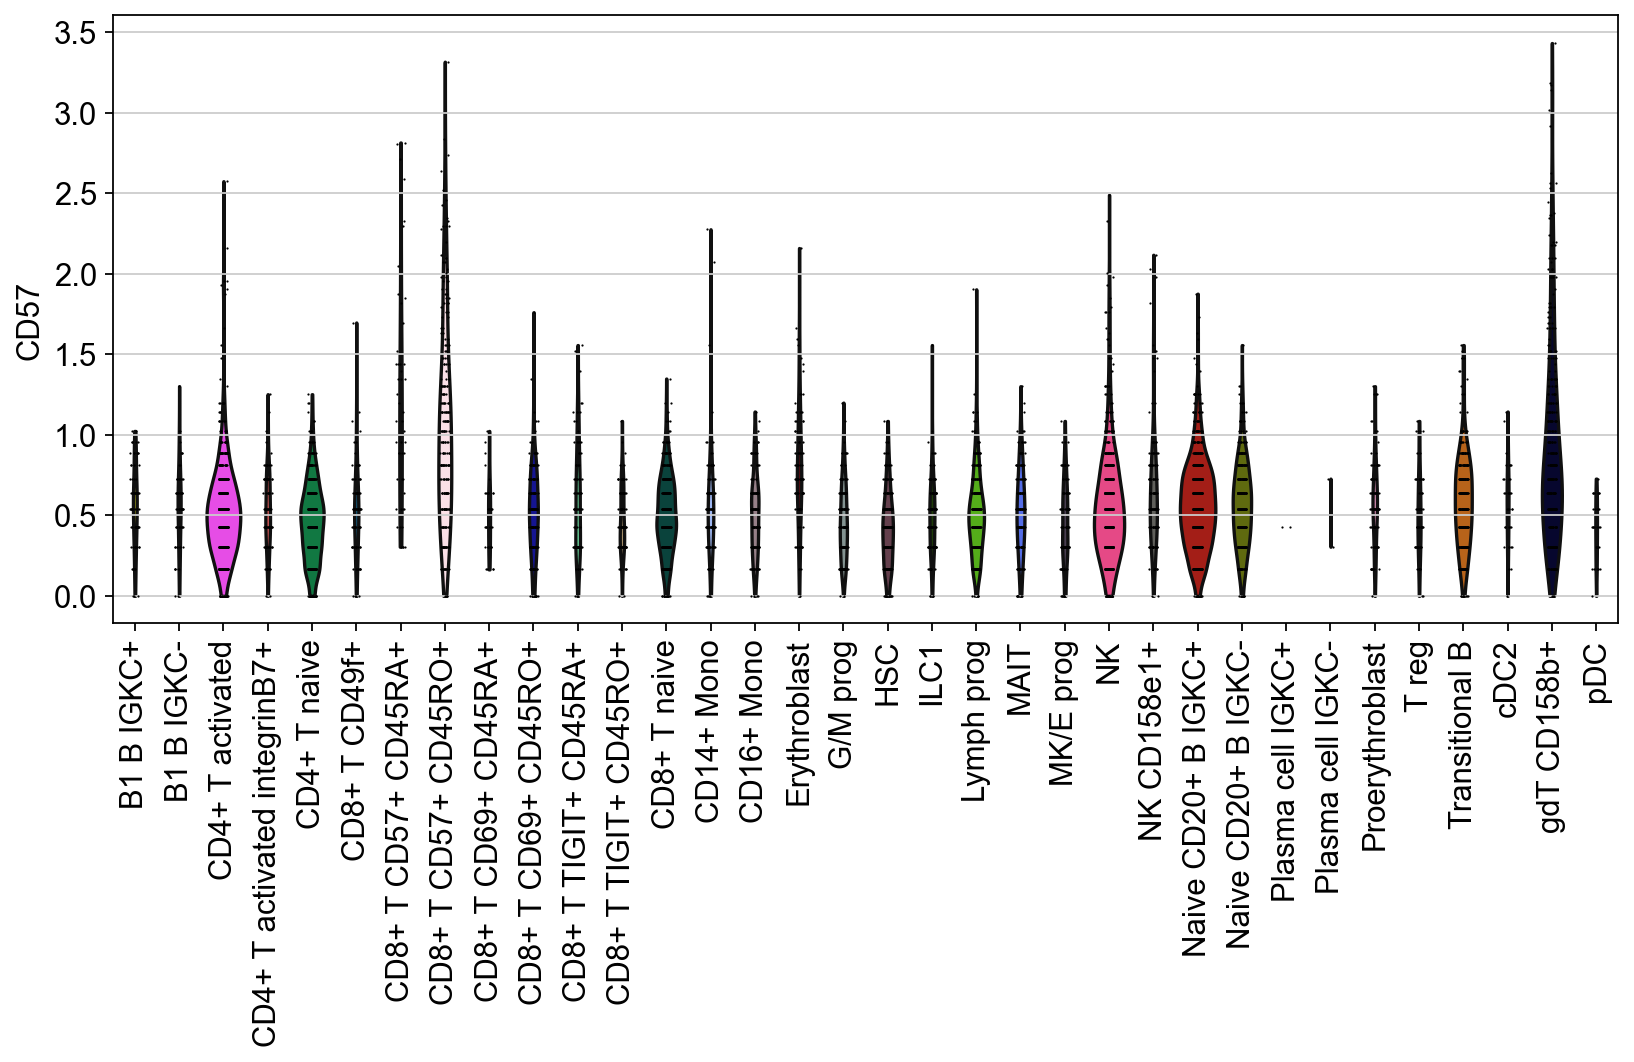

In [44]:
#all celltypes, maturation markers

with rc_context({'figure.figsize': (10, 5)}):
    sc.pl.violin(adata_sample, keys= nk_maturation, groupby= 'cell_type', scale = 'count', rotation=90)